# Build k-means classifier

## Train model (slower)

In [1]:
# %%time
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import pickle

# # Load the saved data
# data = np.load("../data/memory_maze_100k.npz")

# # Extract the 'image' key from the data
# # Assuming the shape of 'image' is (steps, height, width, channels)
# images = data["image"]

# # Reshape images for k-means clustering
# # Flatten the height, width, and channels for clustering
# flattened_images = images.reshape(images.shape[0], -1)

# # Number of clusters for k-means
# num_clusters = 128

# # Perform k-means clustering
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(flattened_images)


# # Save the model to a file
# with open('kmeans_model.pkl', 'wb') as file:
#     pickle.dump(kmeans, file)

# # Cluster labels for each observation
# labels = kmeans.labels_

# # Reshape each cluster center back into the original image shape
# cluster_centers = kmeans.cluster_centers_
# cluster_center_images = cluster_centers.reshape((num_clusters, *images.shape[1:]))

# # Cast cluster centers to integers in range [0, 255]
# cluster_center_images = np.clip(cluster_center_images, 0, 255).astype(np.uint8)

# # Display cluster centers
# rows = 16
# cols = 8
# fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
# axes = axes.ravel()

# for i in range(num_clusters):
#     axes[i].imshow(cluster_center_images[i])  # Cluster center image
#     axes[i].set_title(f"Cluster {i}")
#     axes[i].axis("off")

# plt.tight_layout()
# plt.show()

# # Display examples for each cluster
# for cluster_id in range(num_clusters):
#     # Create a new figure for each cluster
#     fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    
#     # Find up to 6 examples from this cluster
#     cluster_examples = np.where(labels == cluster_id)[0][:6]  # Indices of images in this cluster
    
#     for i, example_idx in enumerate(cluster_examples):
#         example_image = images[example_idx].astype(np.uint8)  # Cast example image to uint8
#         axes[i].imshow(example_image)  # Example image
#         axes[i].set_title(f"Example {i + 1}")
#         axes[i].axis("off")
    
#     # Hide unused axes if fewer than 6 examples are found
#     for i in range(len(cluster_examples), 6):
#         axes[i].axis("off")
    
#     fig.suptitle(f"Cluster {cluster_id} Examples", fontsize=16)
#     plt.tight_layout()
#     plt.show()


## Load kmeans model (faster)

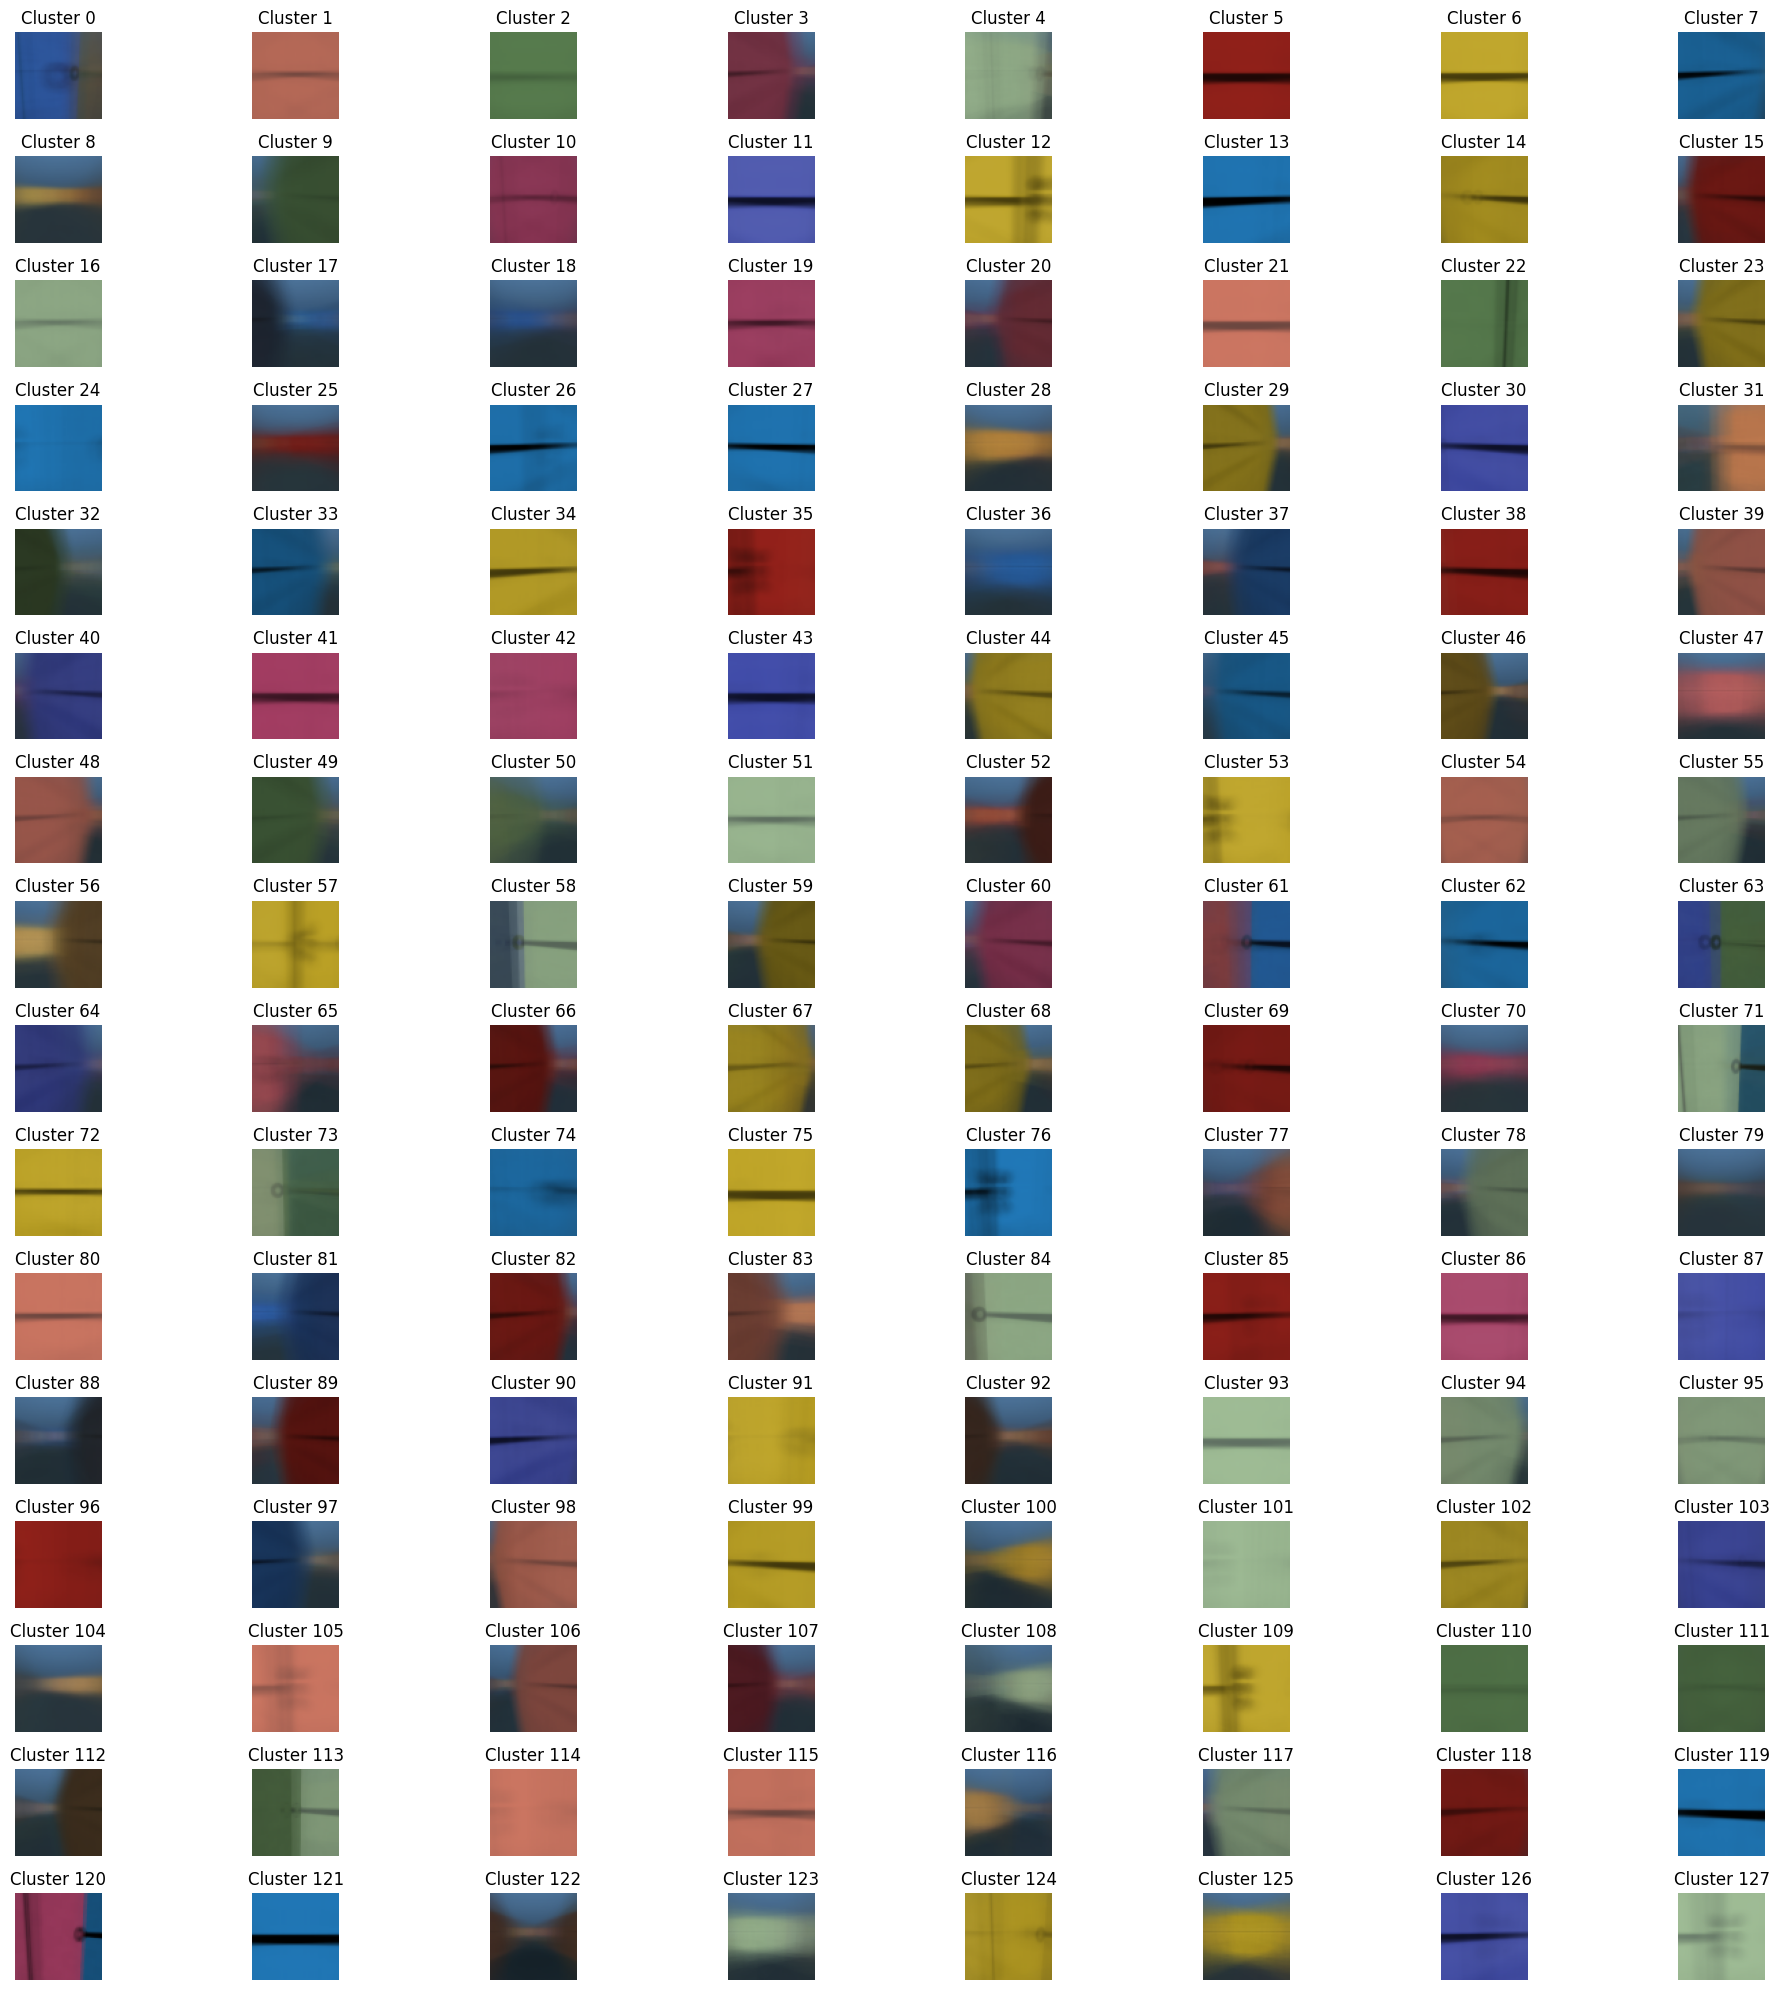

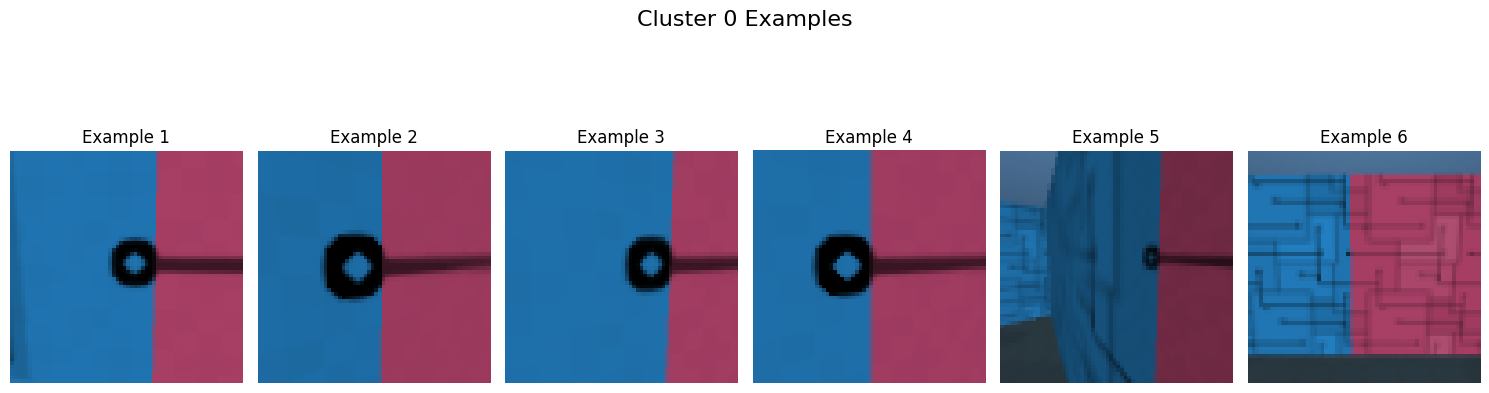

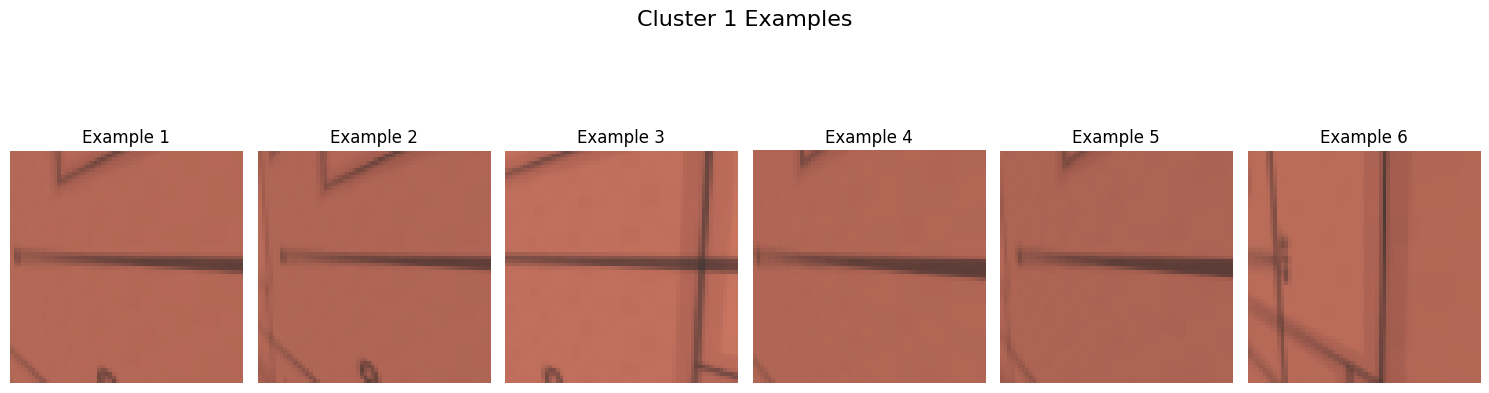

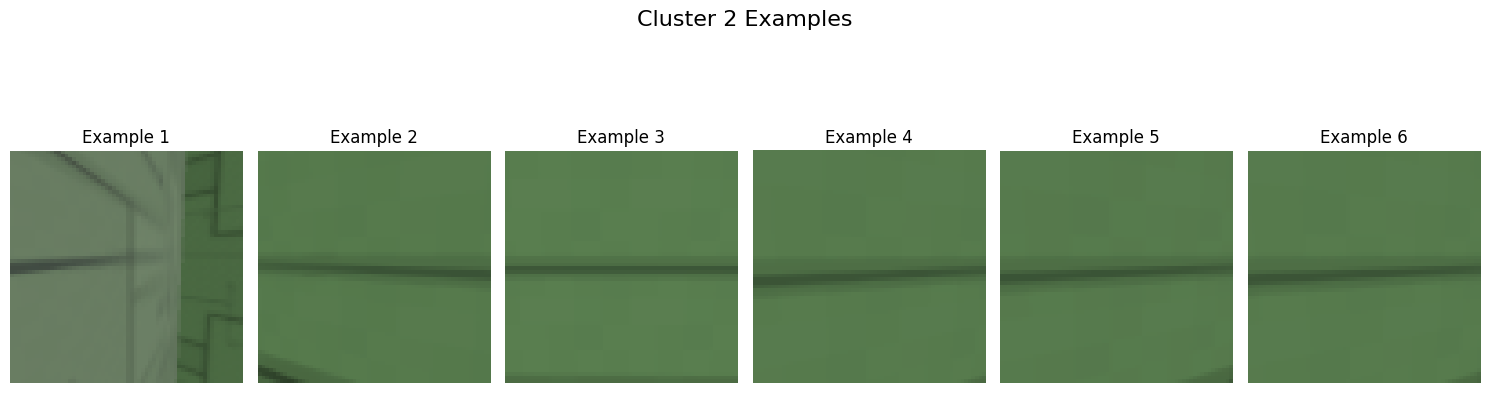

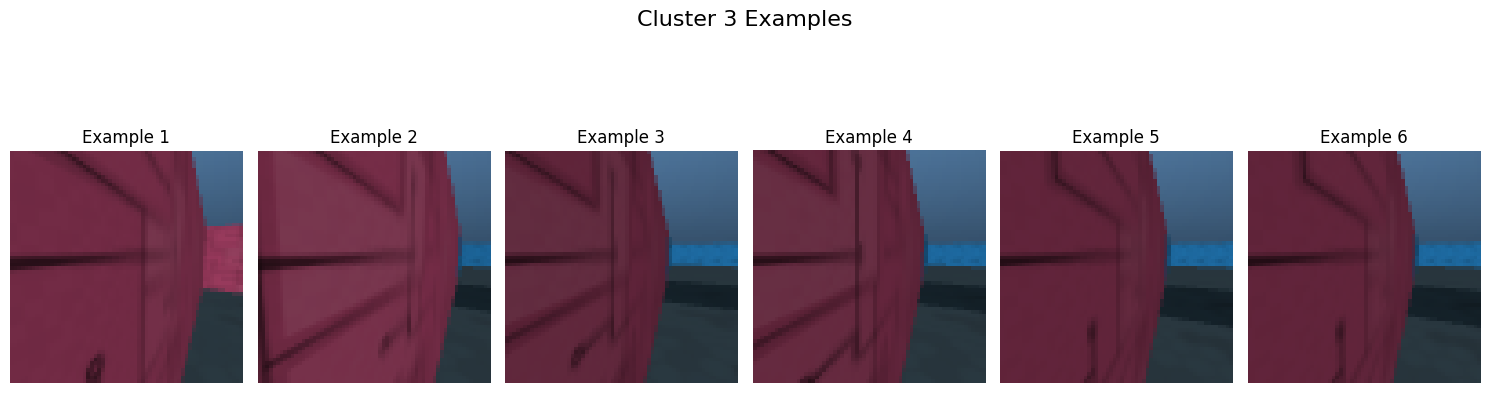

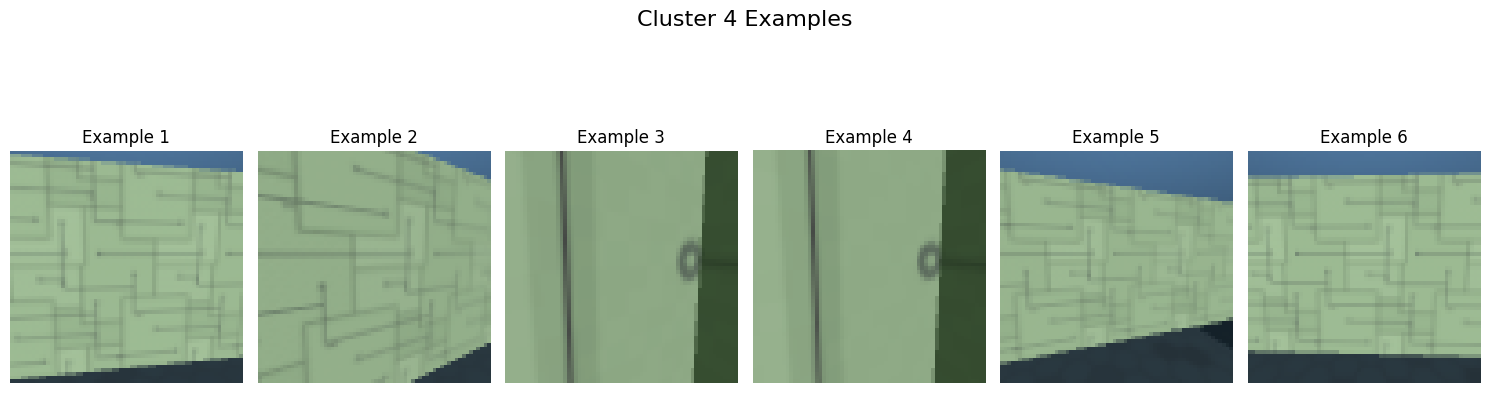

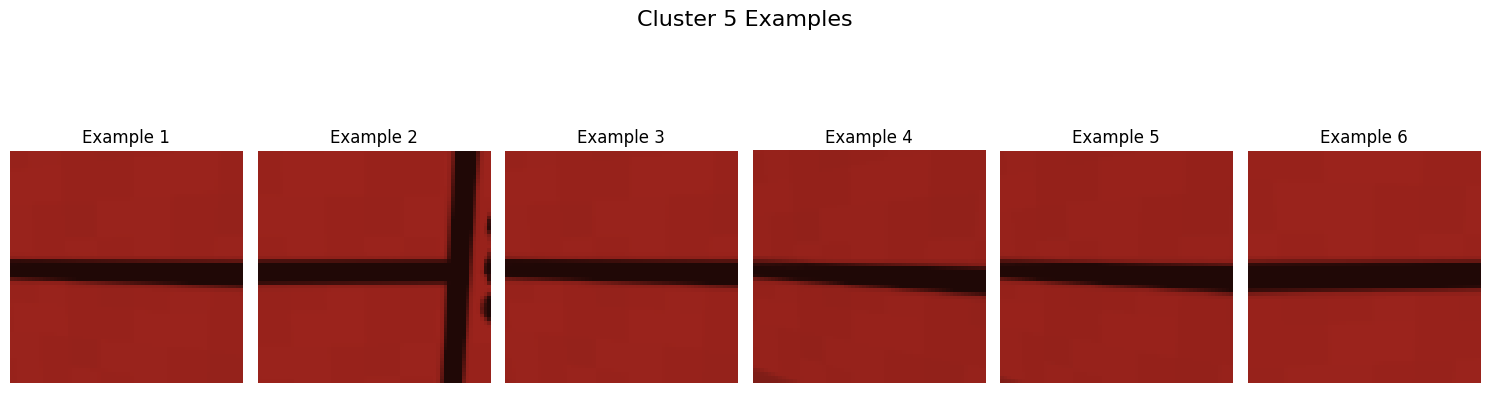

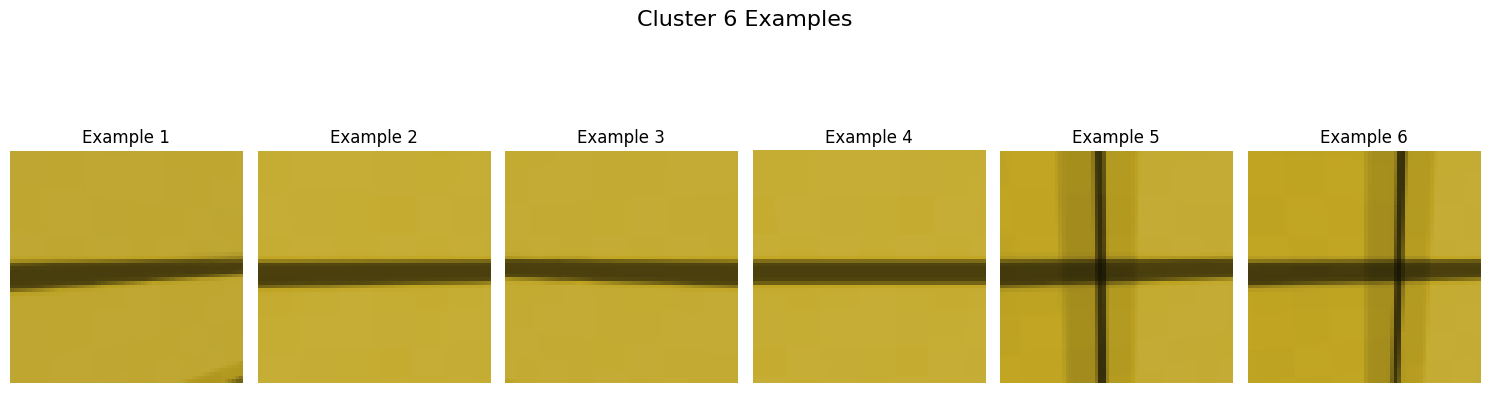

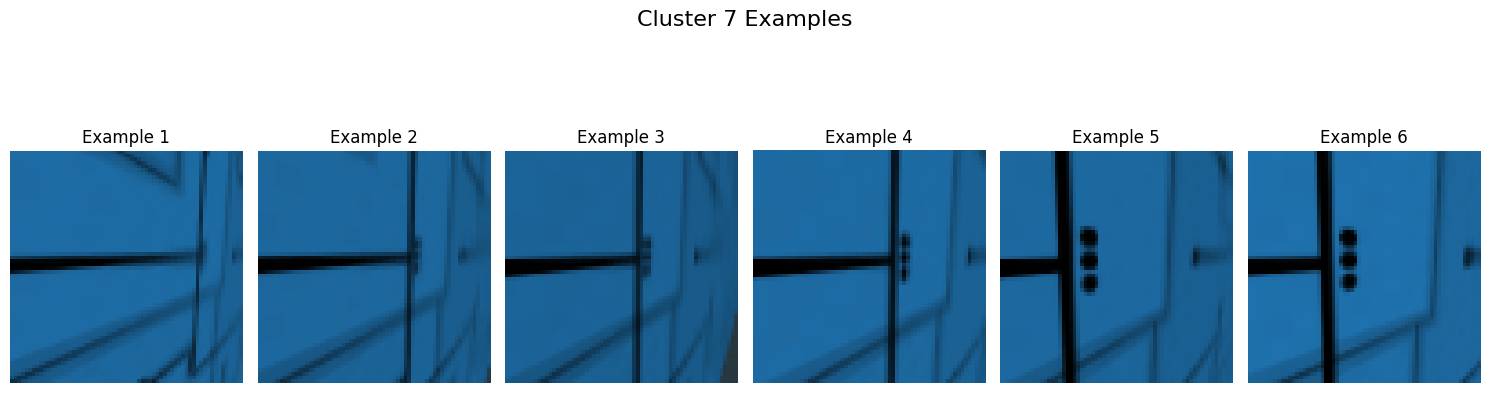

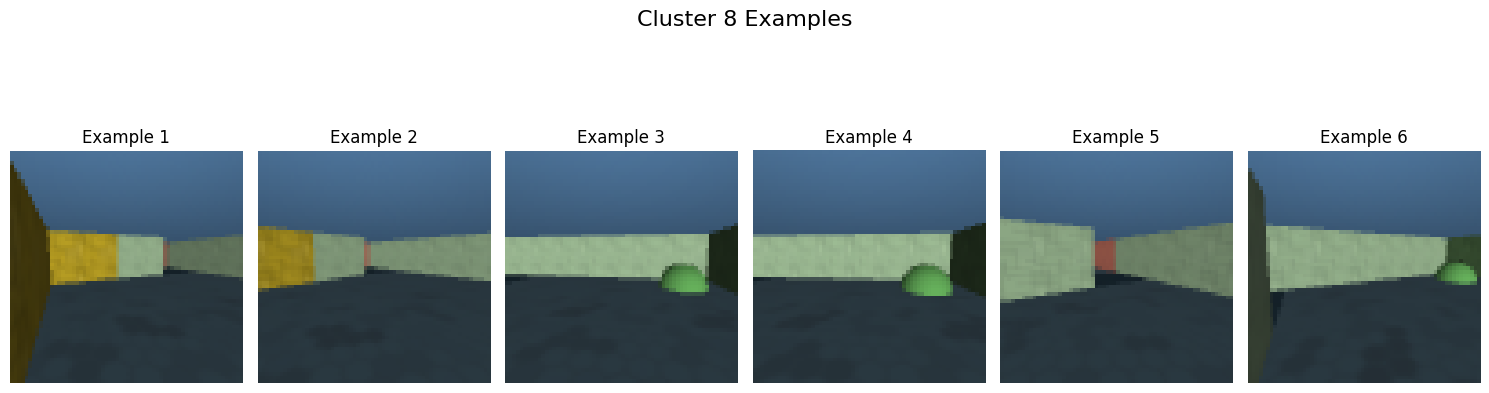

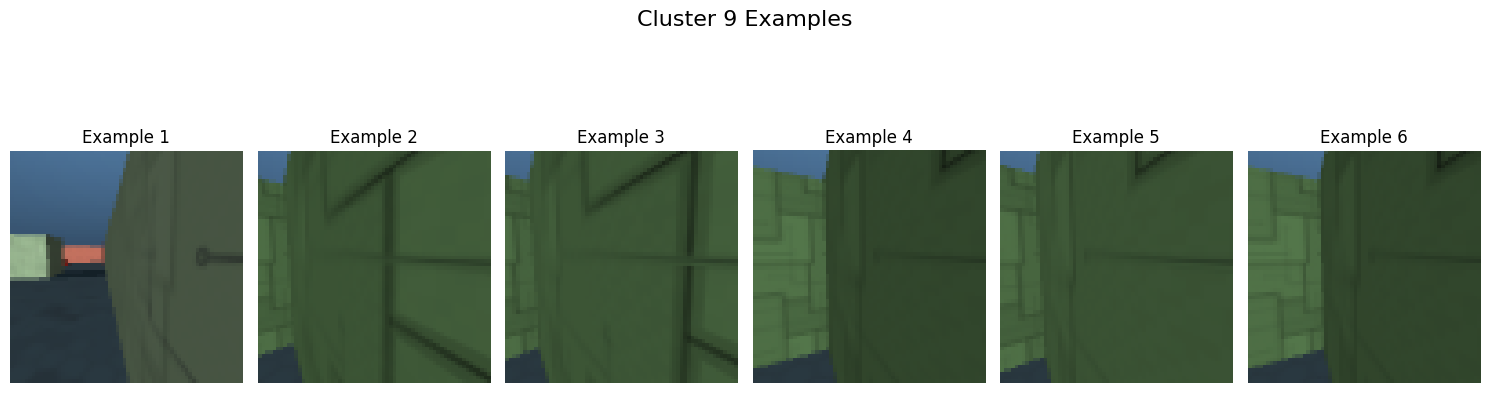

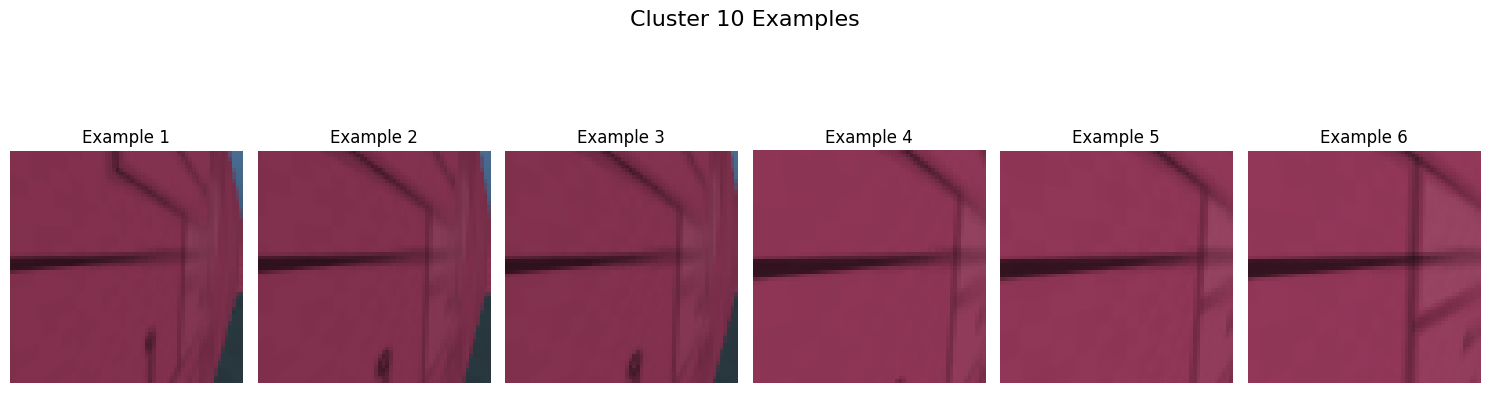

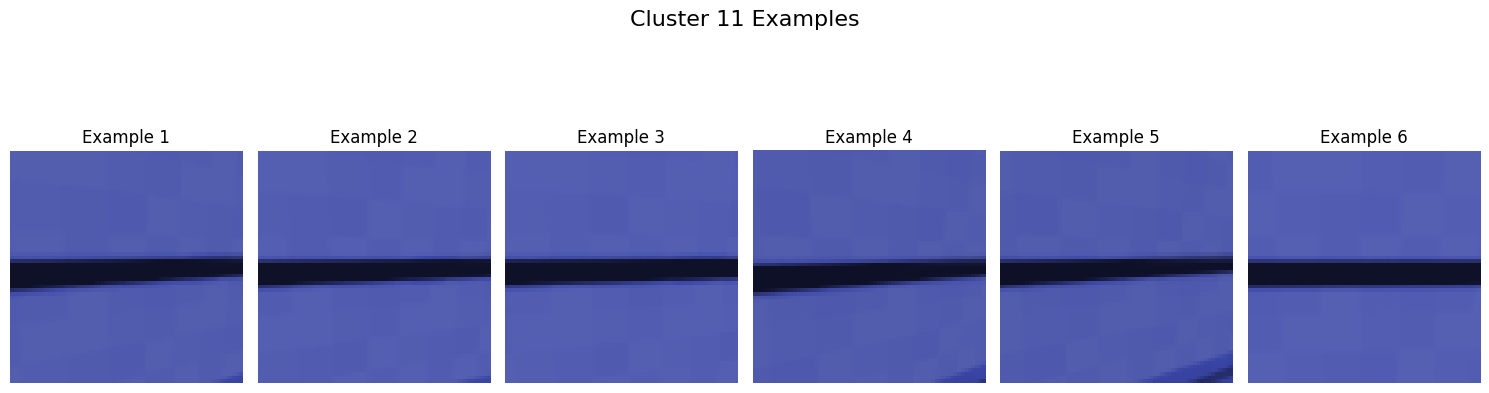

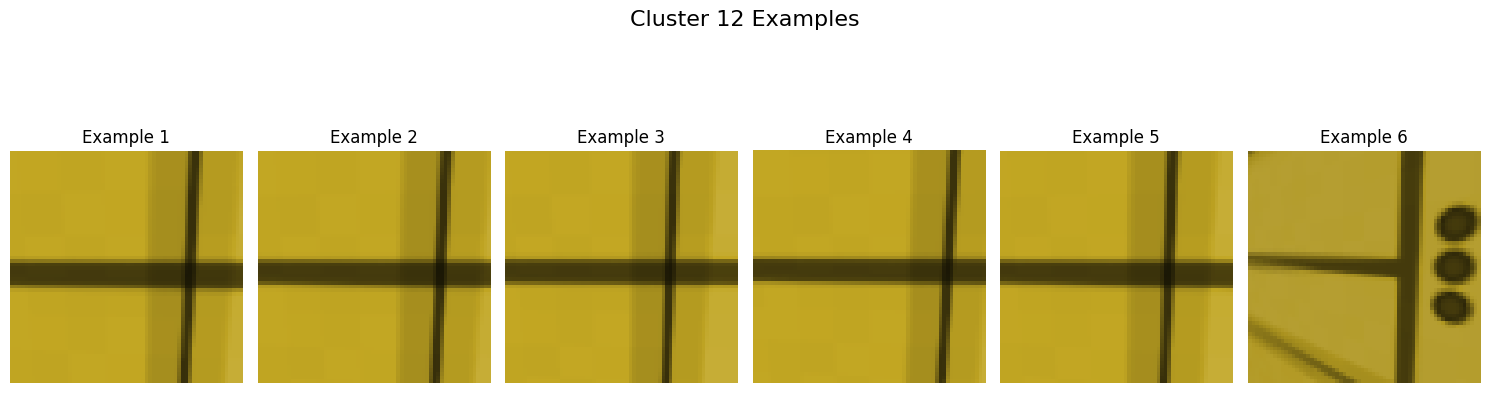

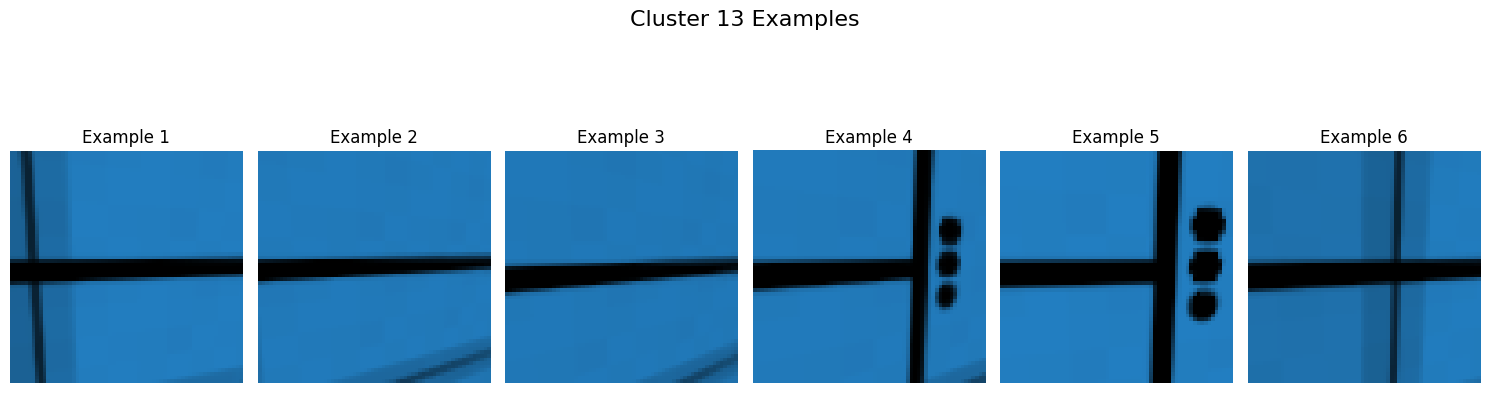

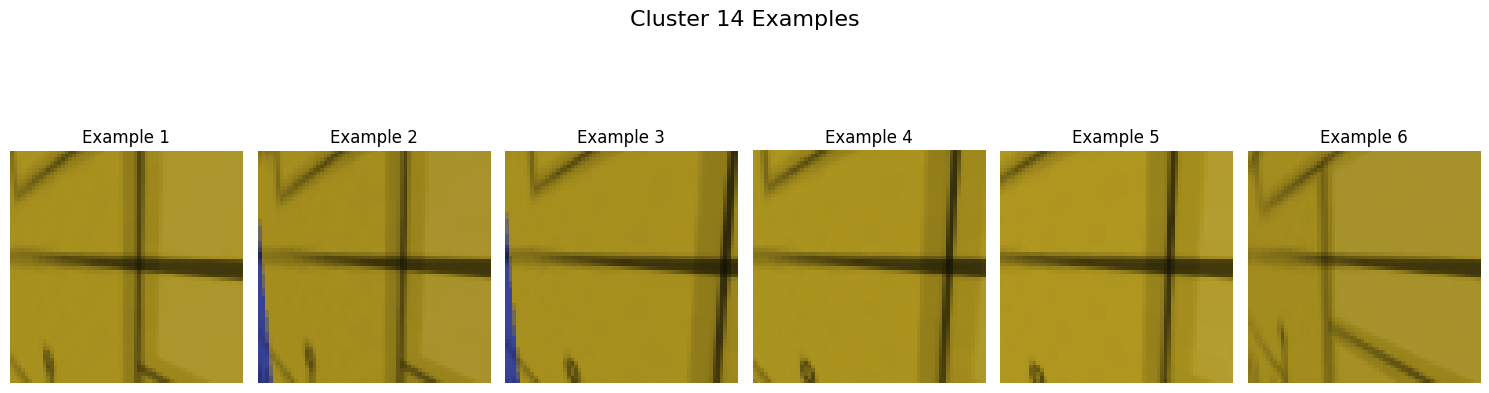

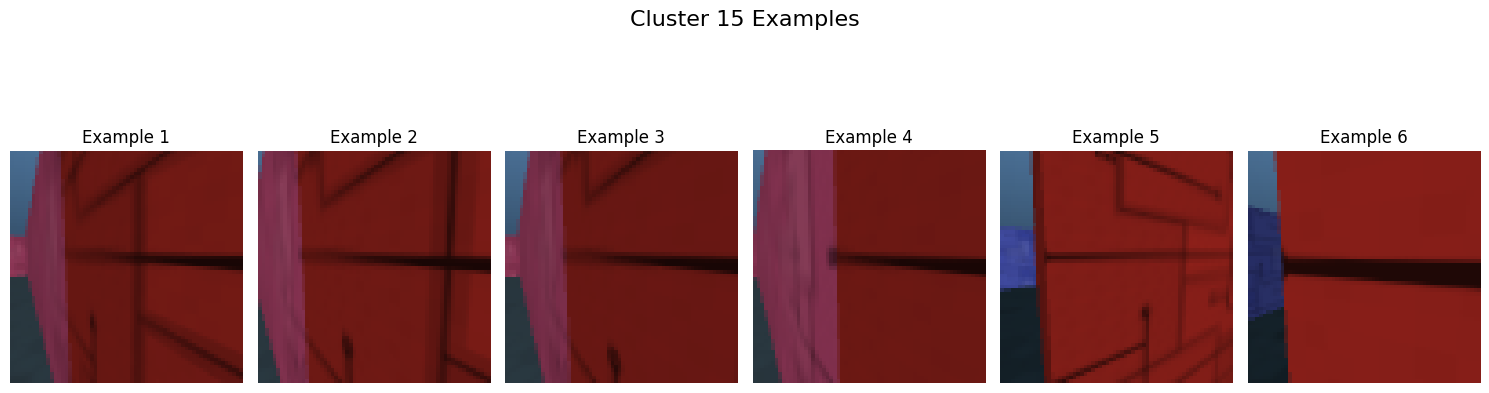

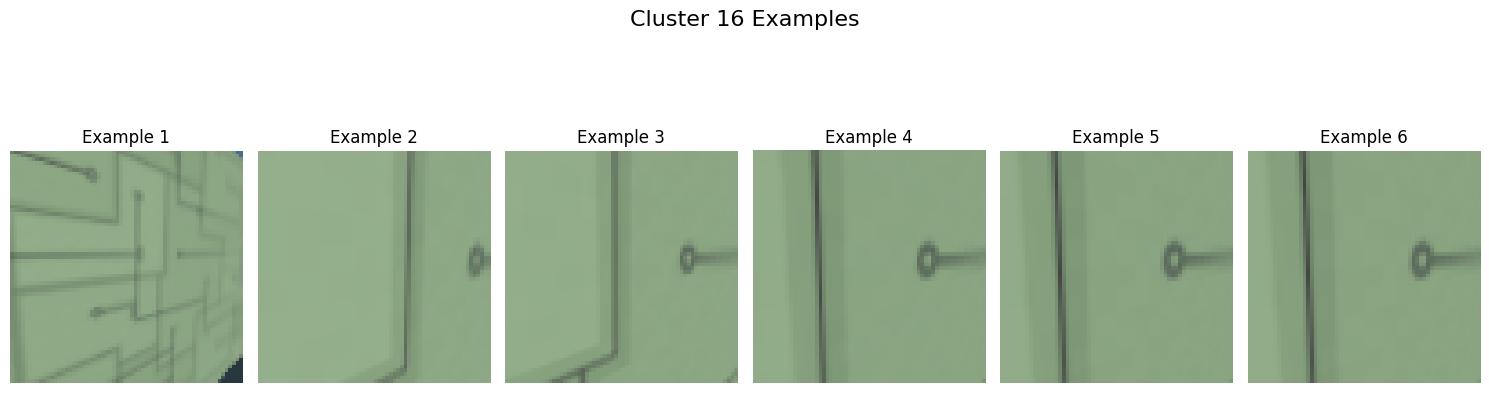

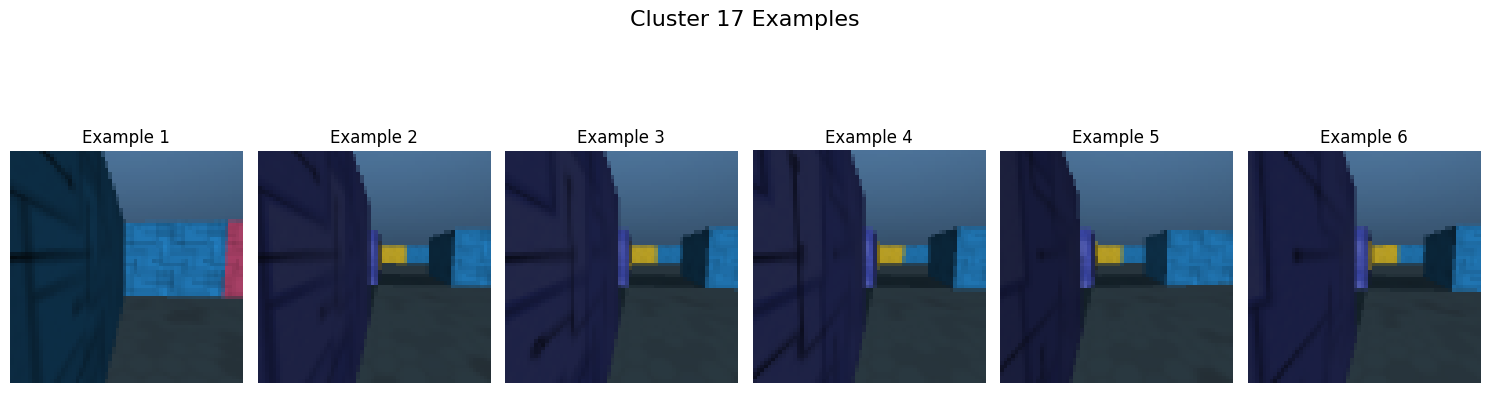

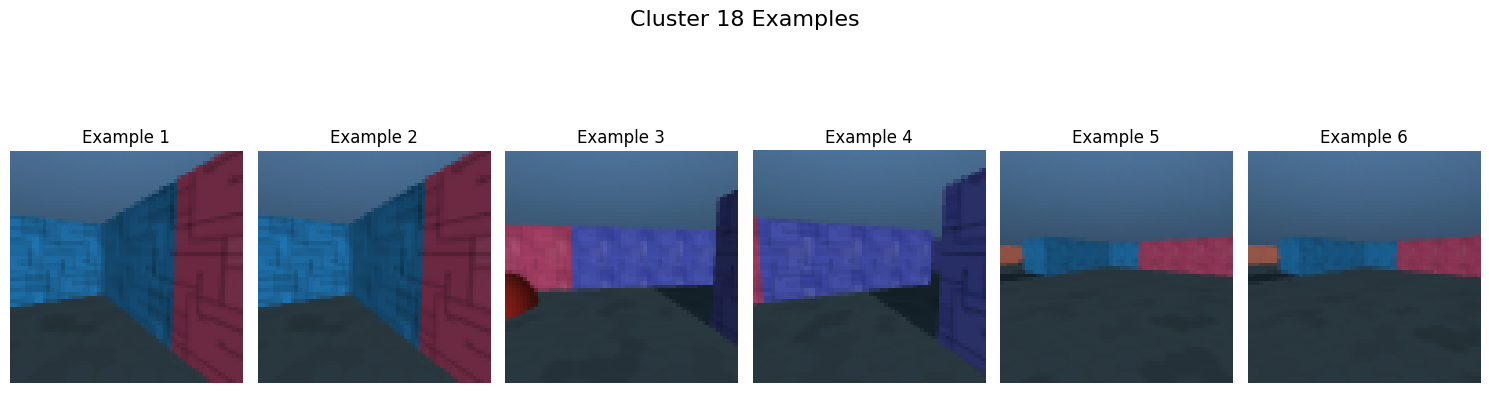

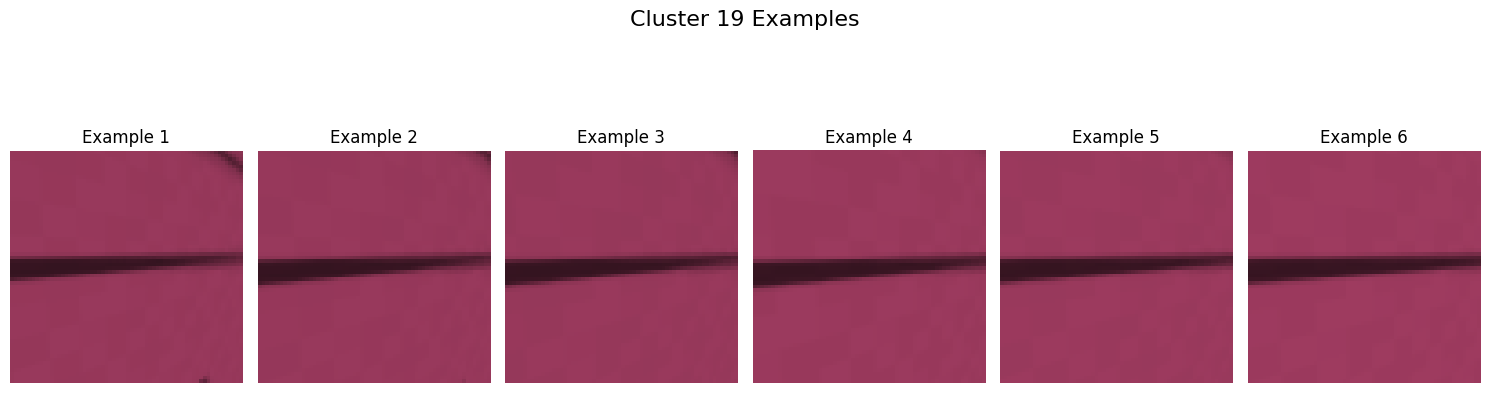

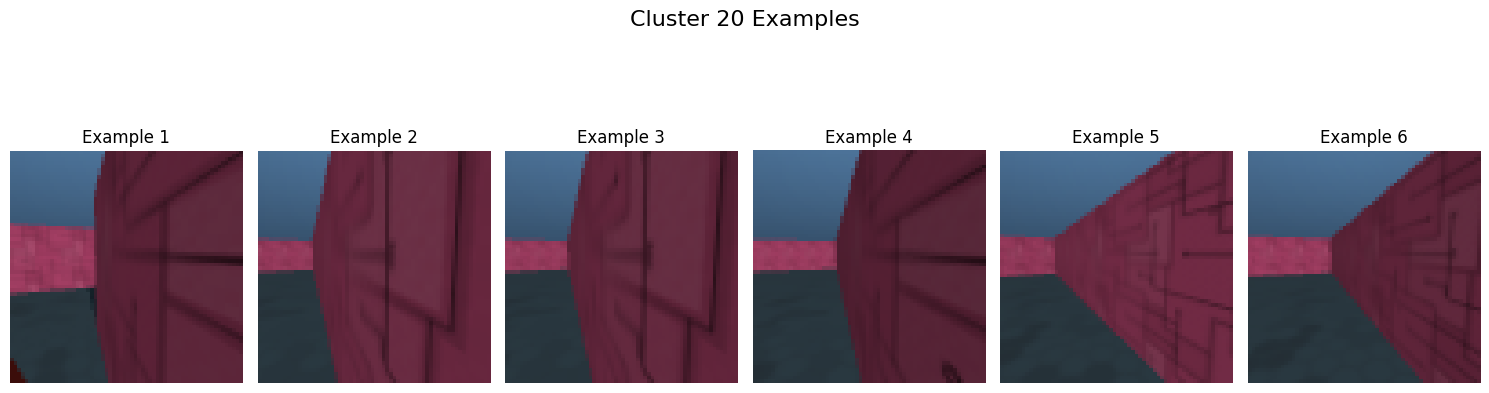

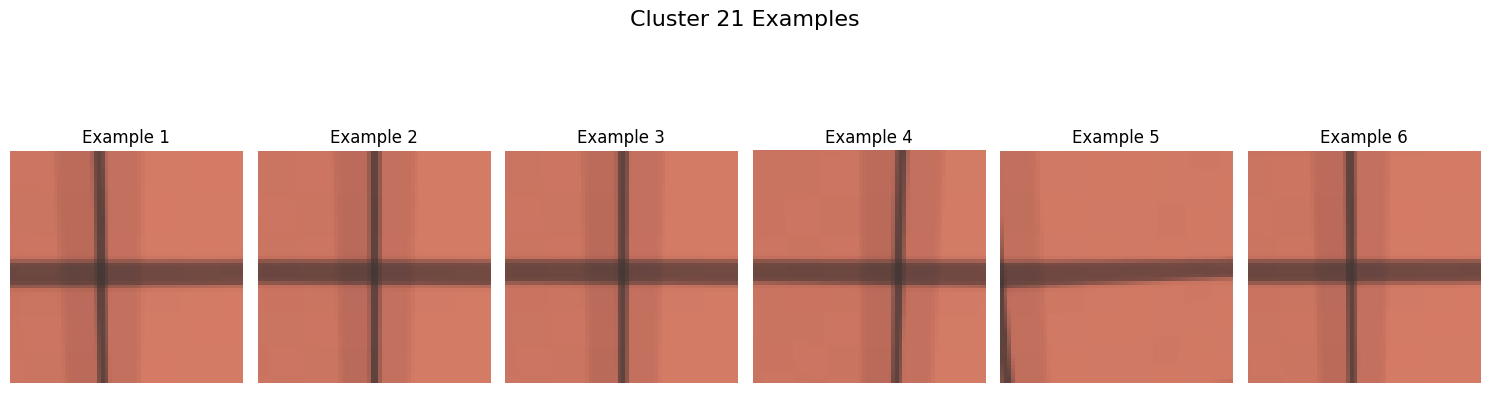

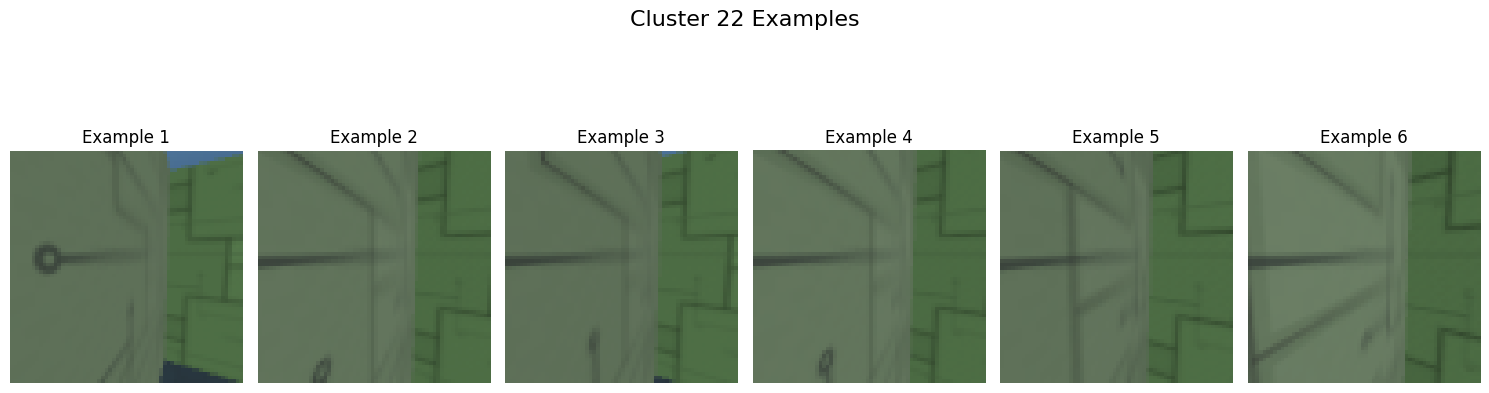

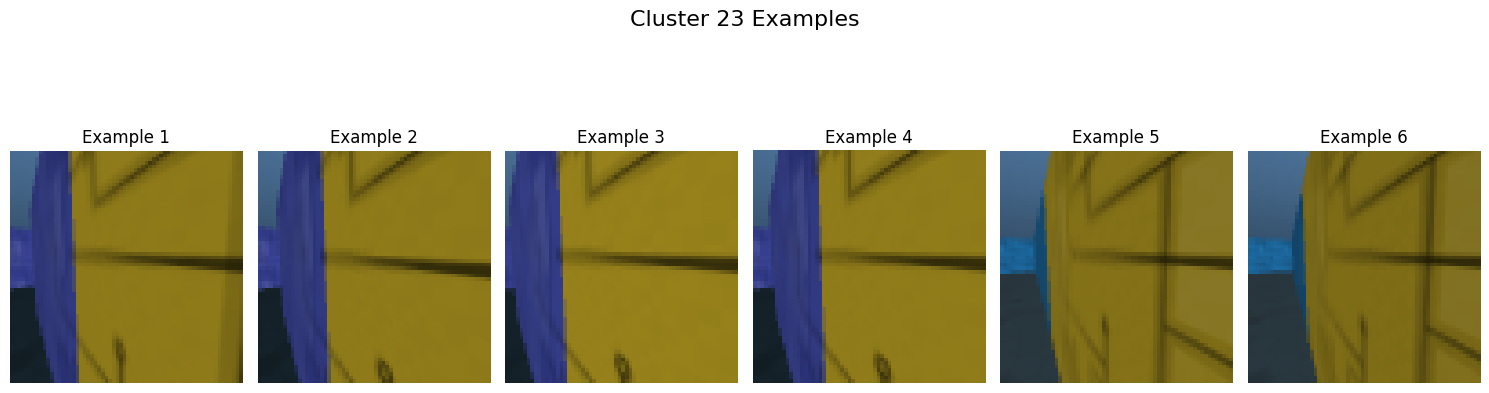

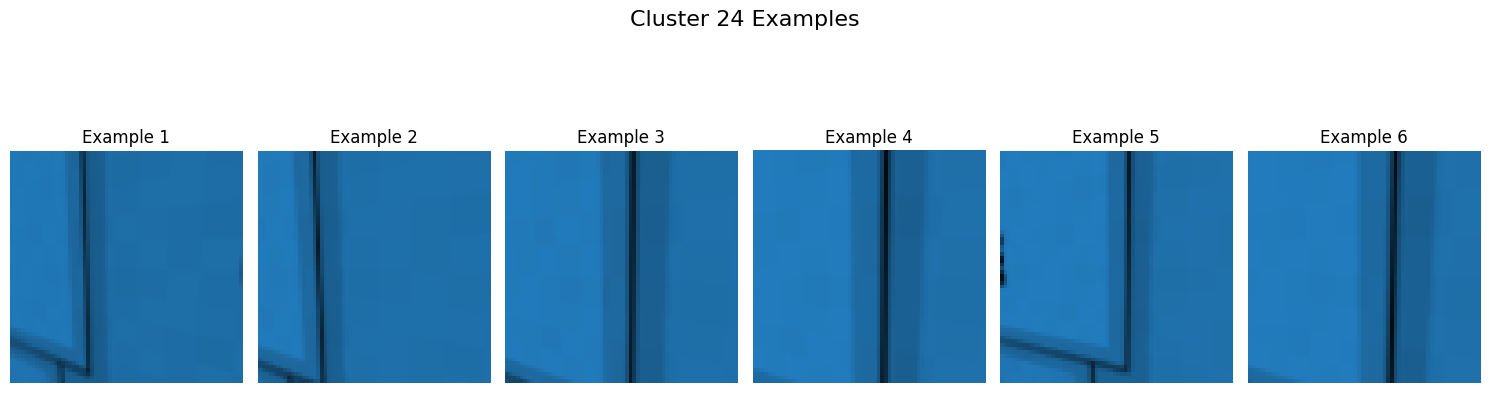

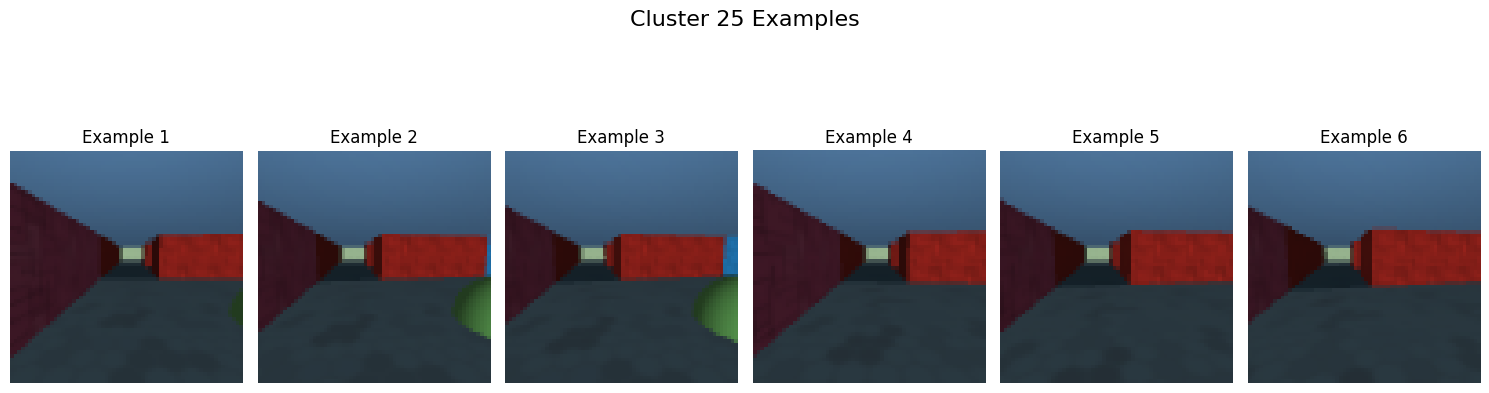

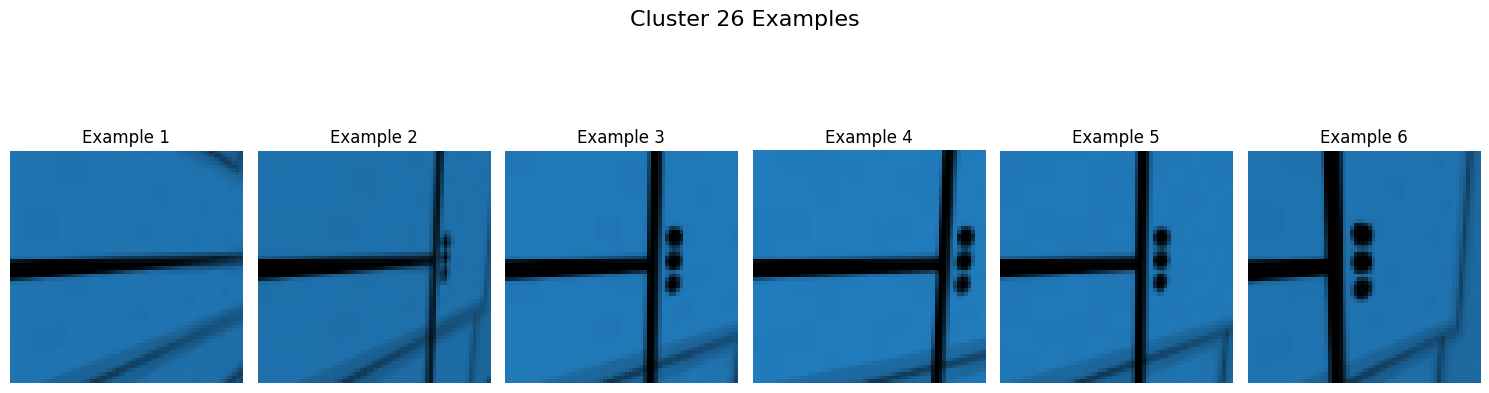

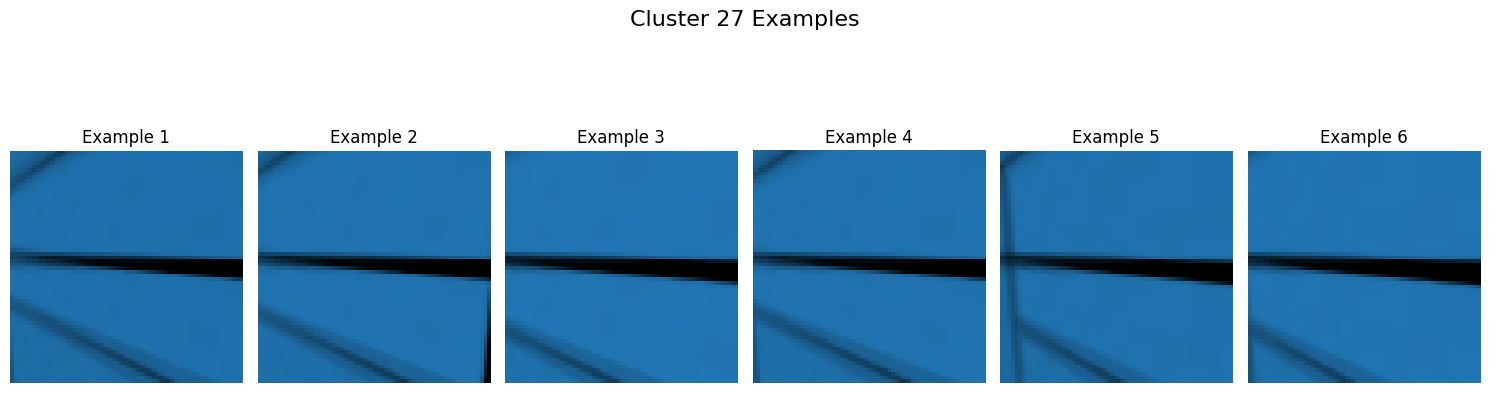

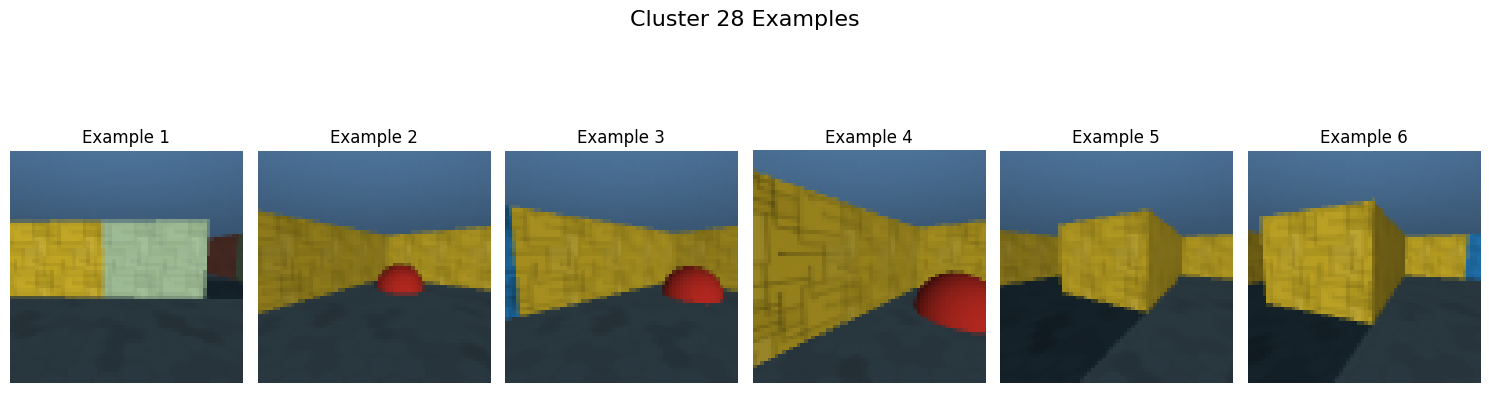

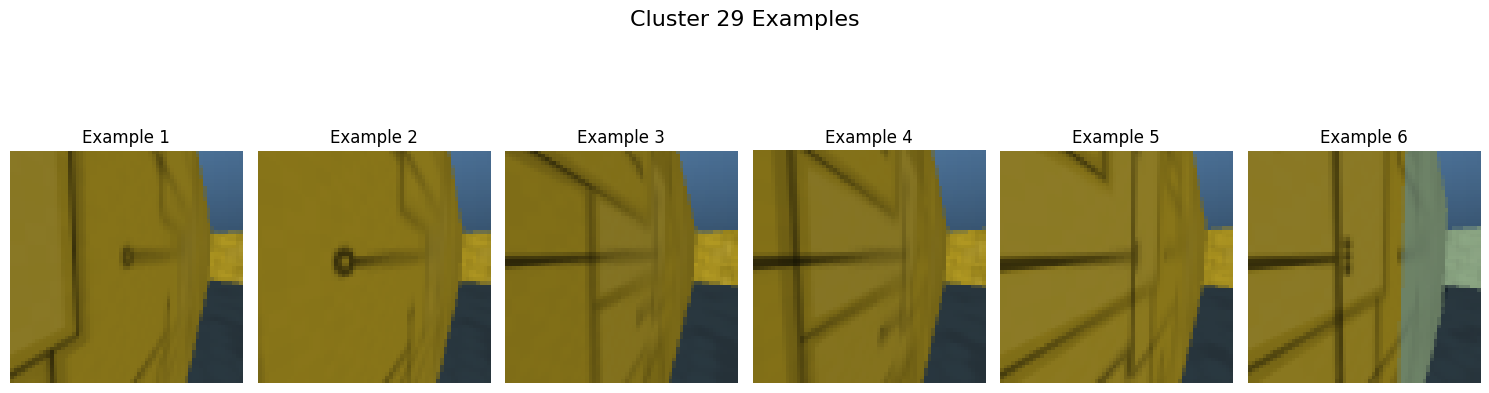

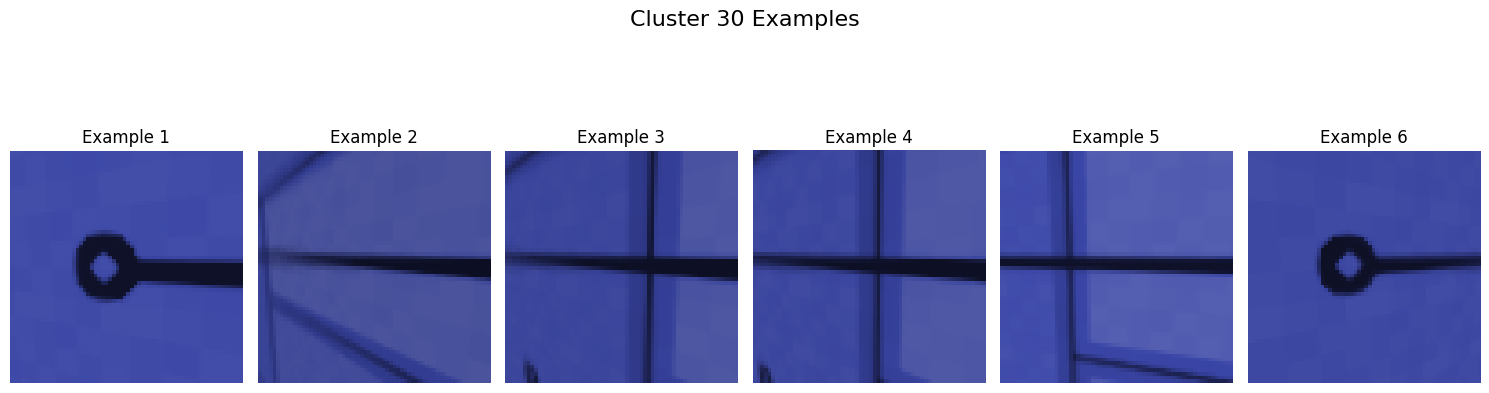

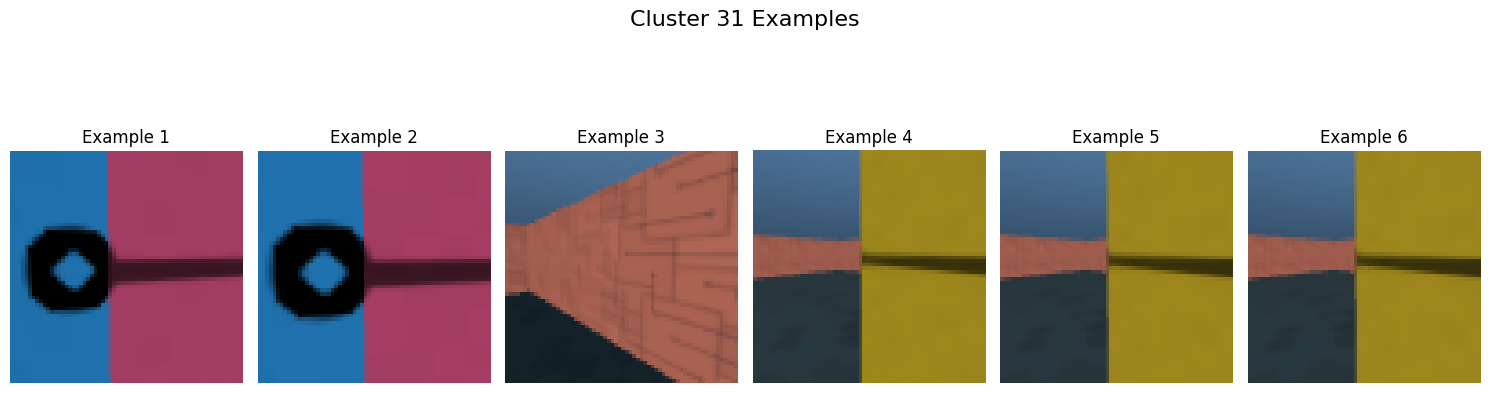

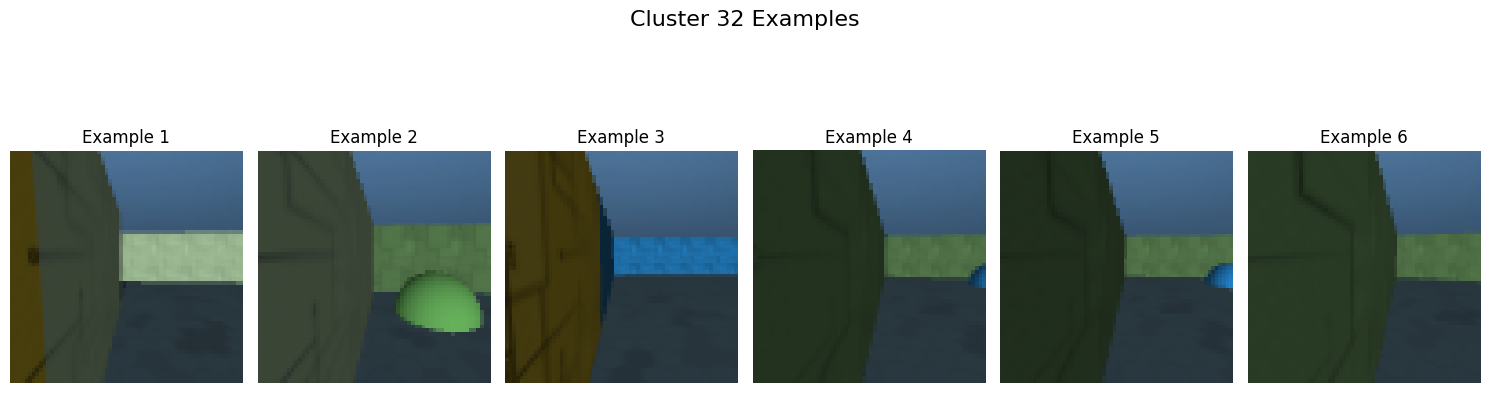

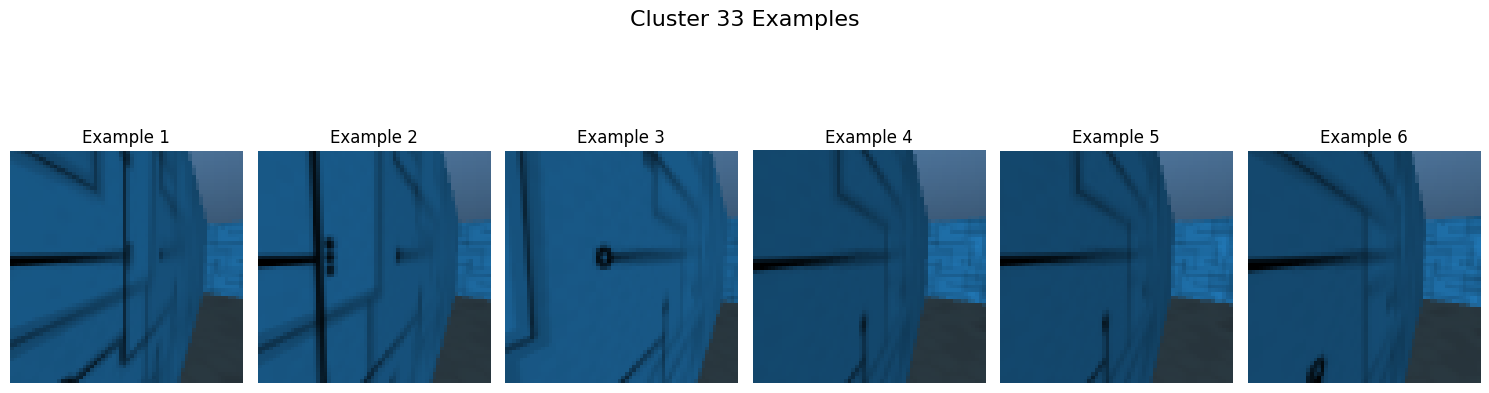

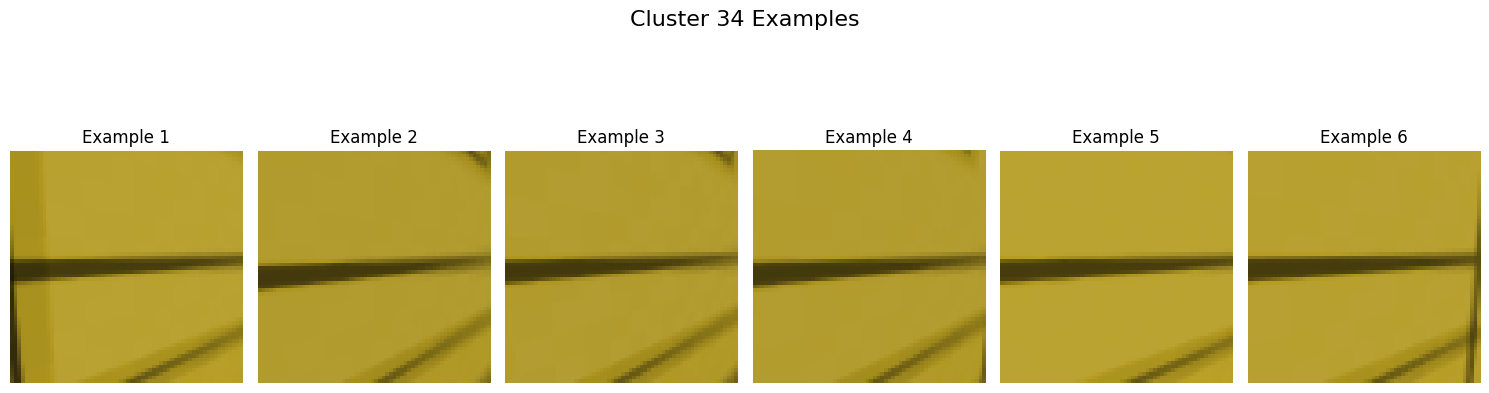

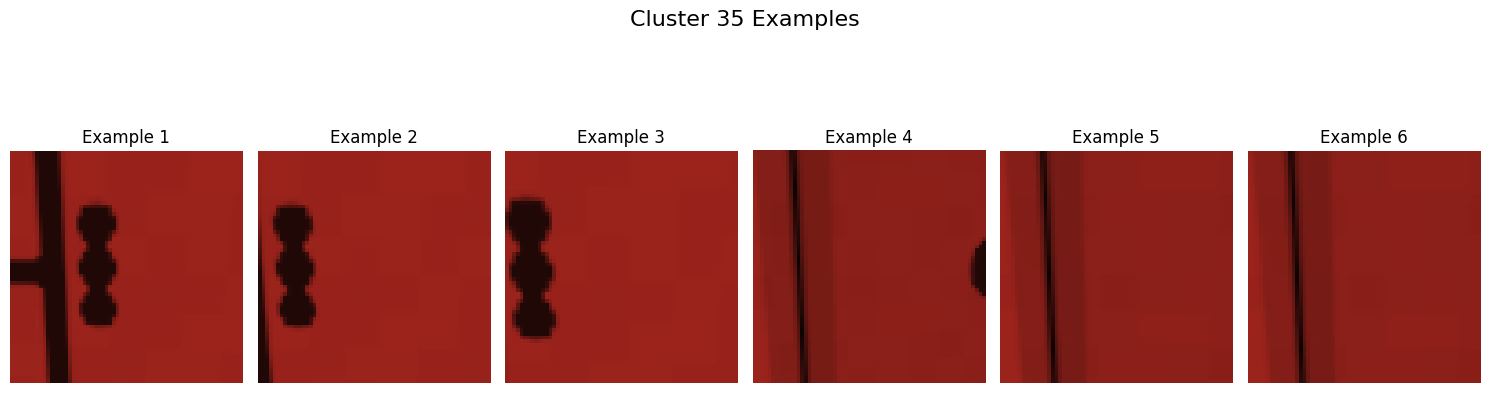

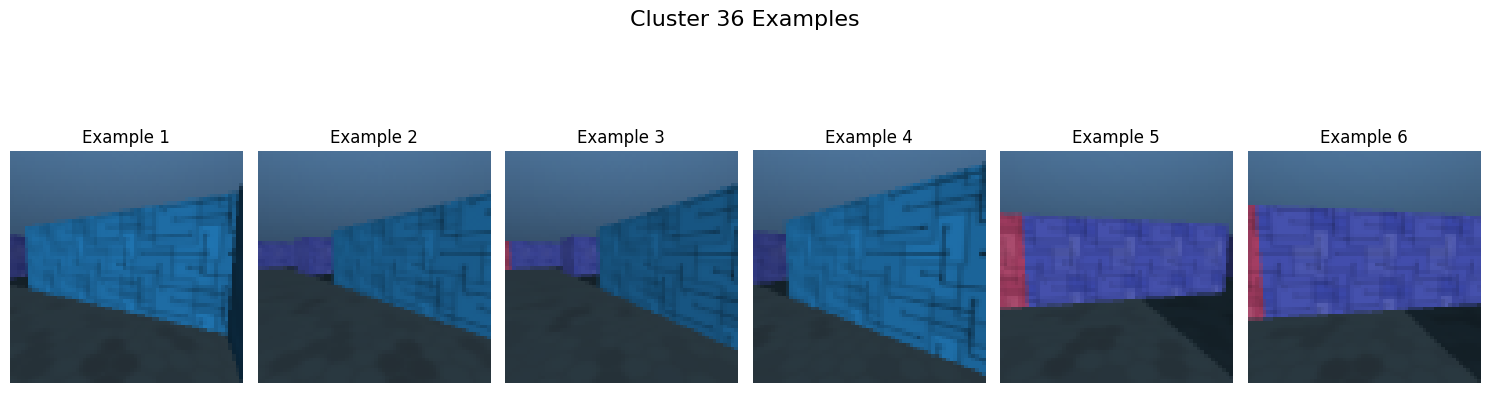

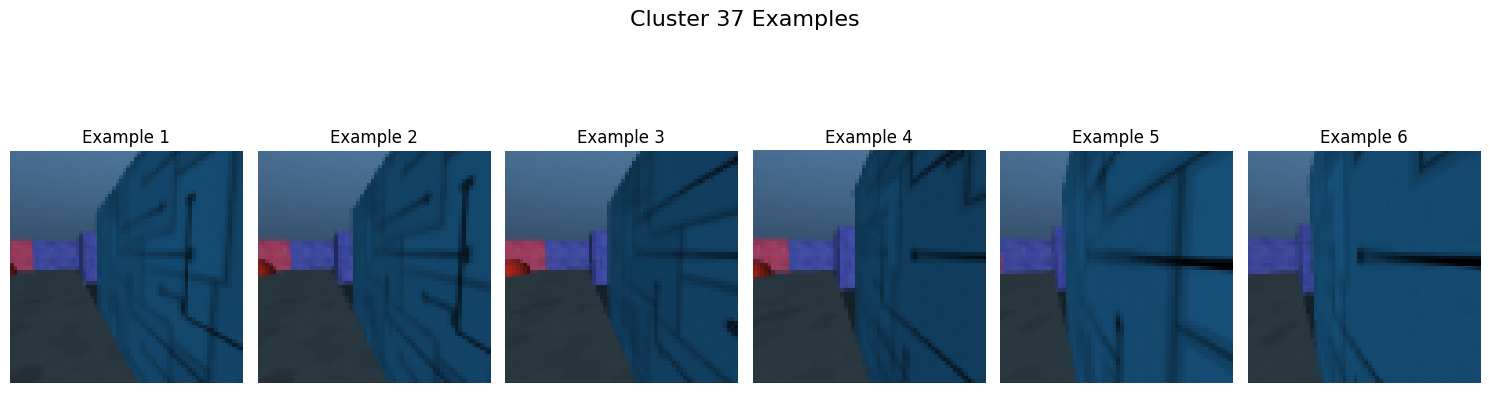

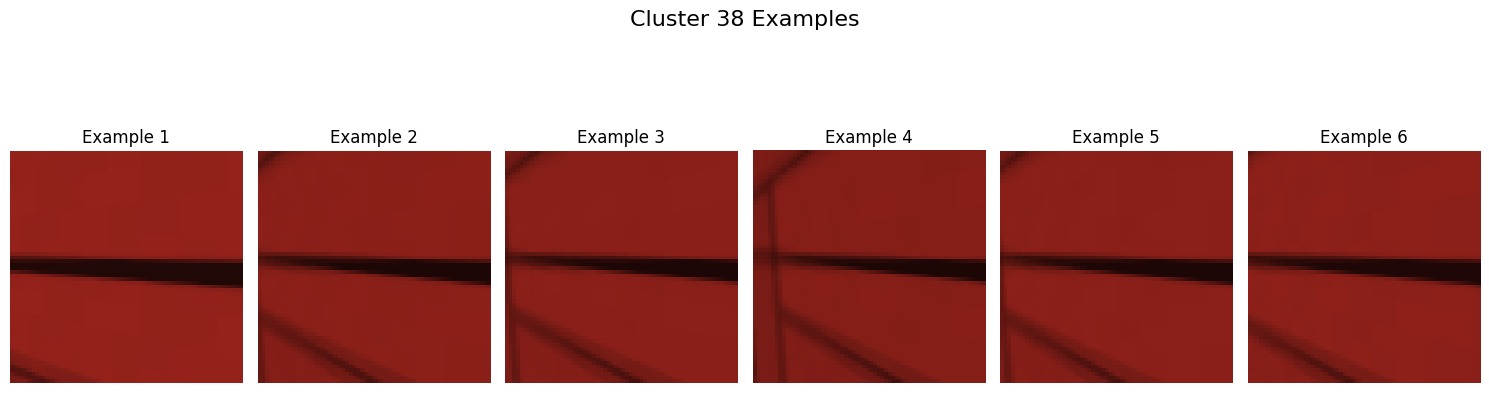

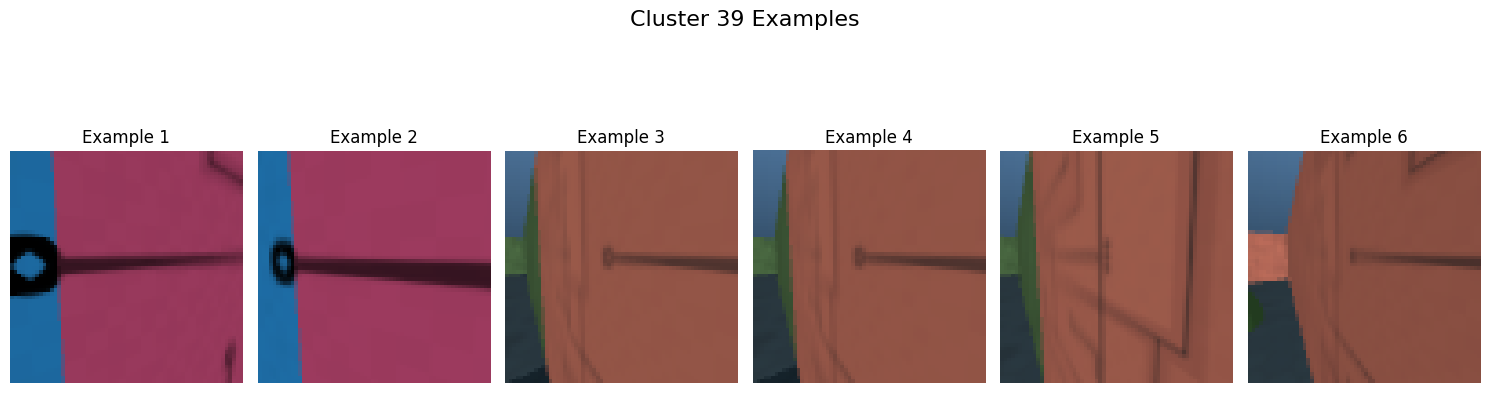

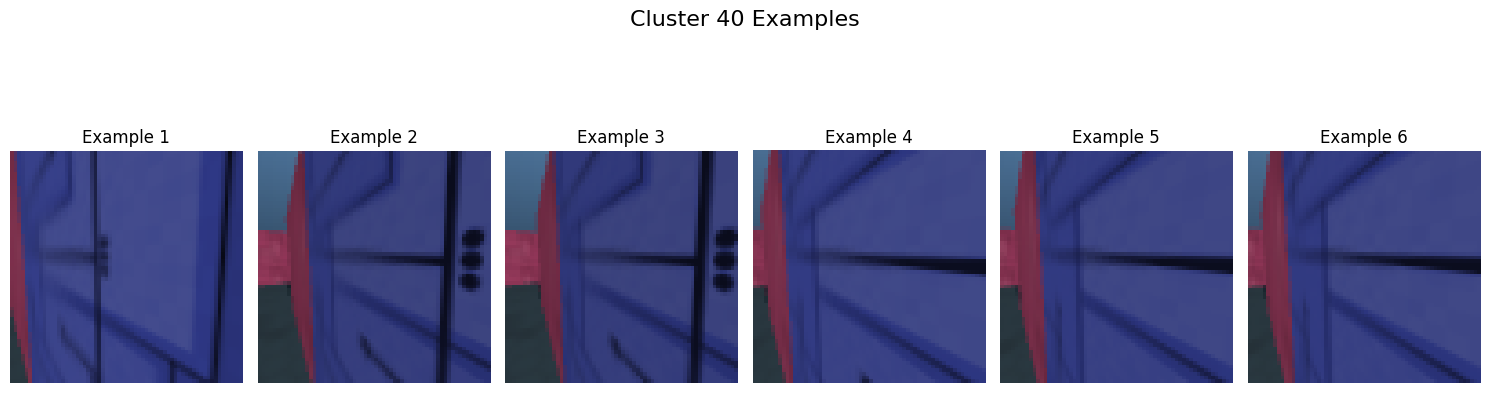

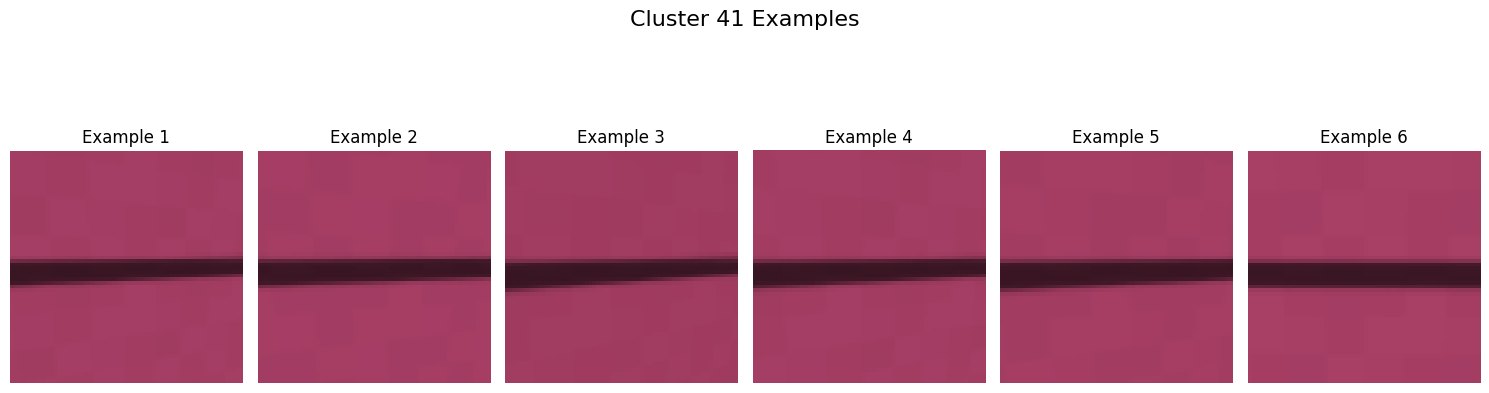

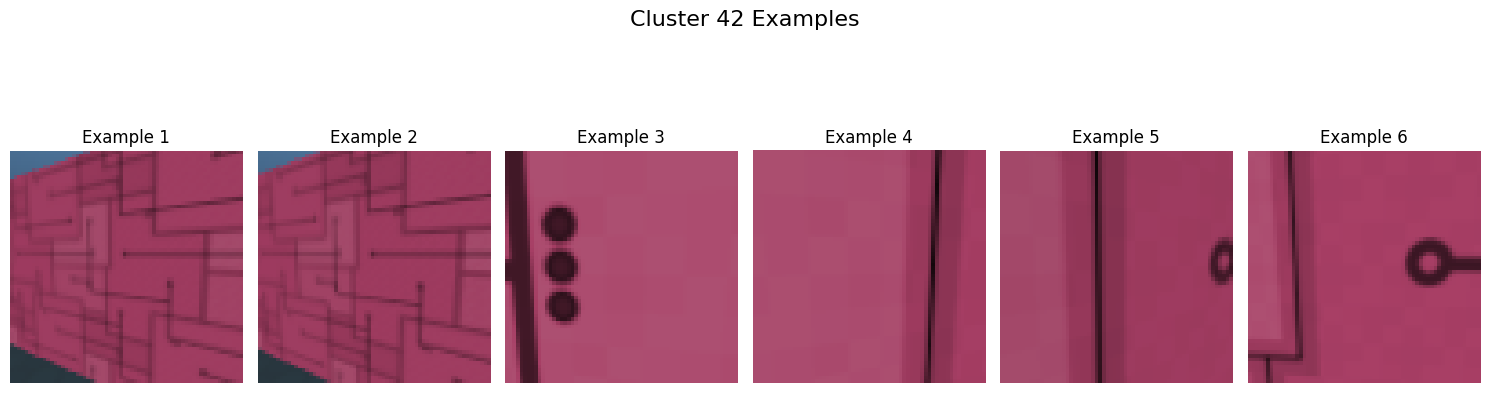

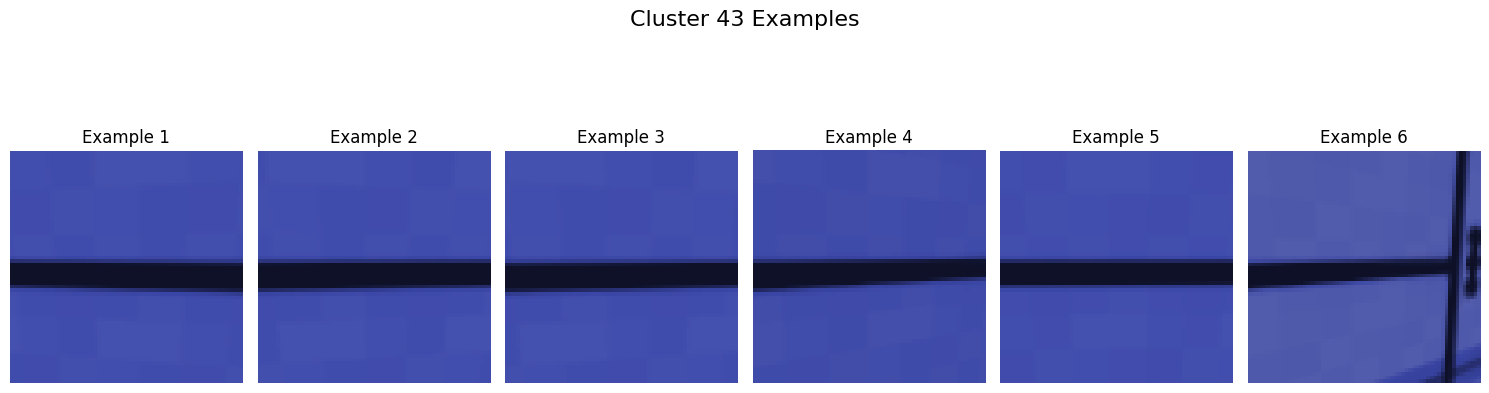

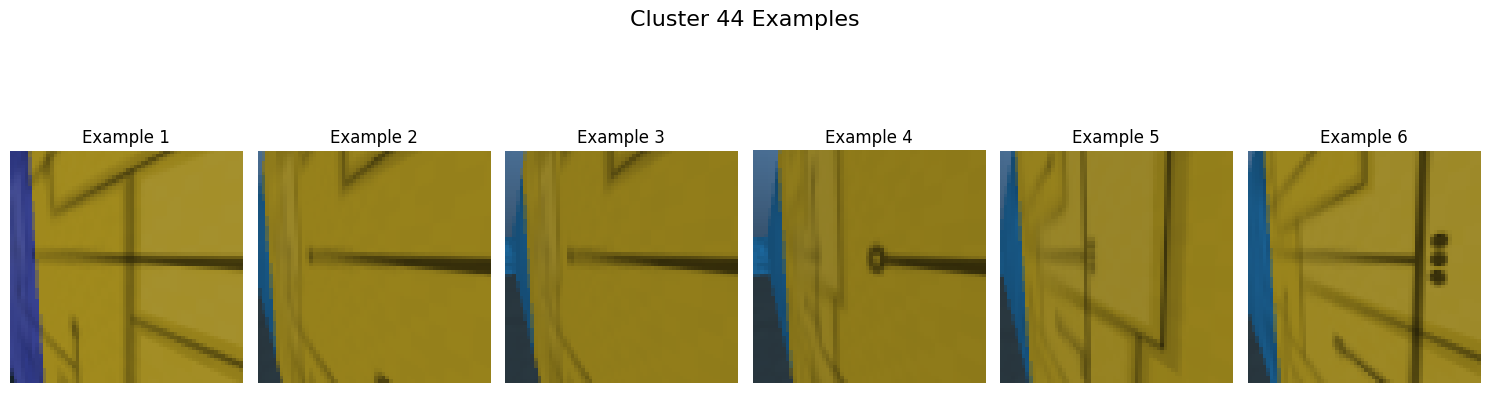

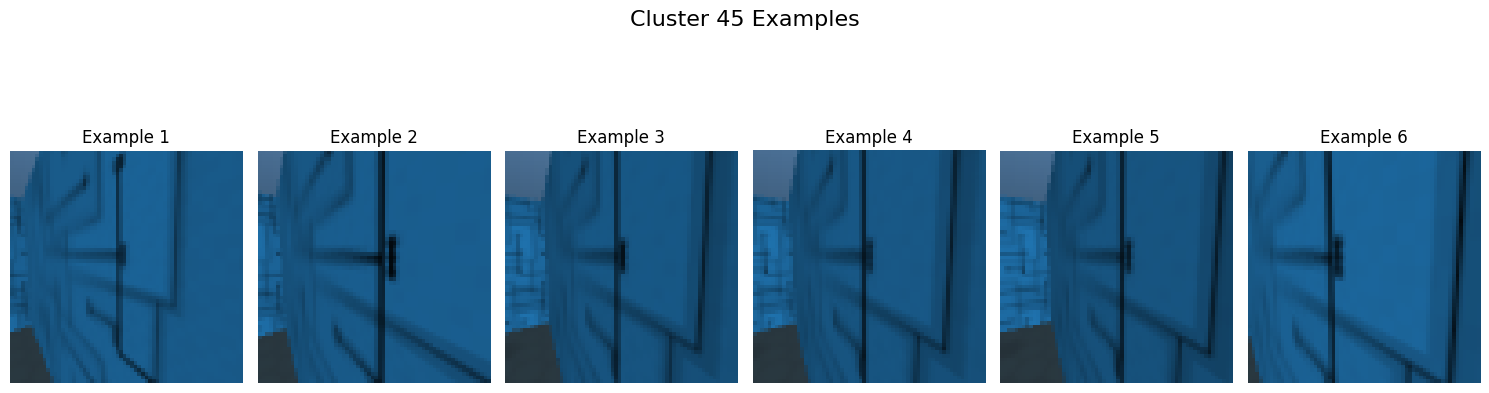

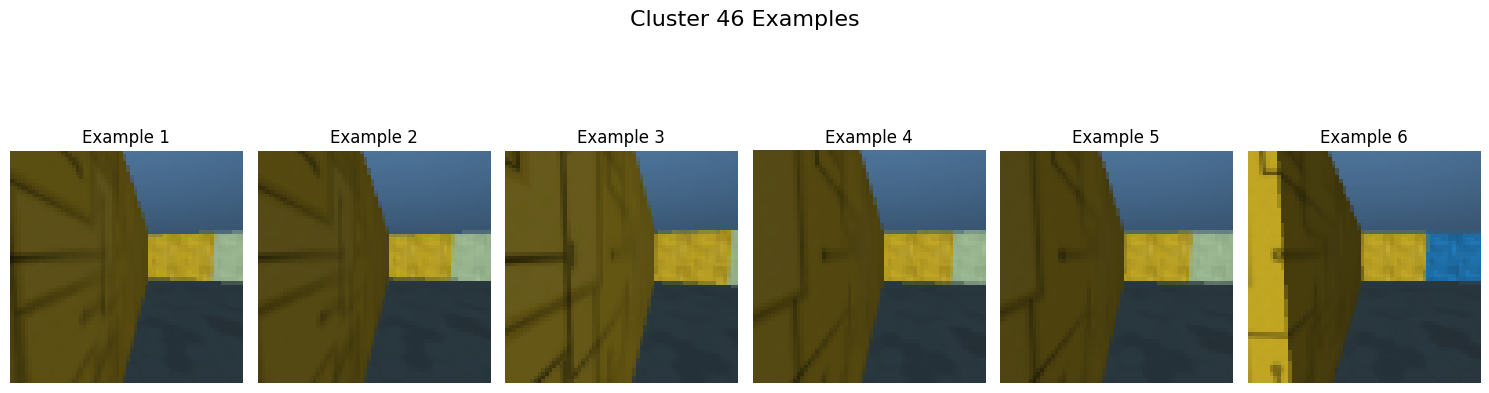

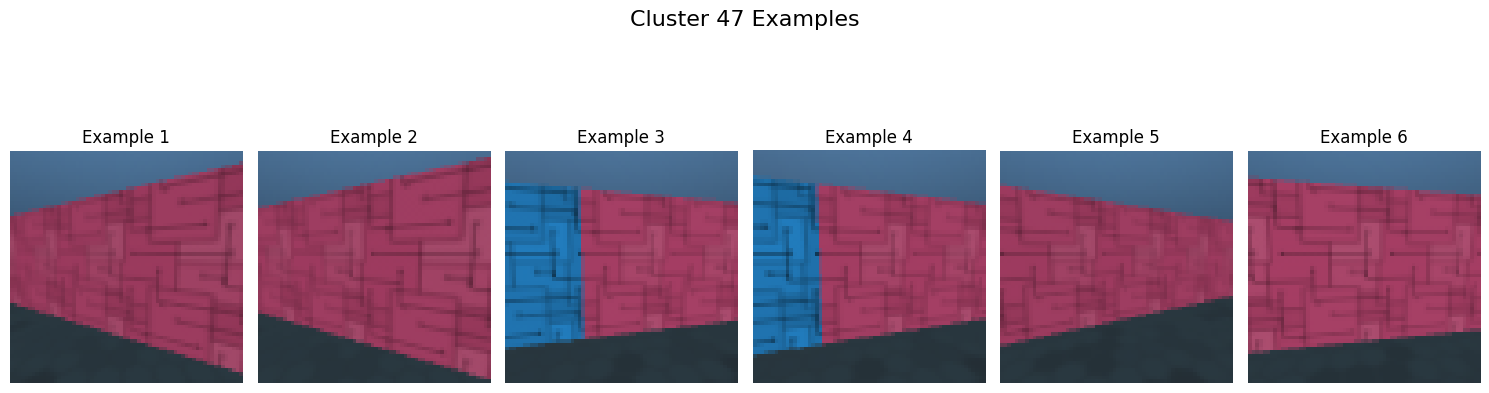

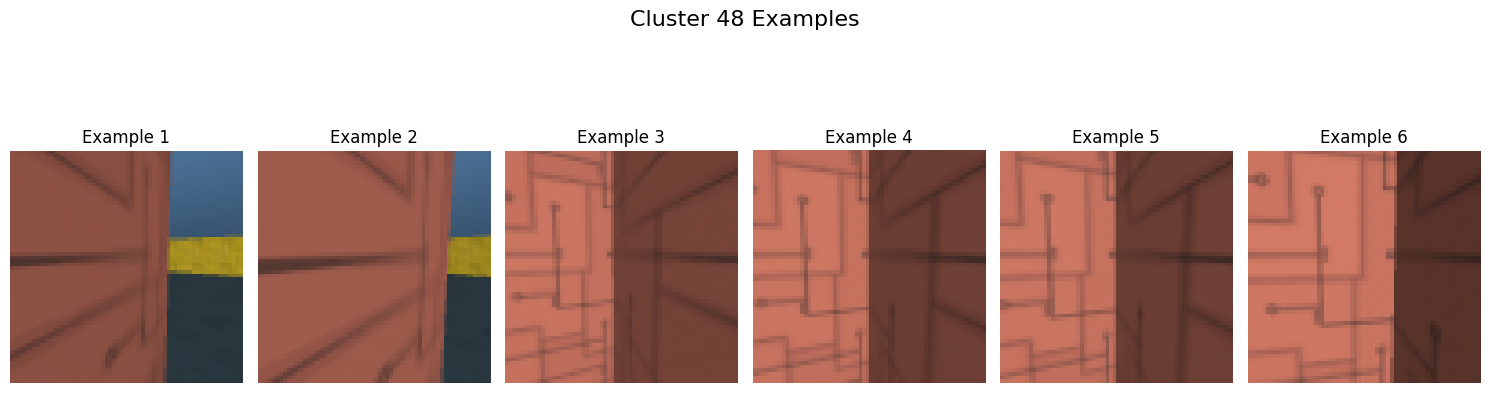

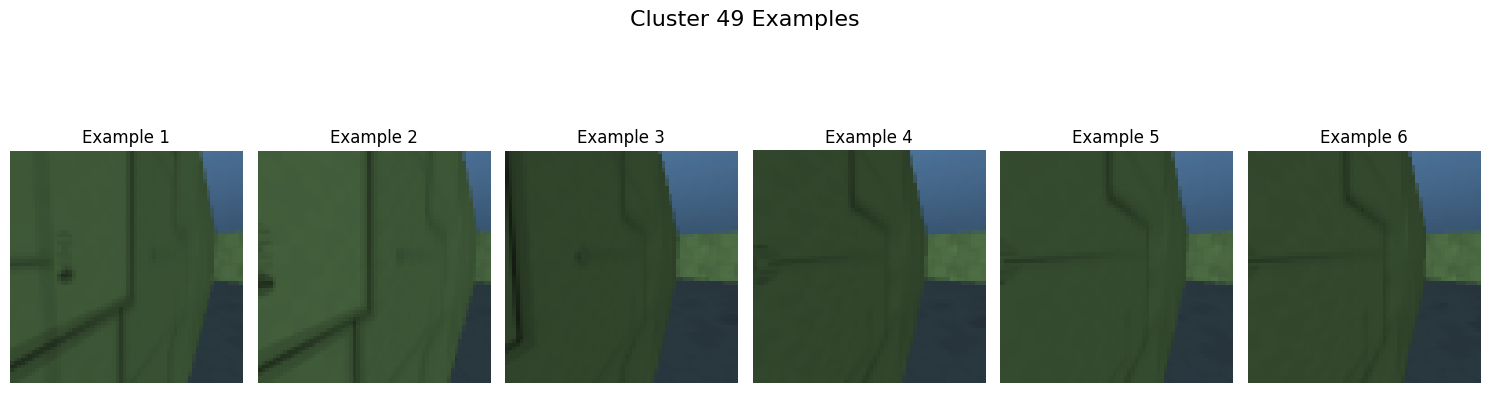

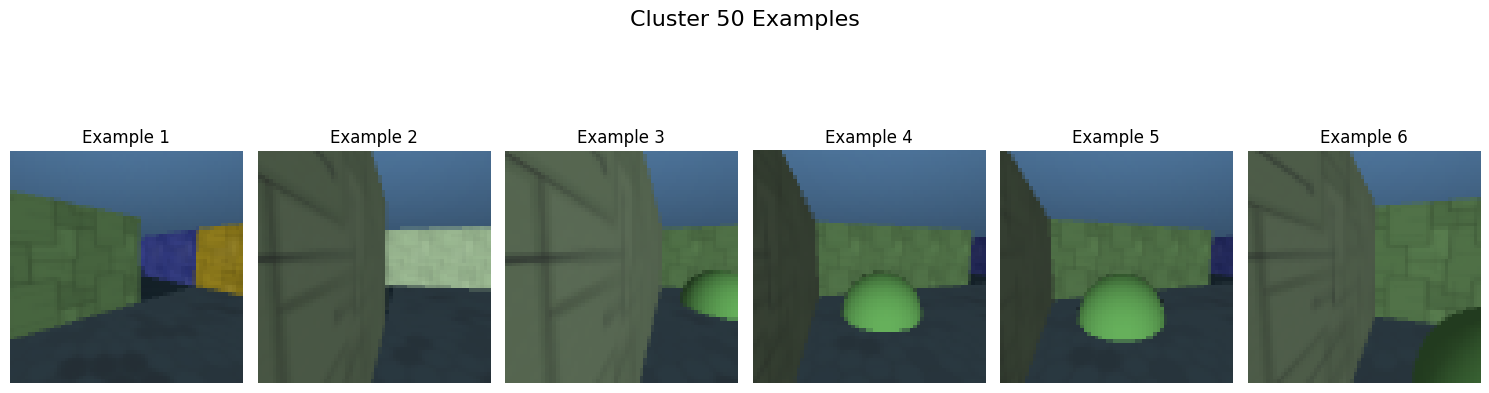

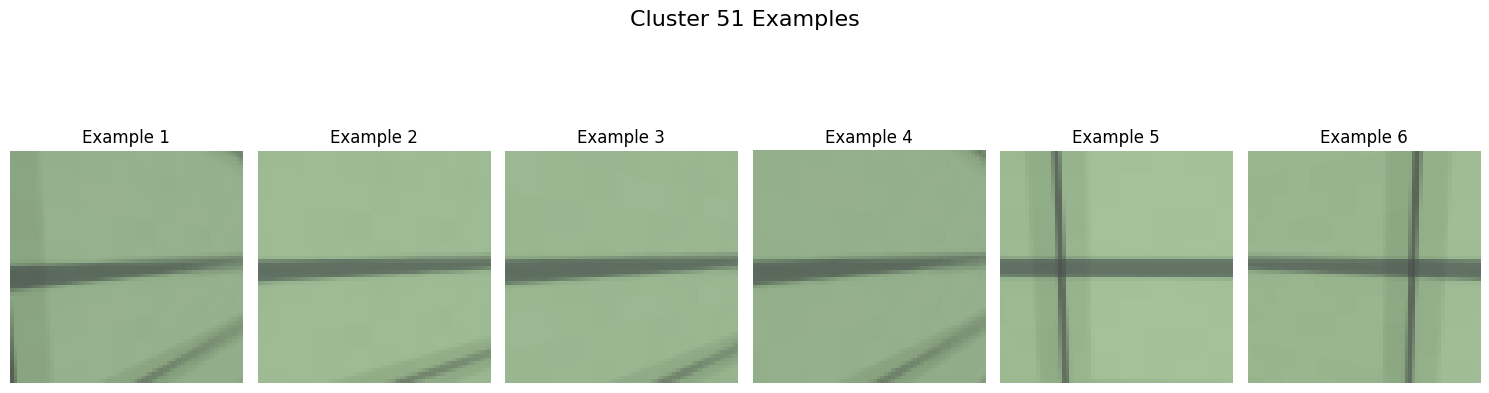

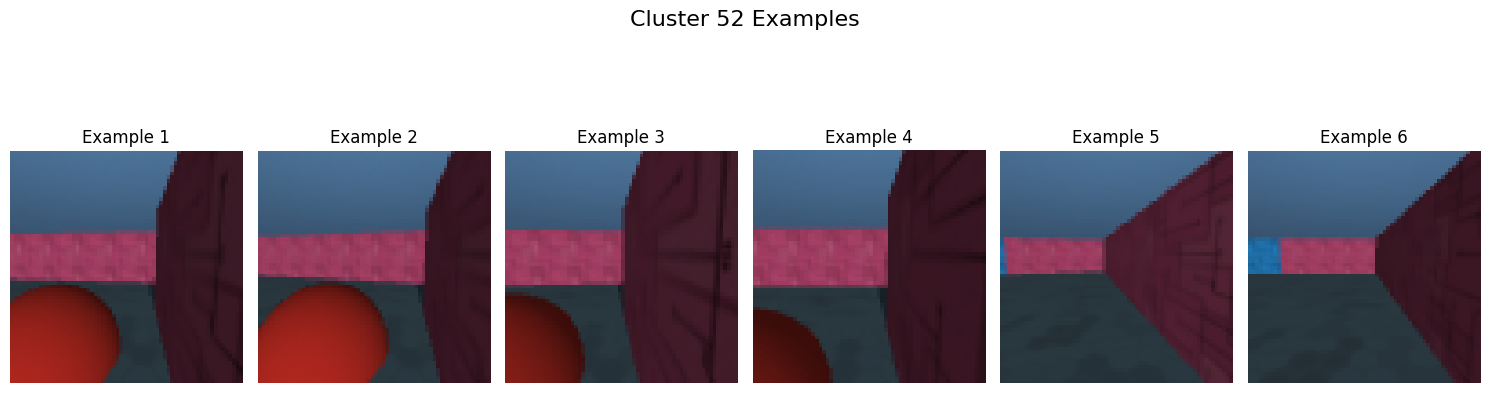

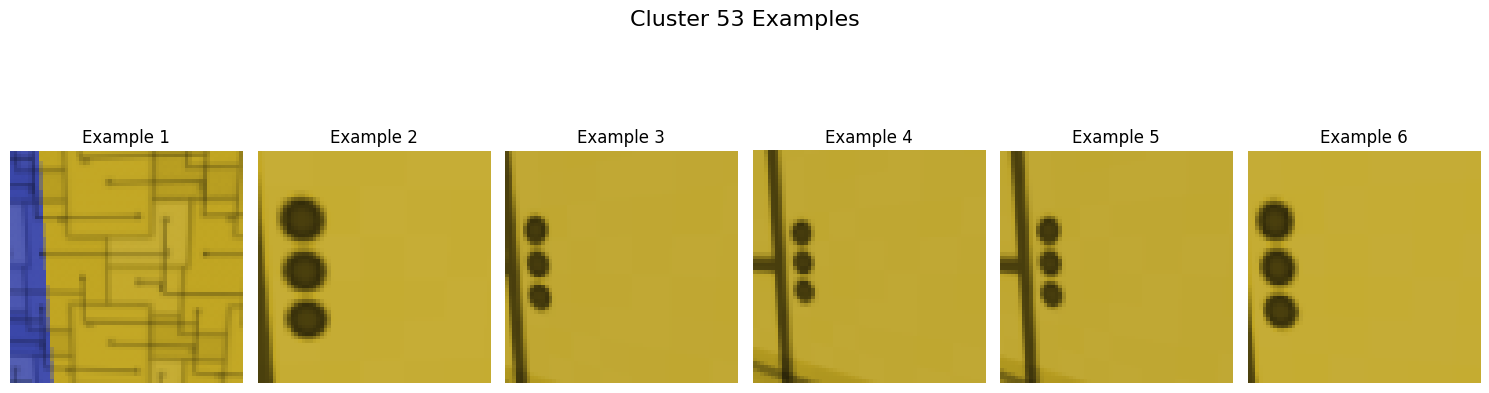

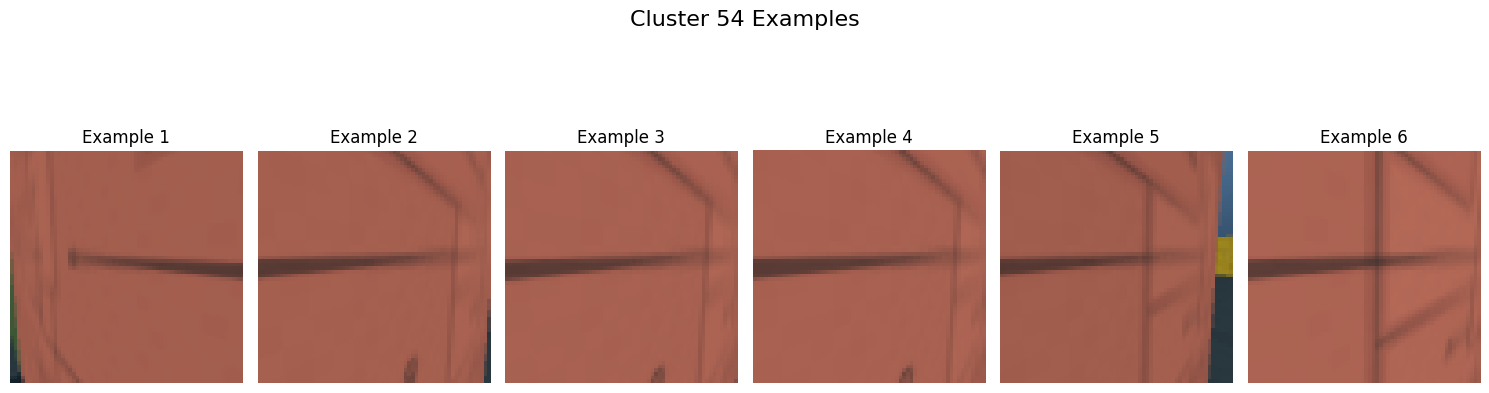

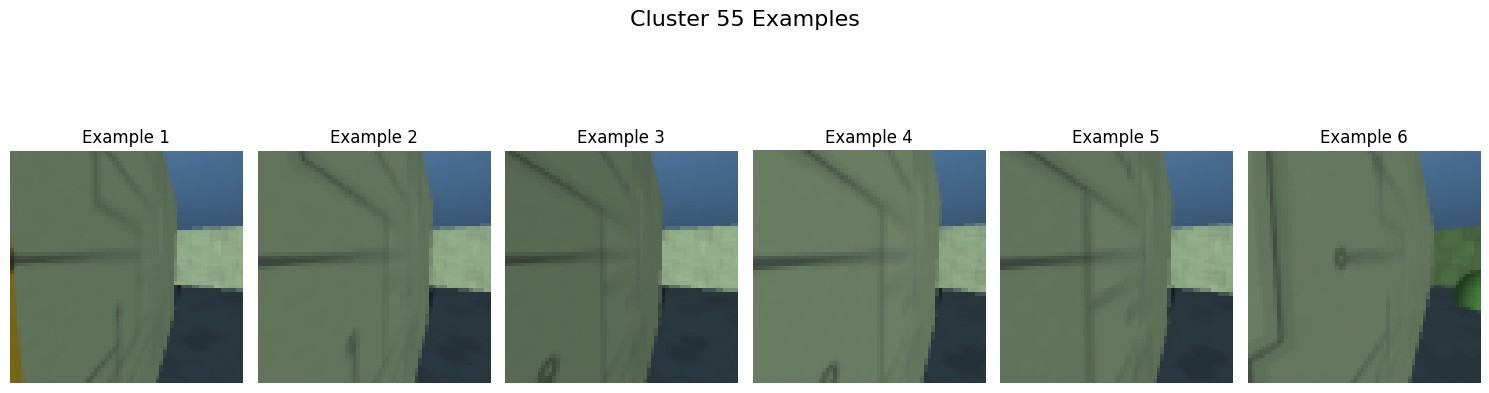

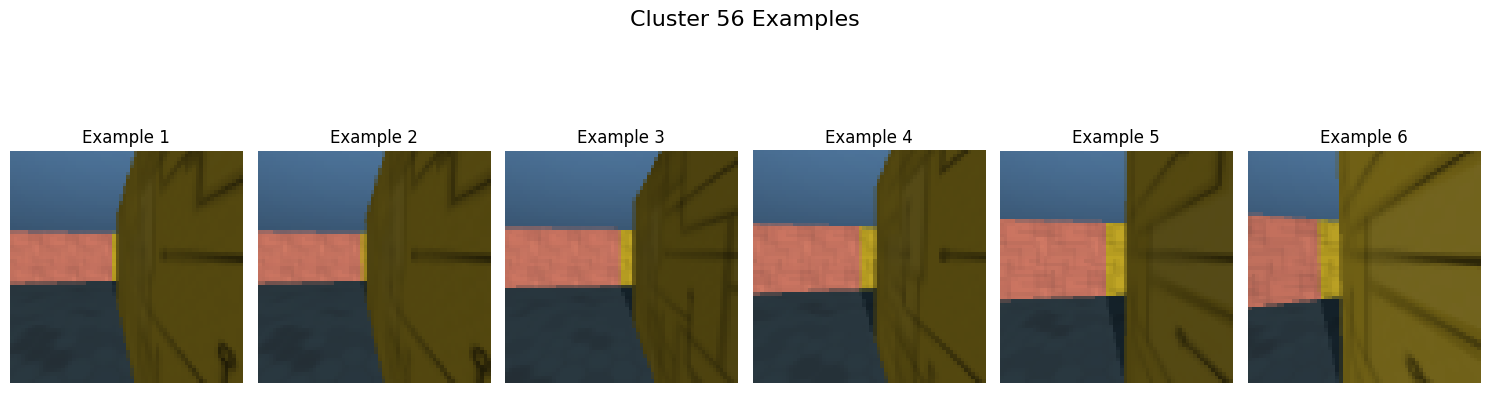

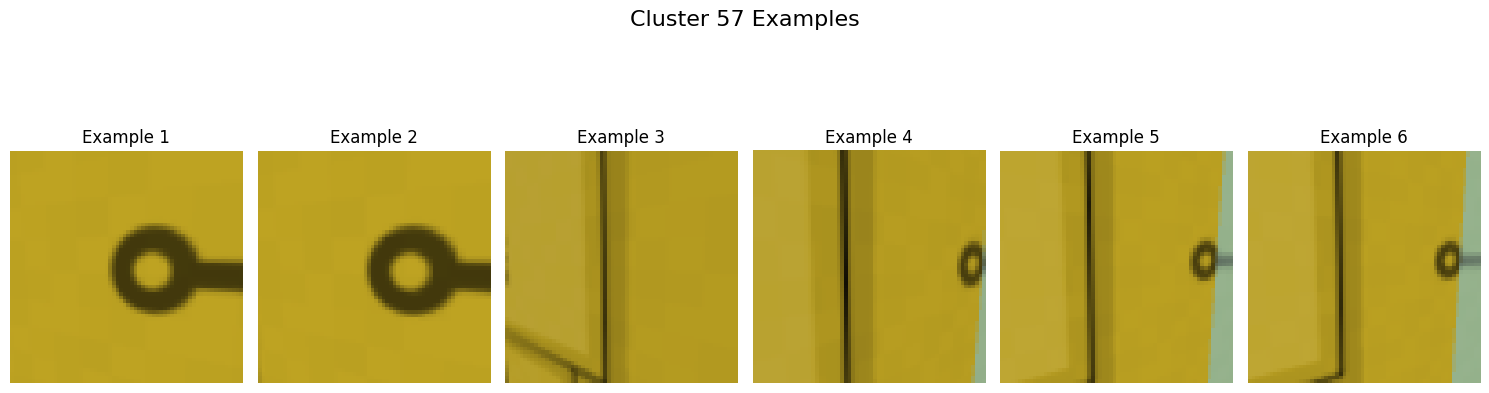

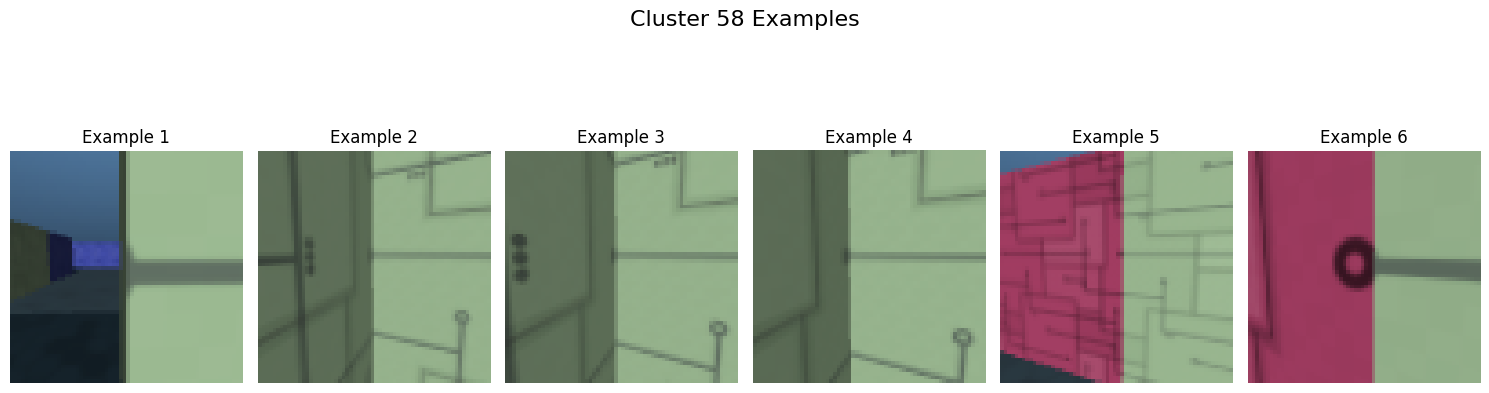

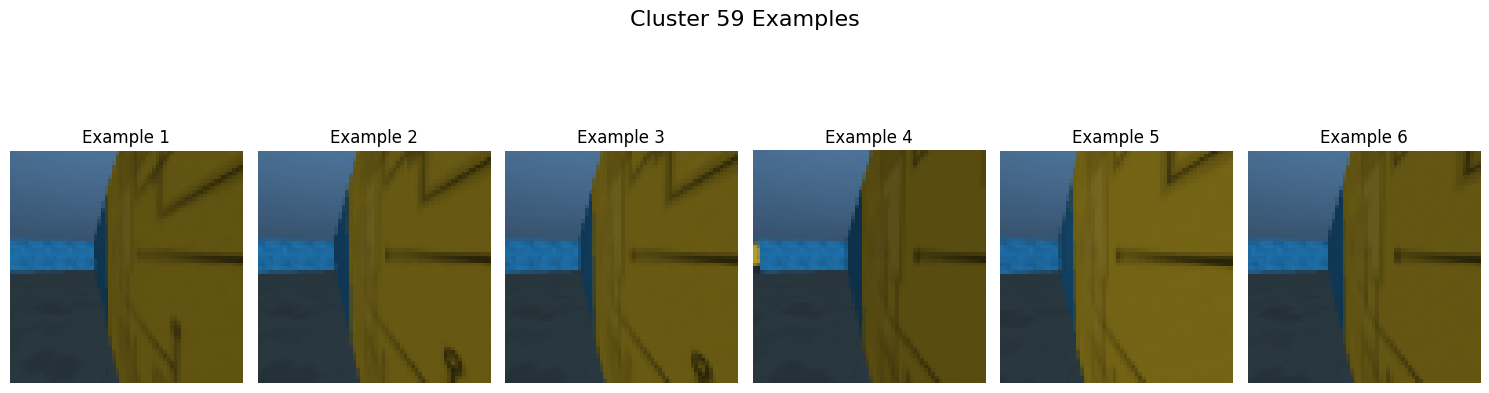

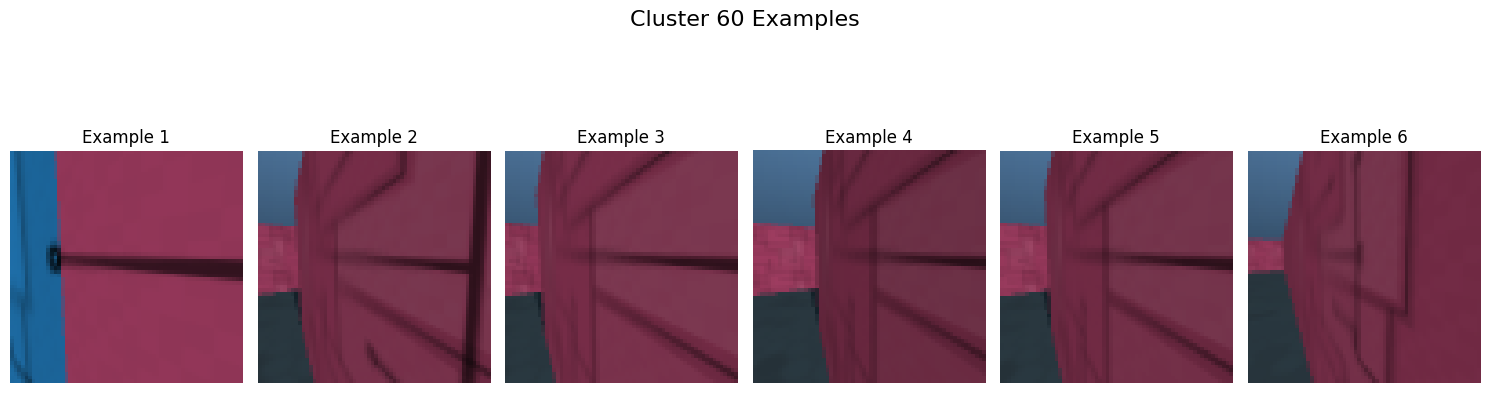

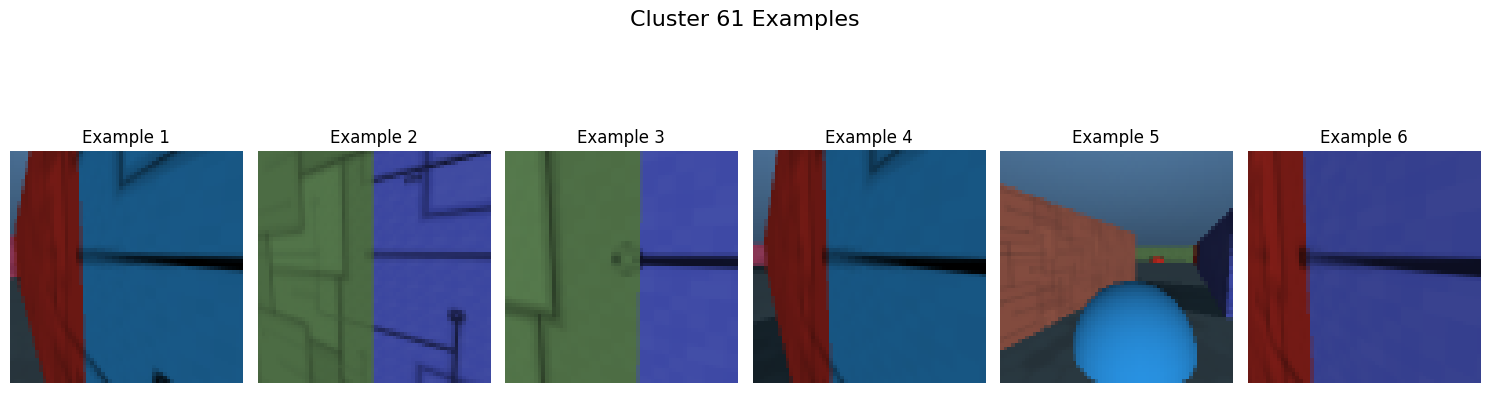

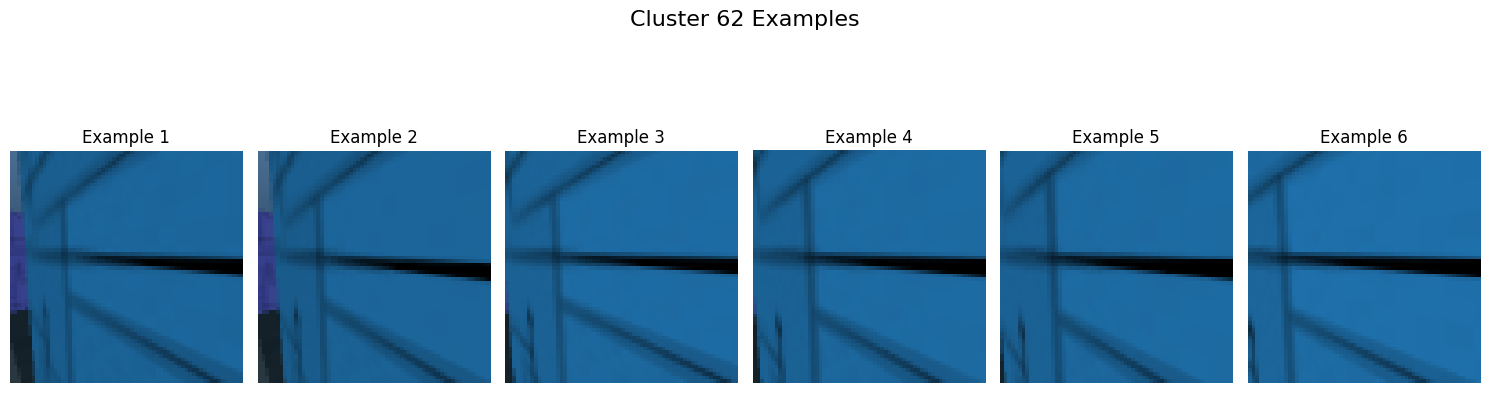

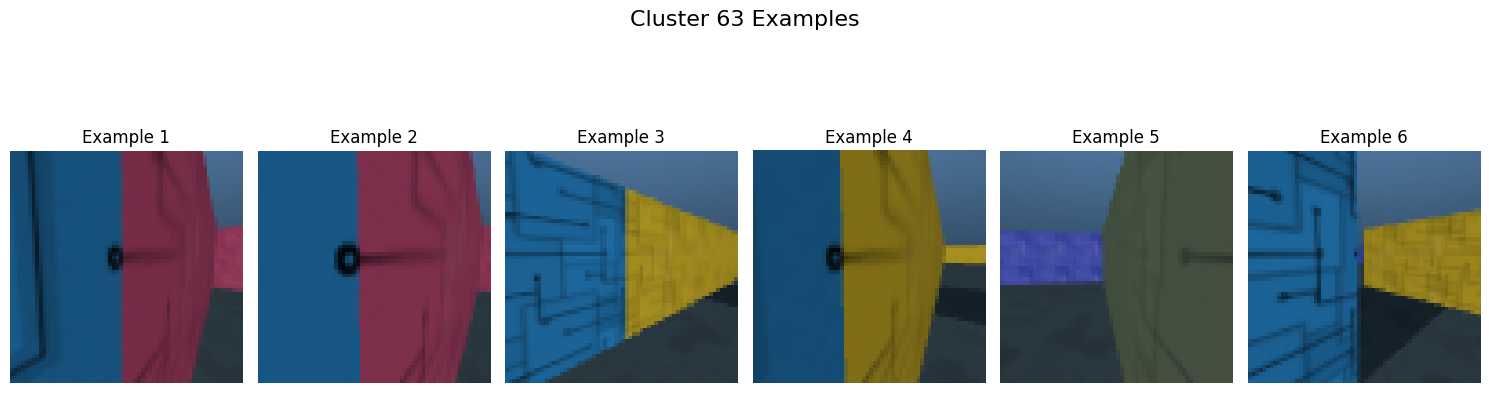

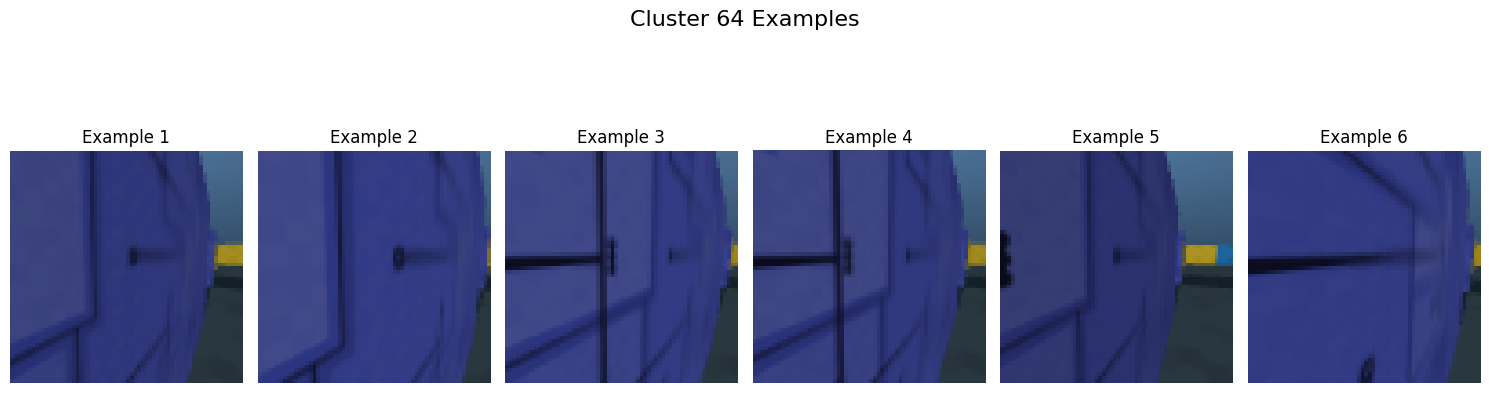

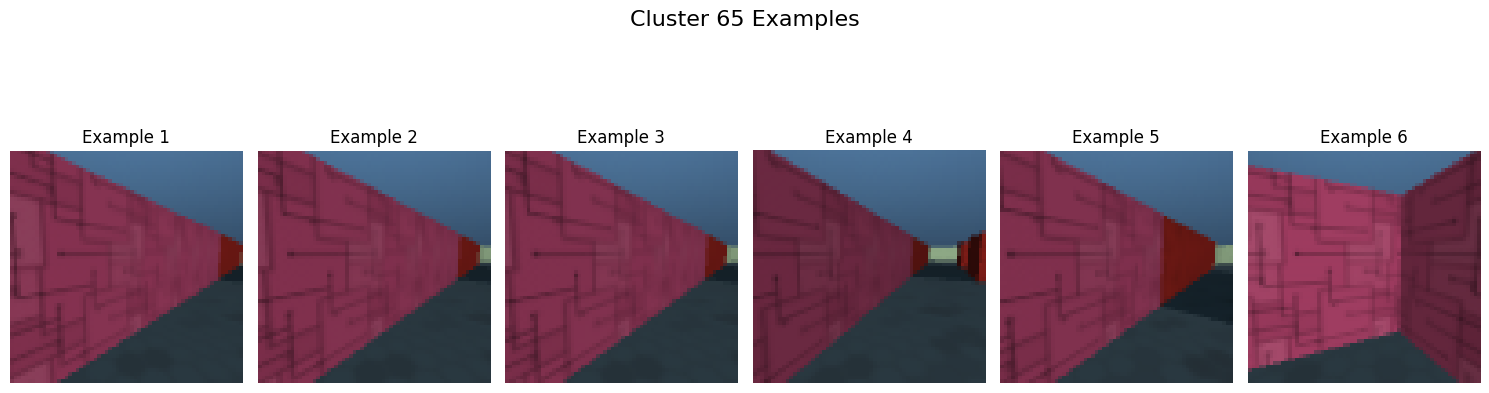

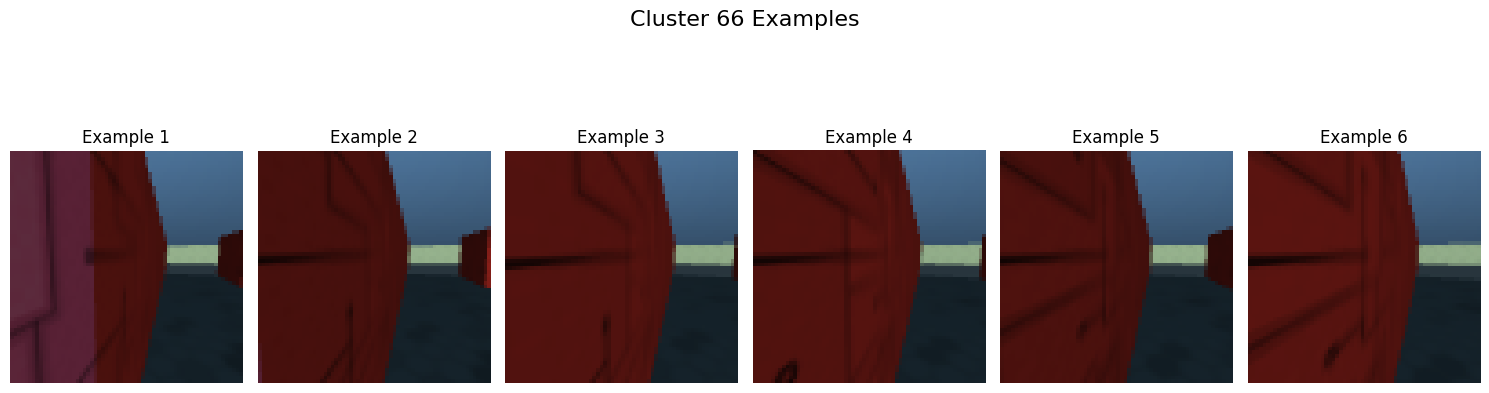

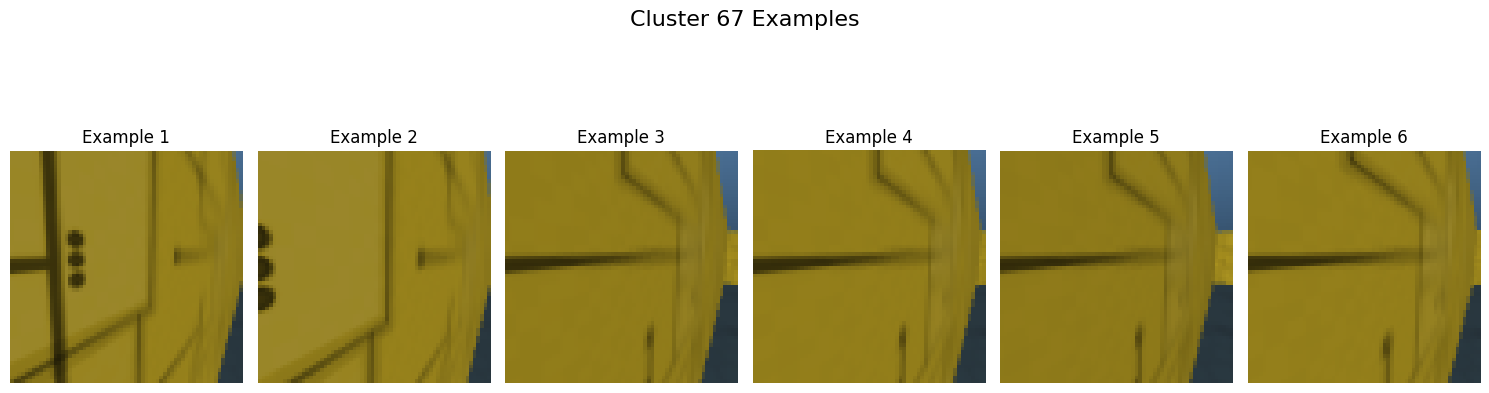

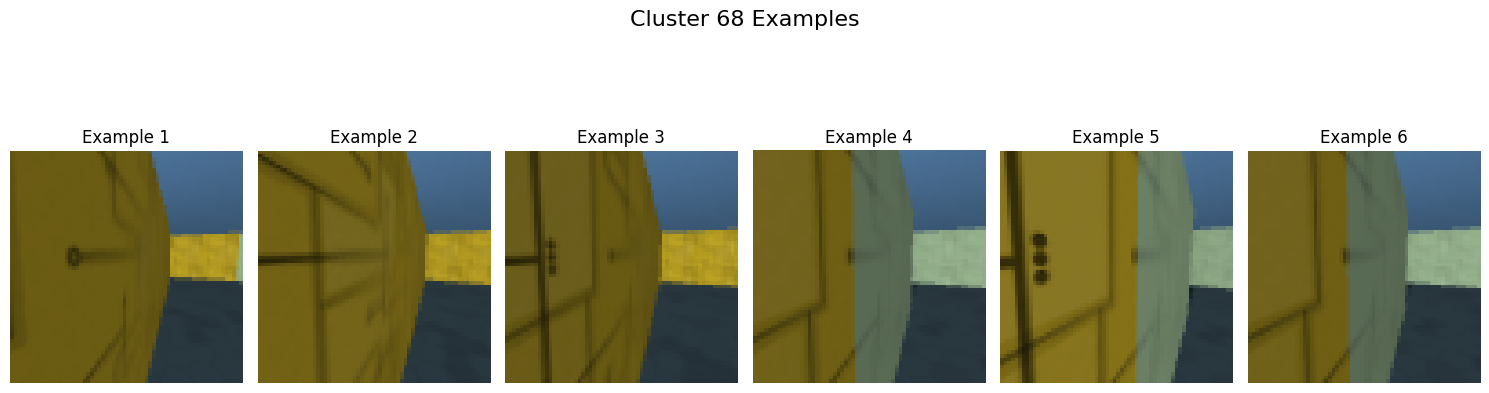

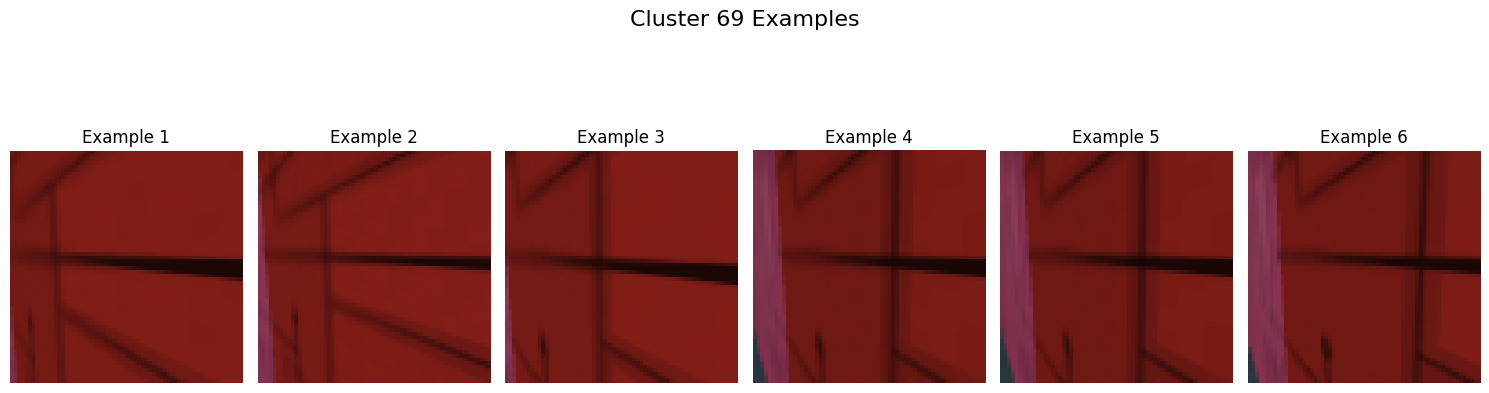

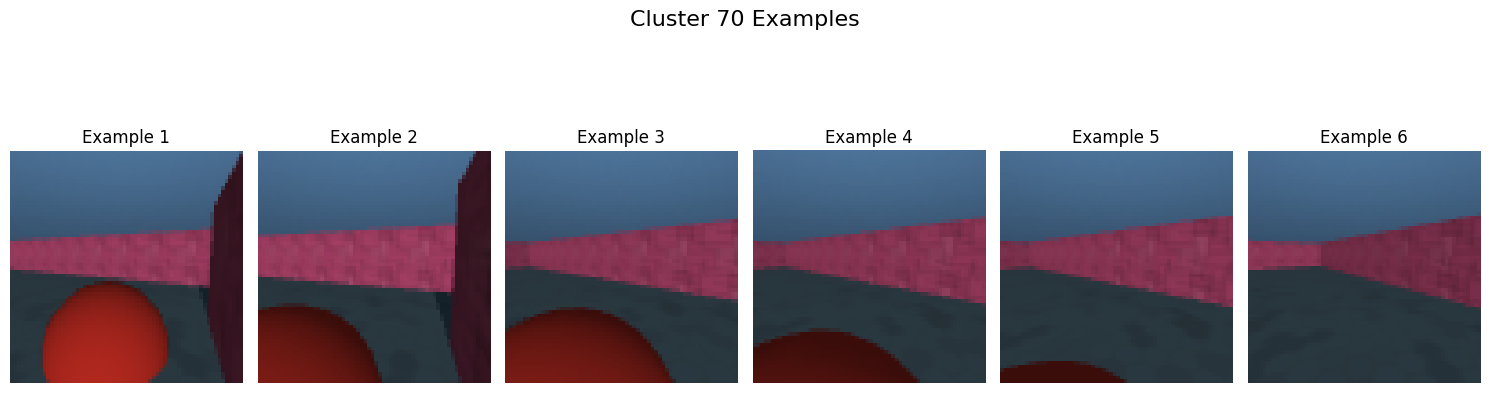

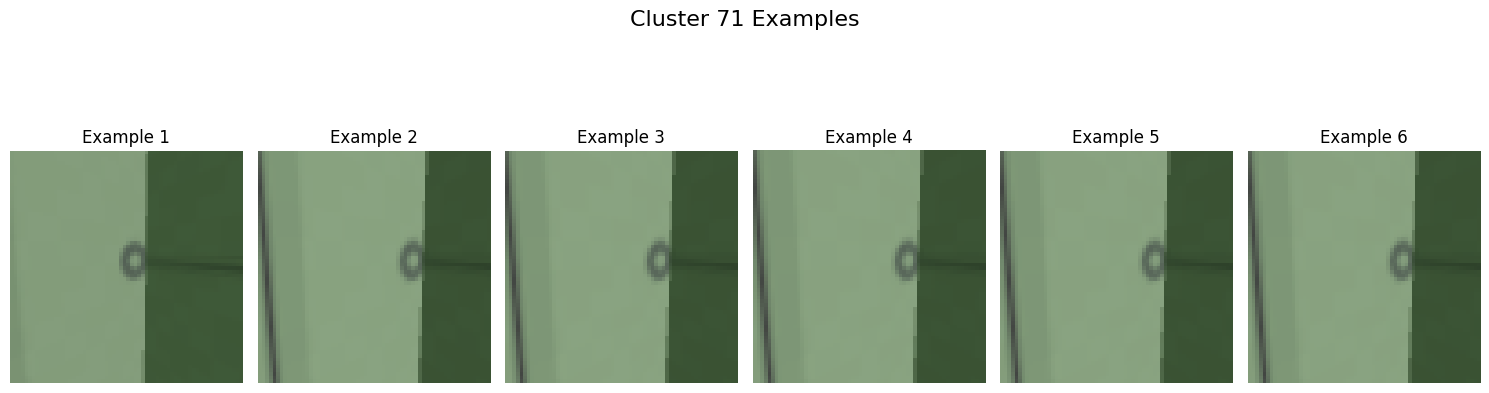

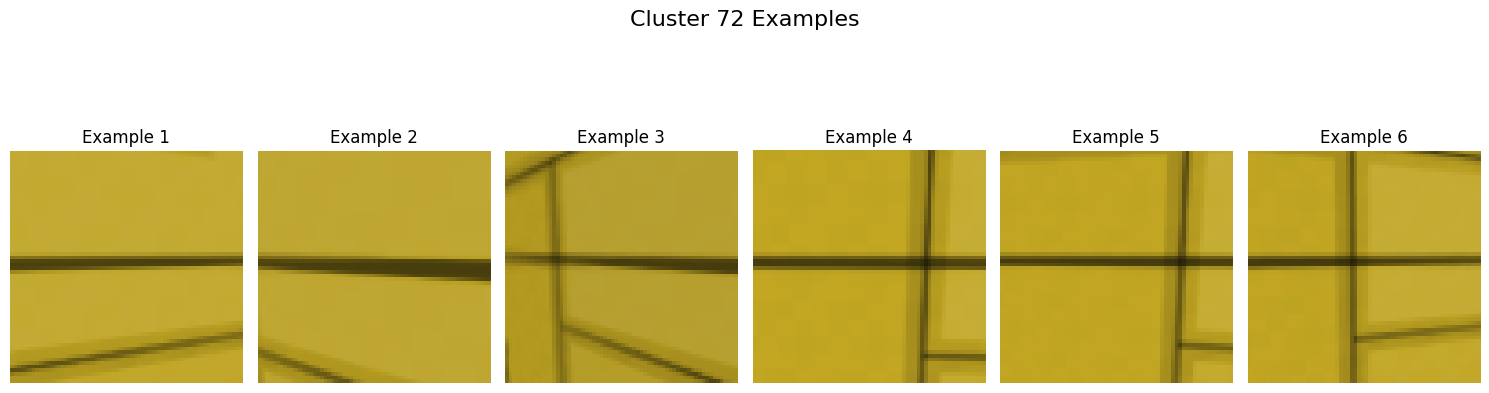

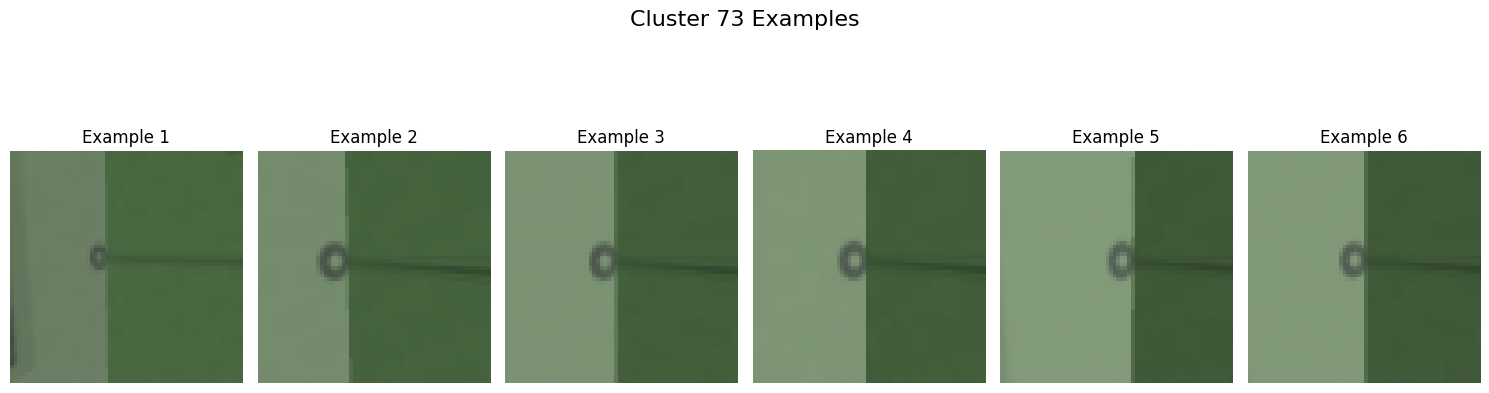

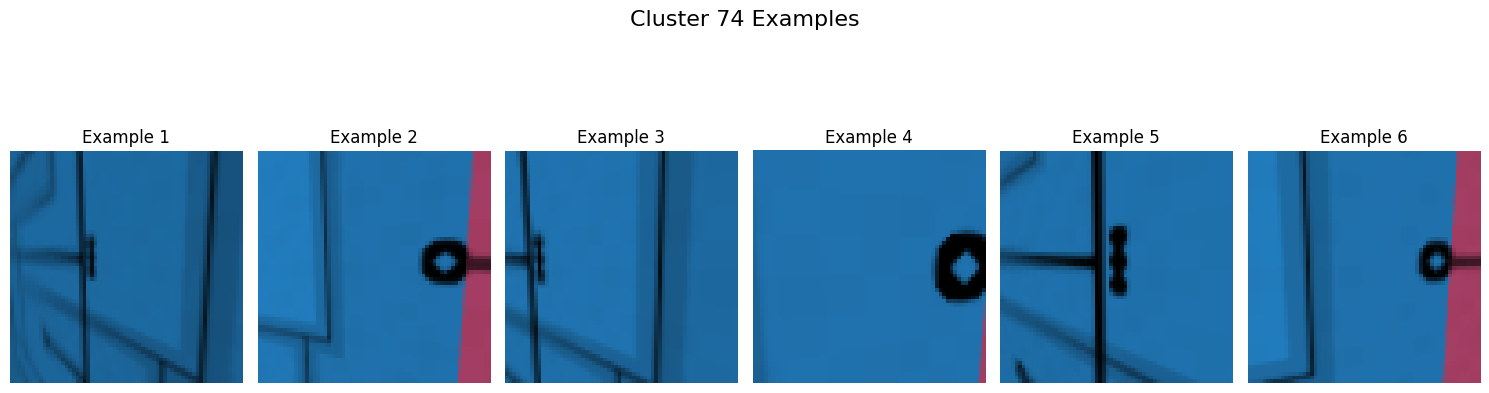

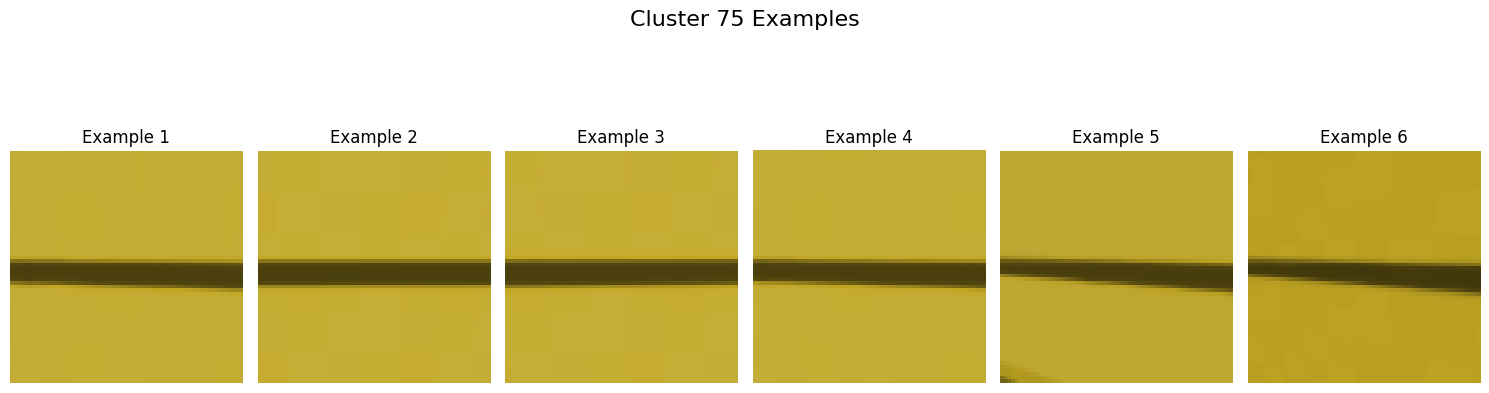

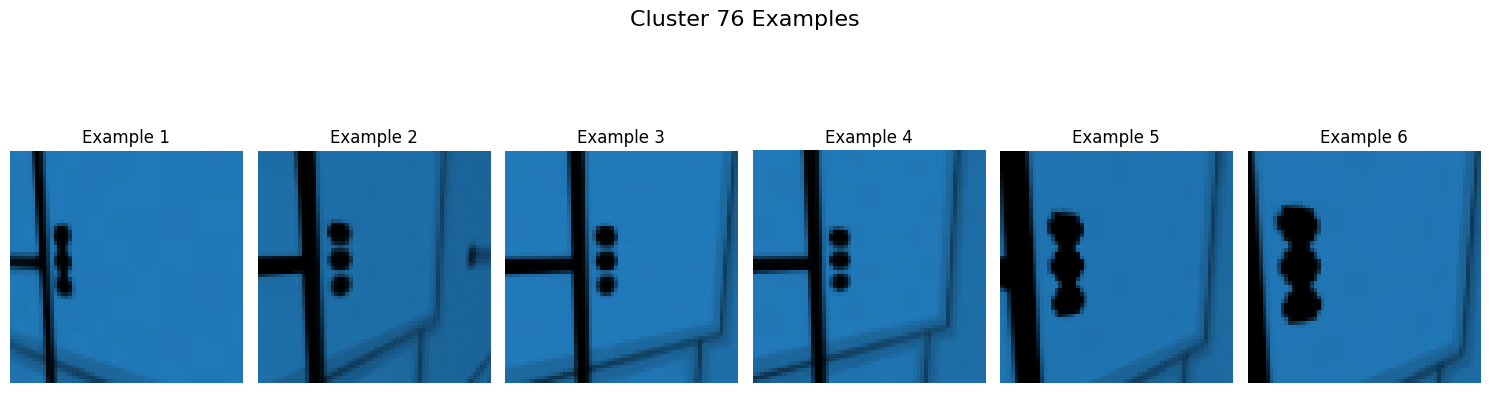

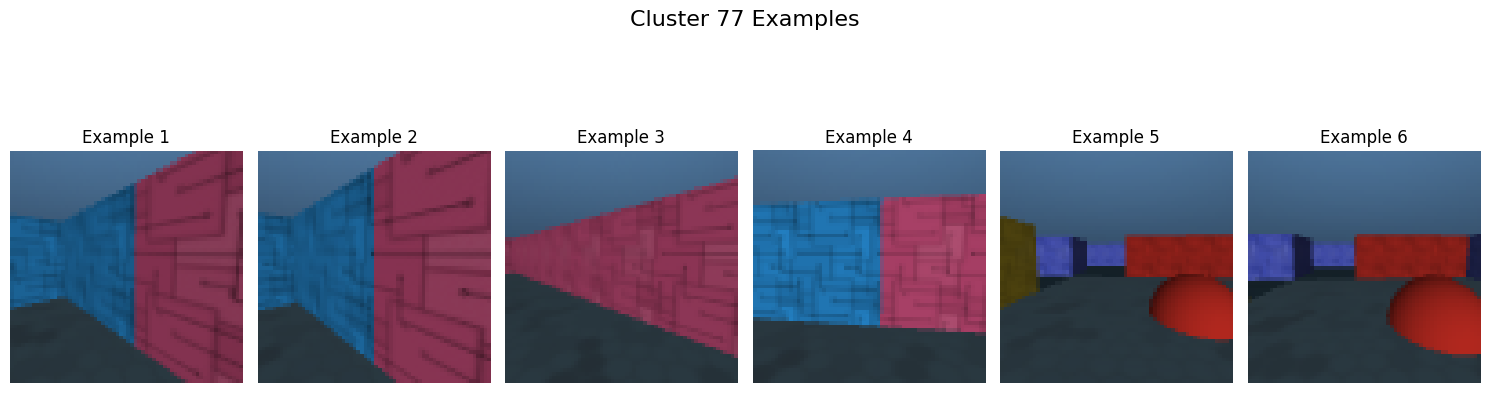

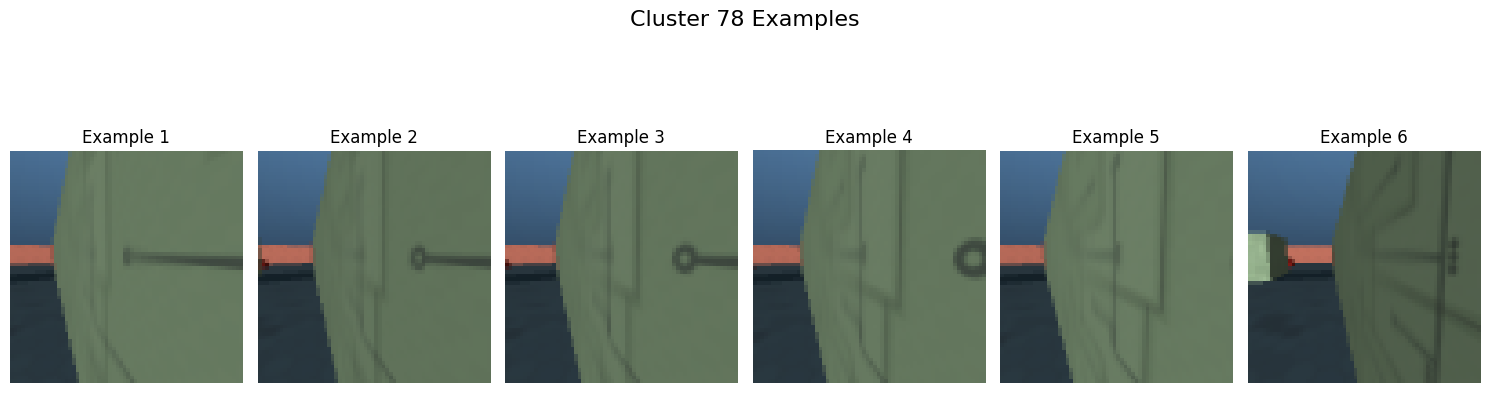

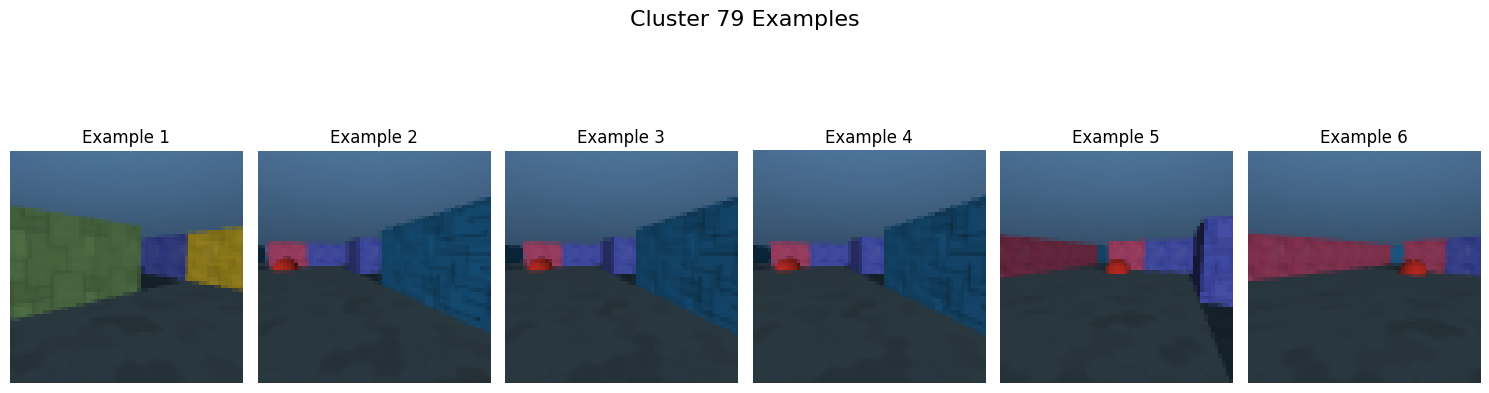

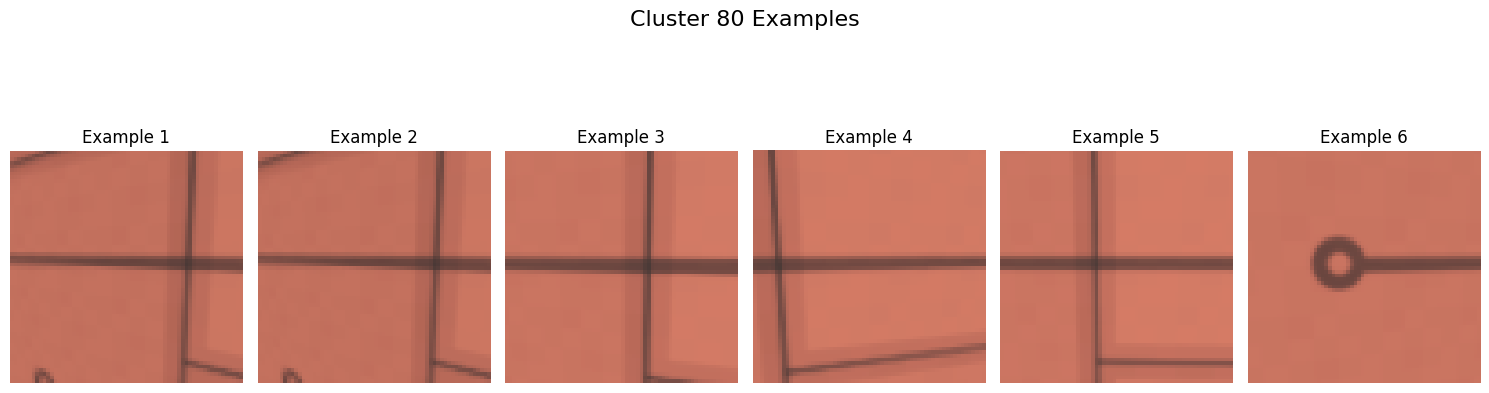

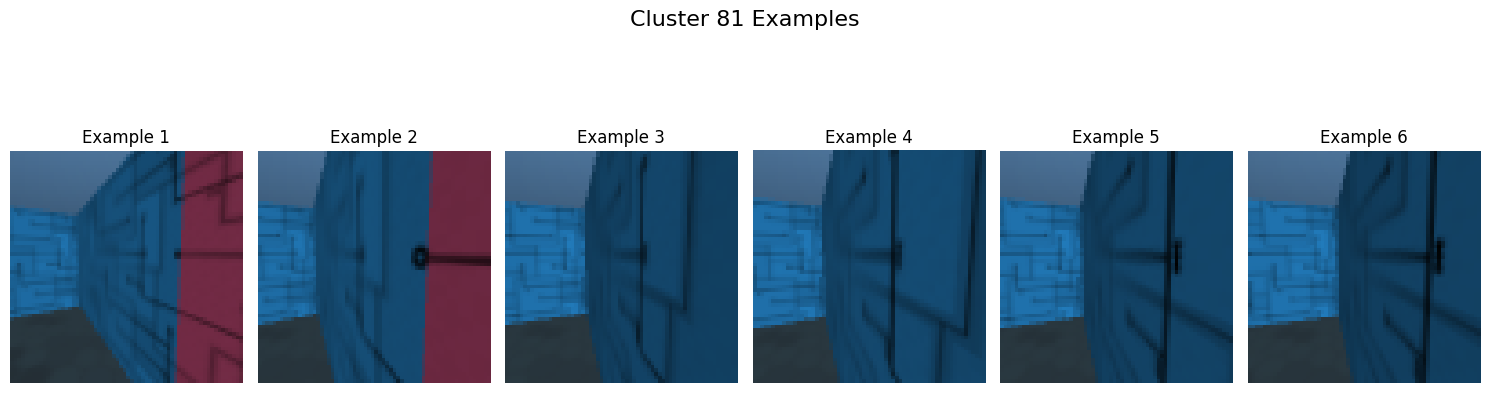

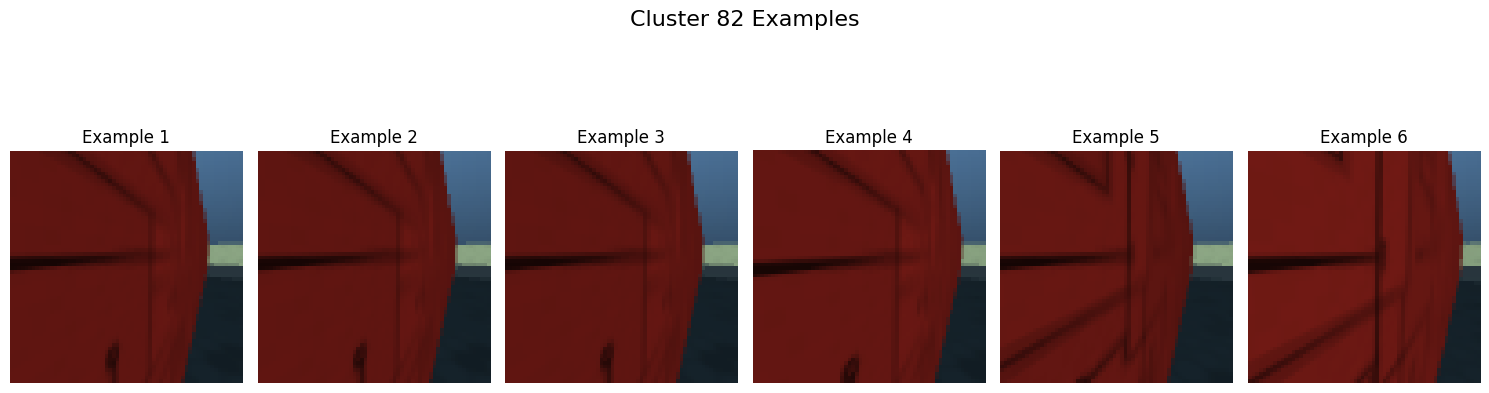

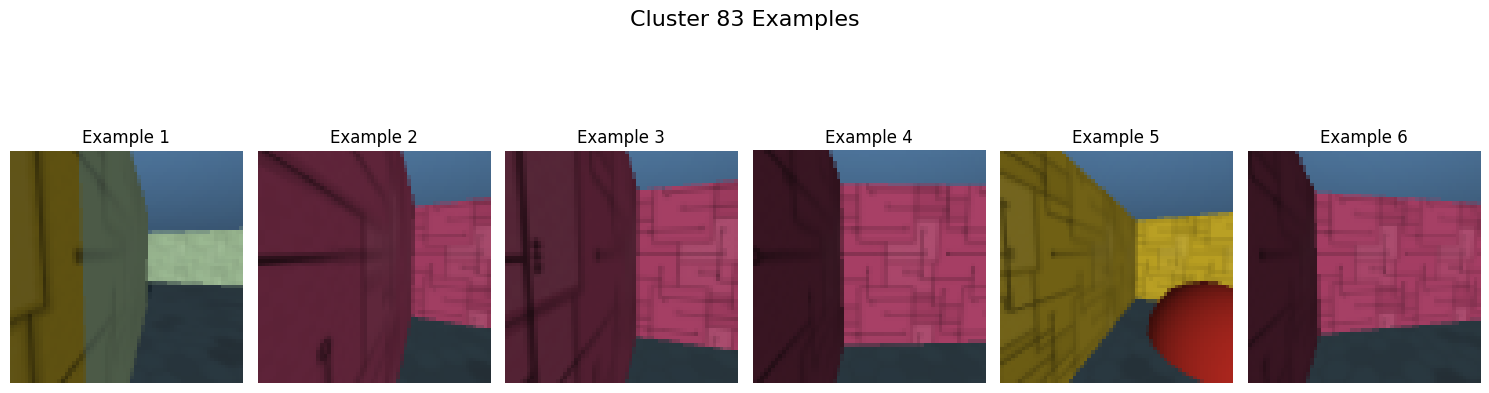

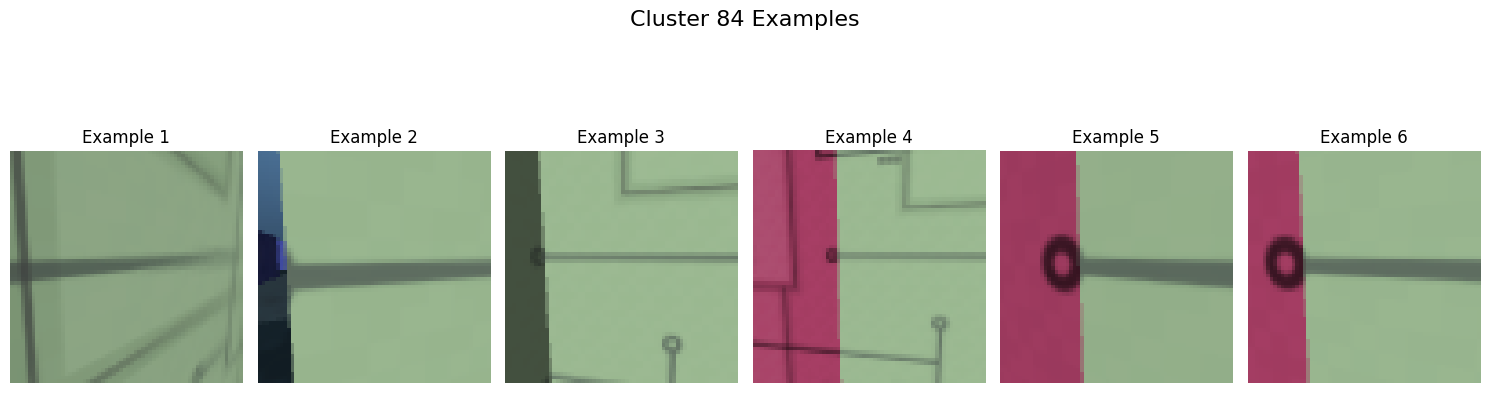

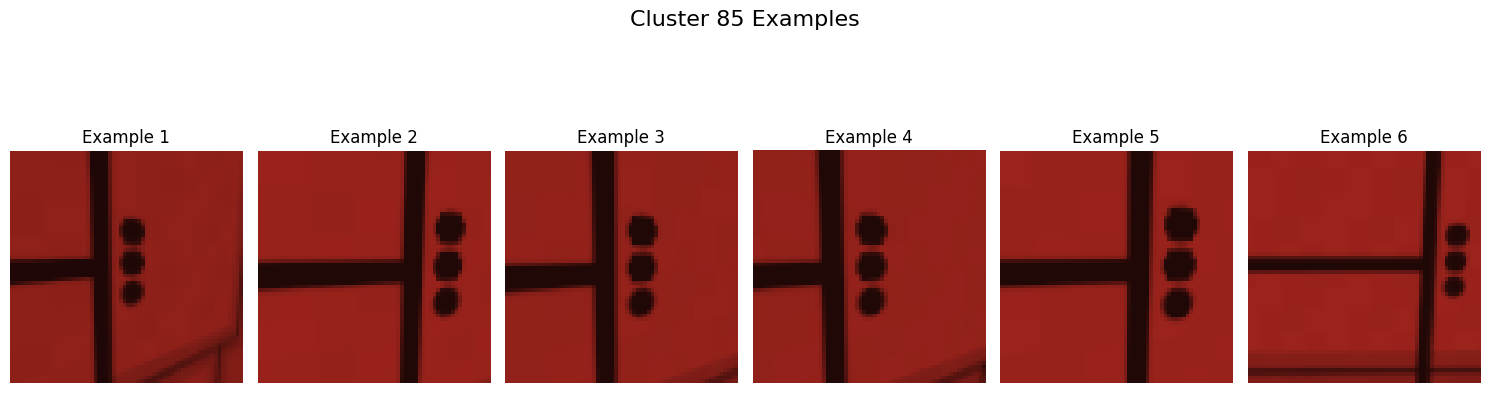

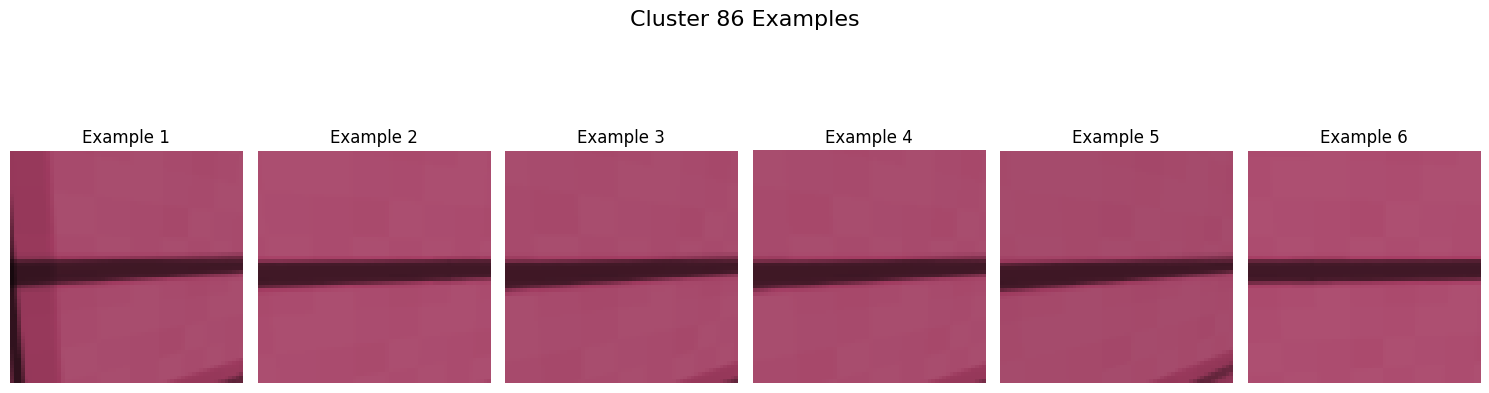

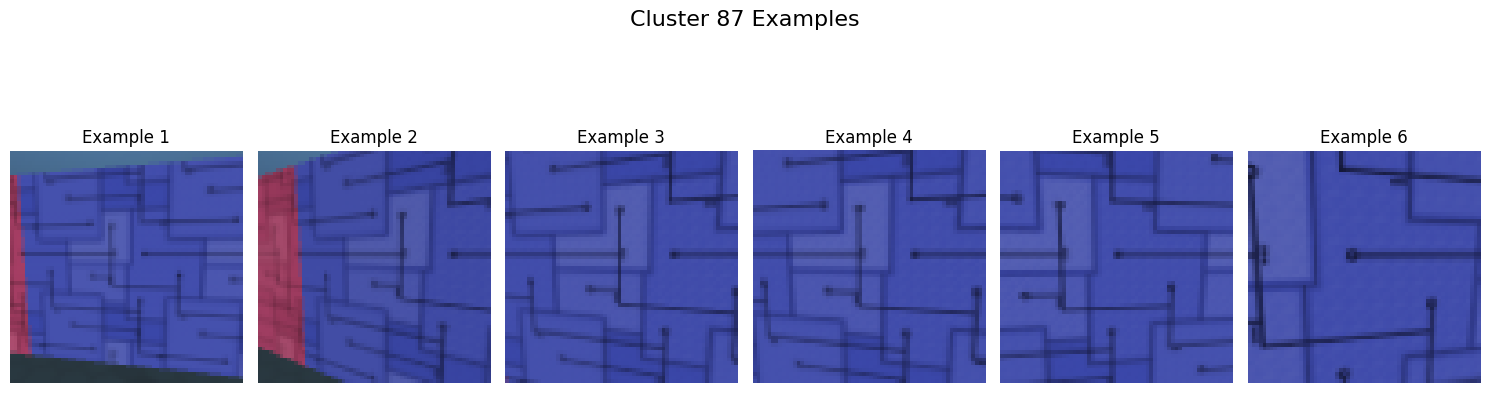

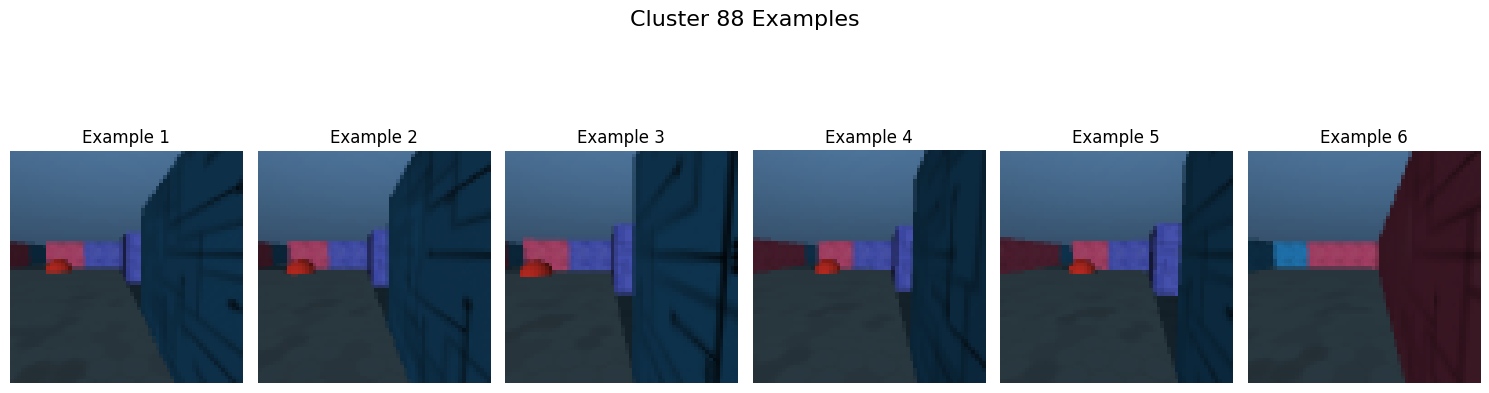

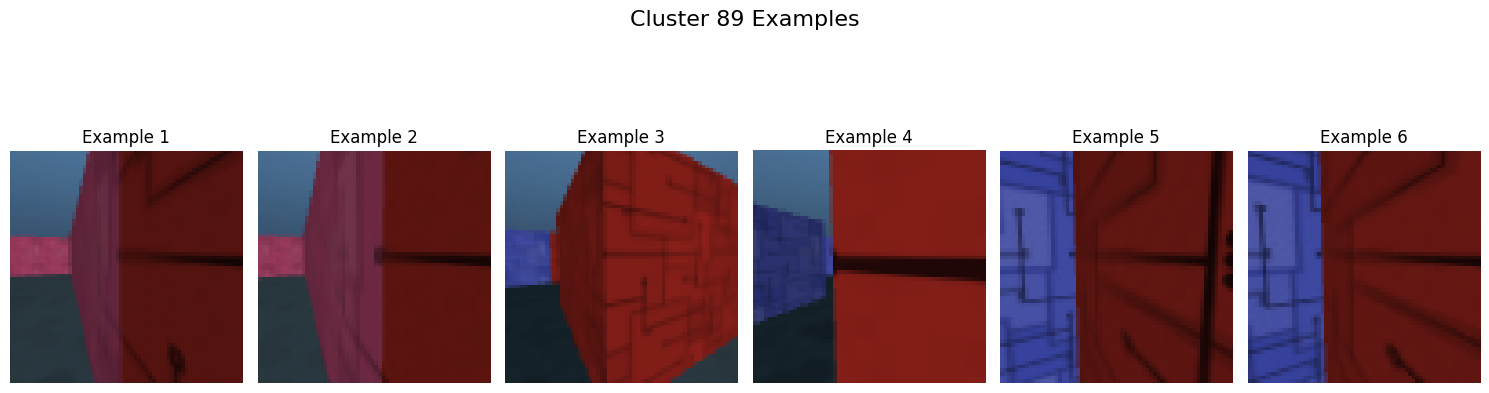

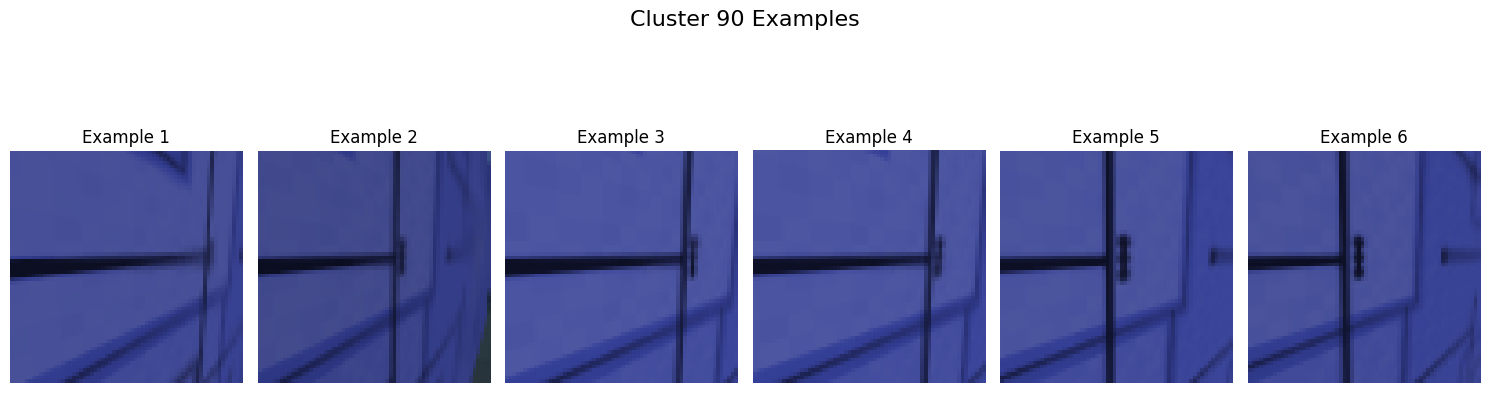

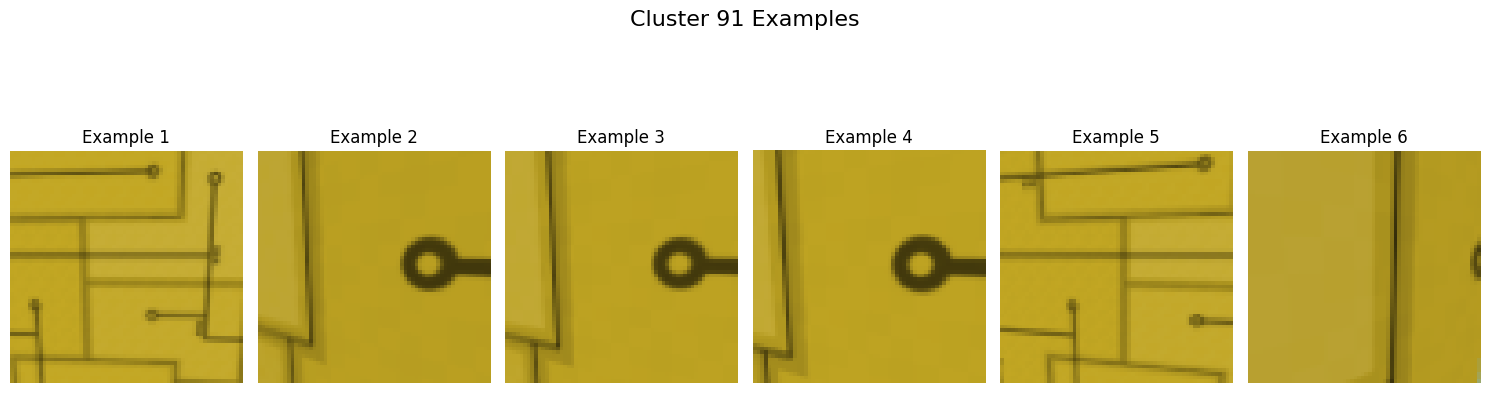

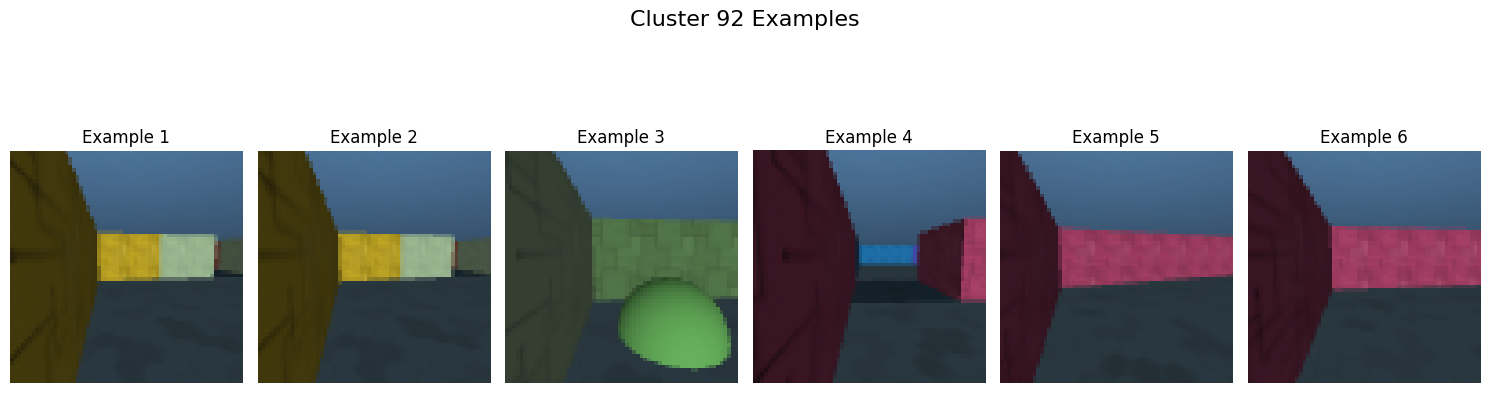

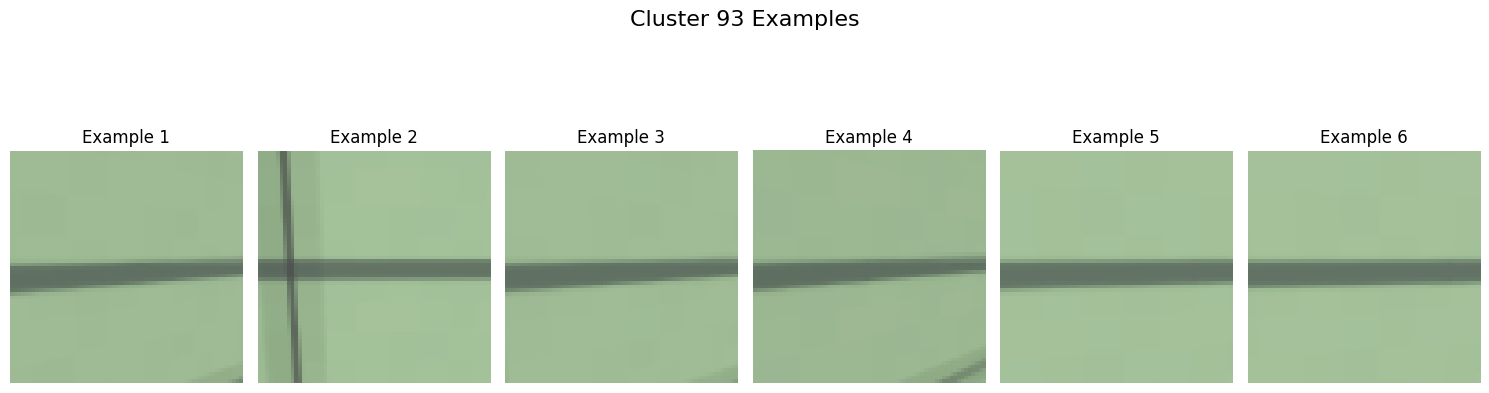

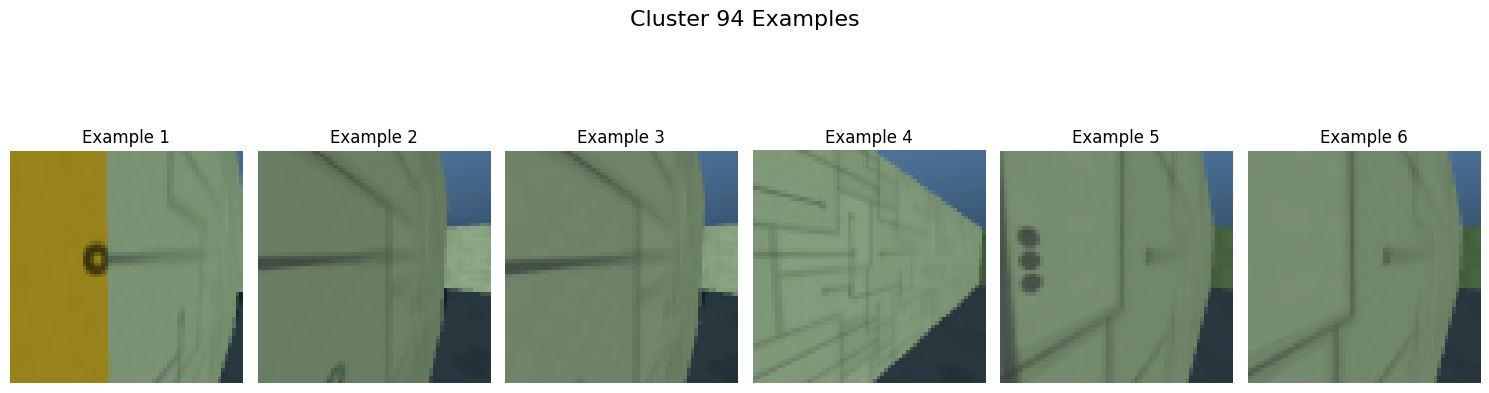

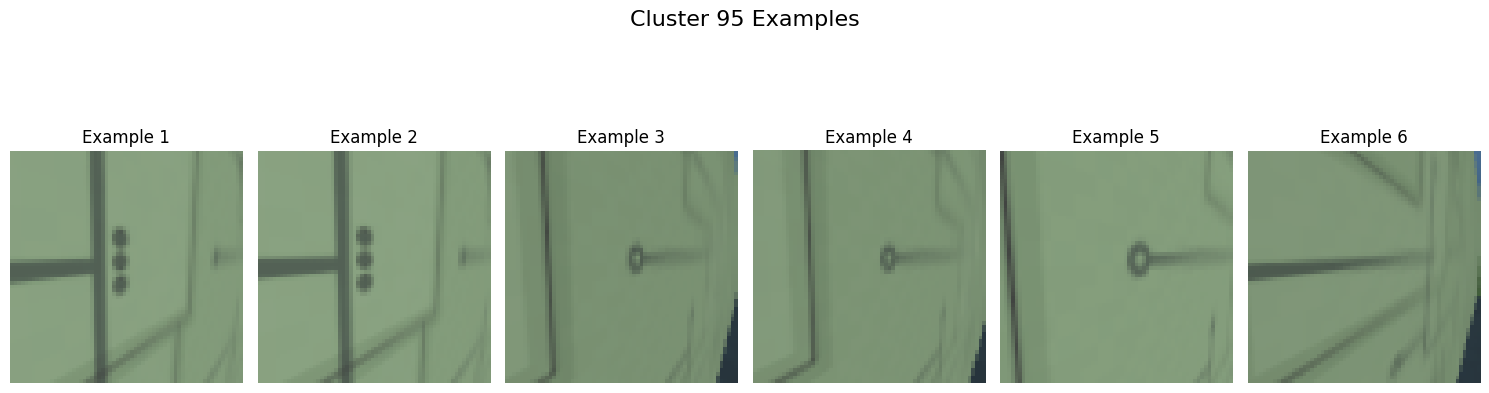

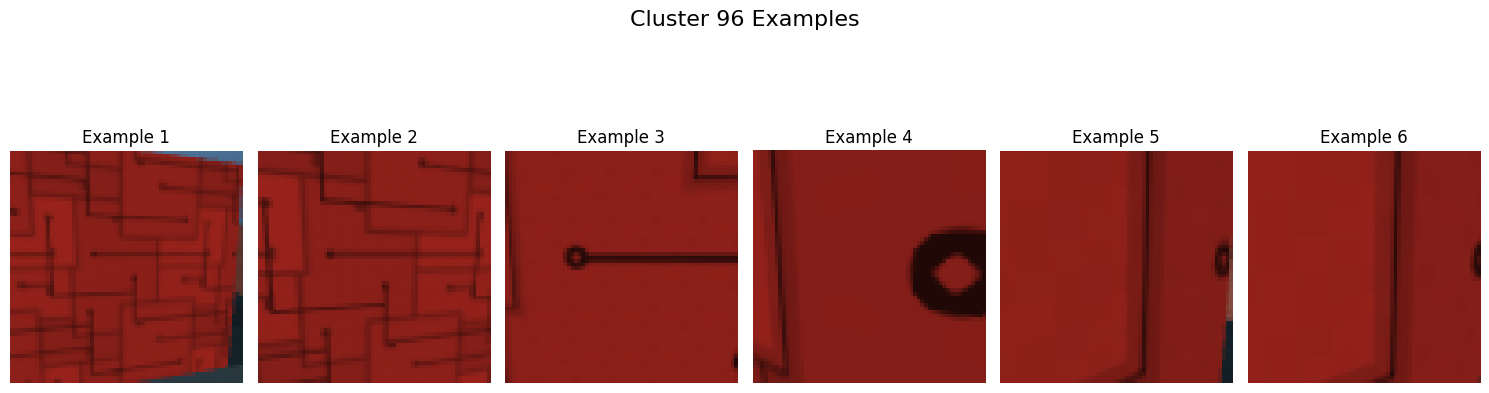

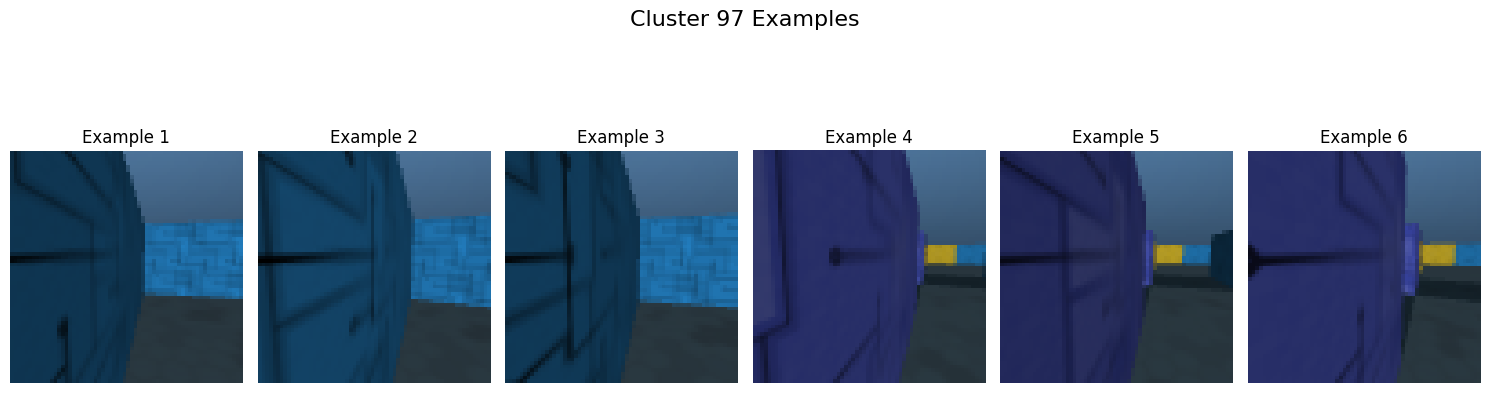

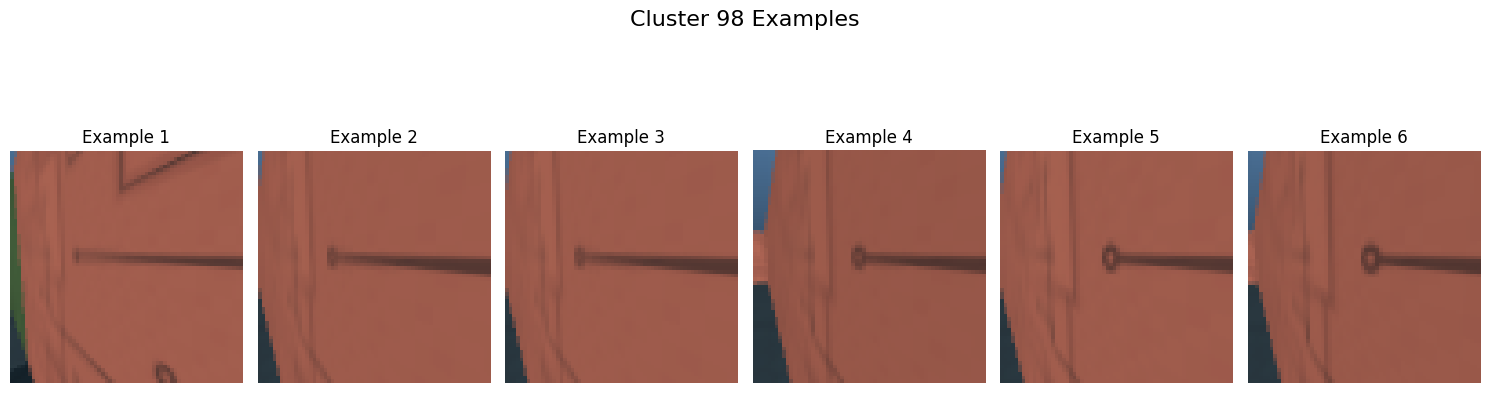

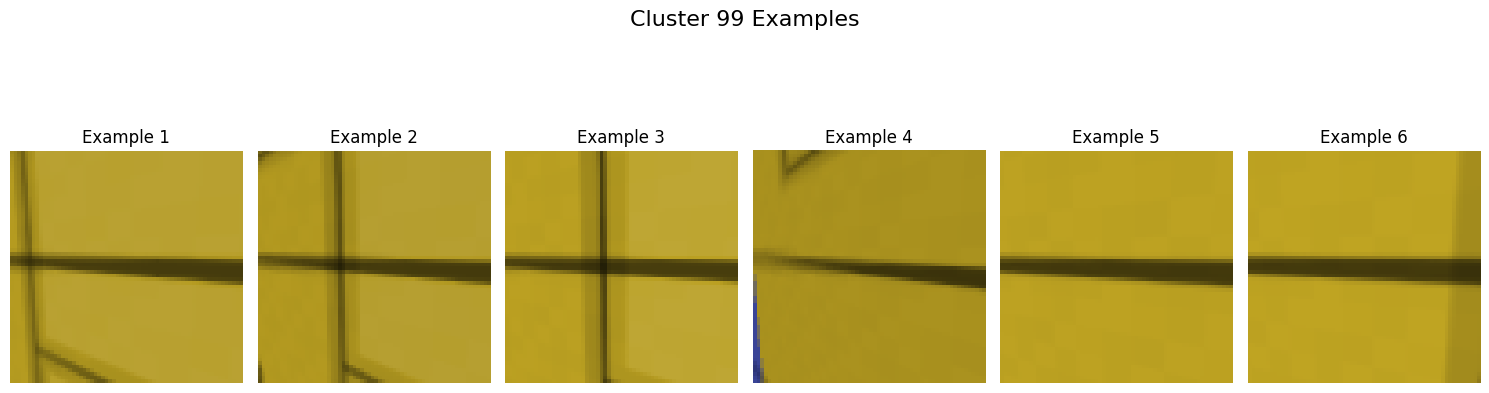

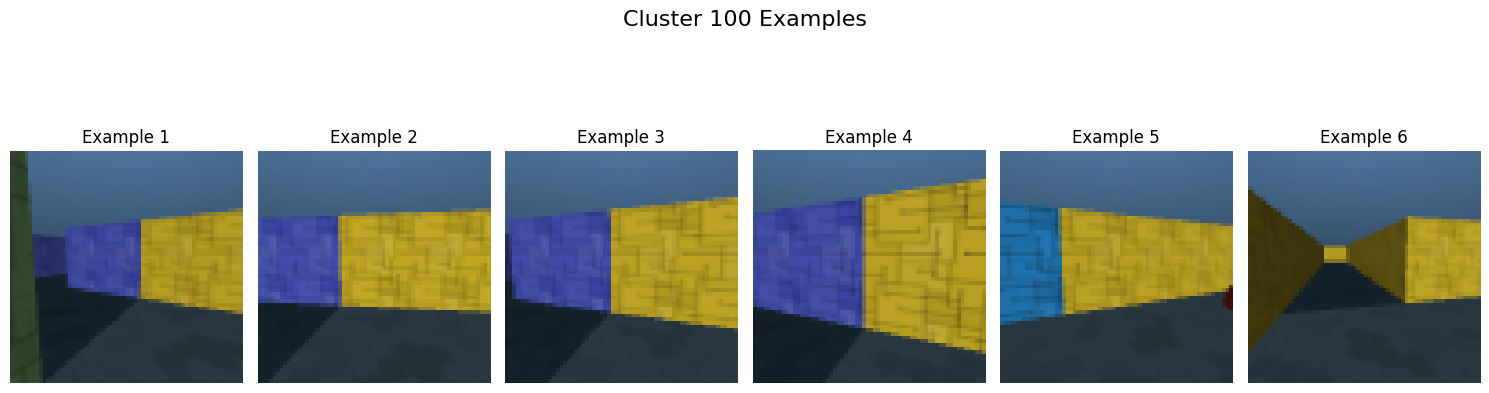

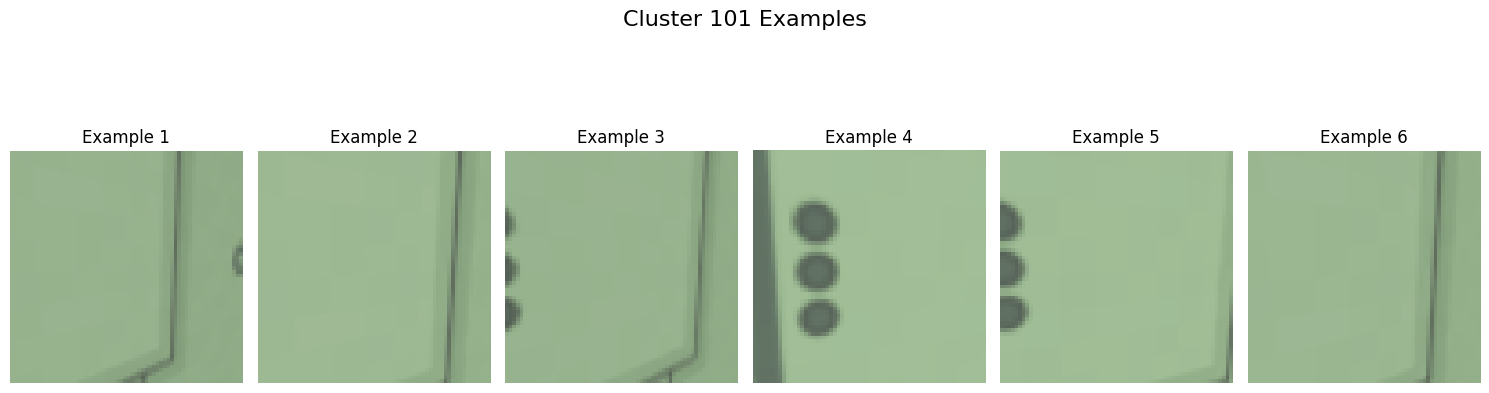

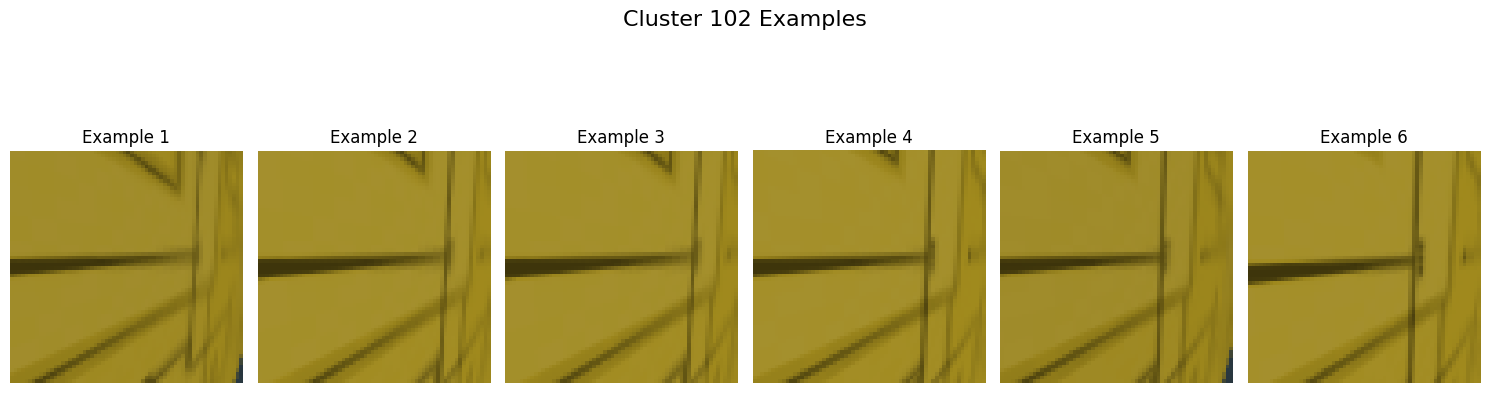

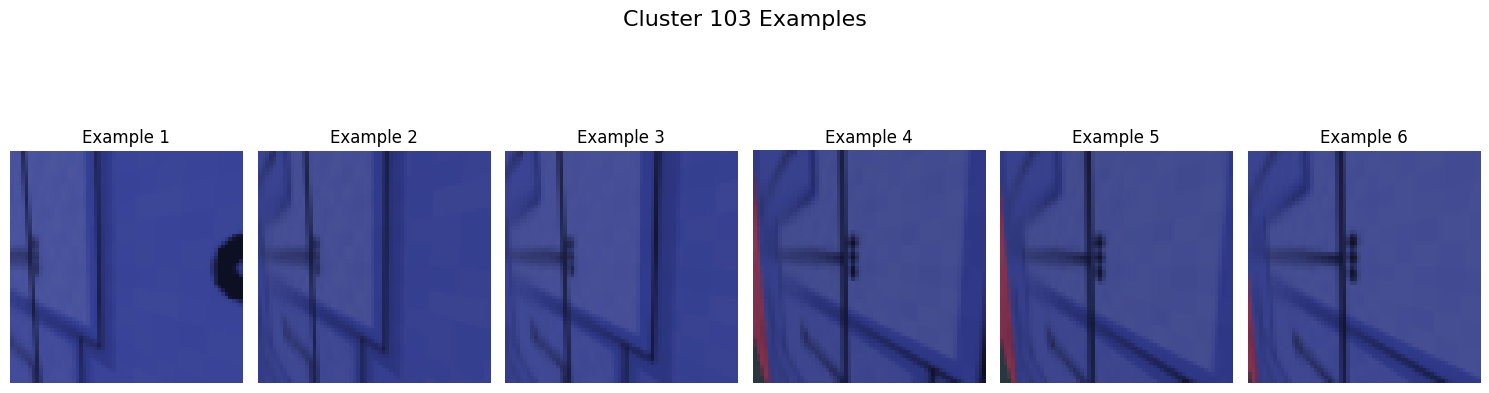

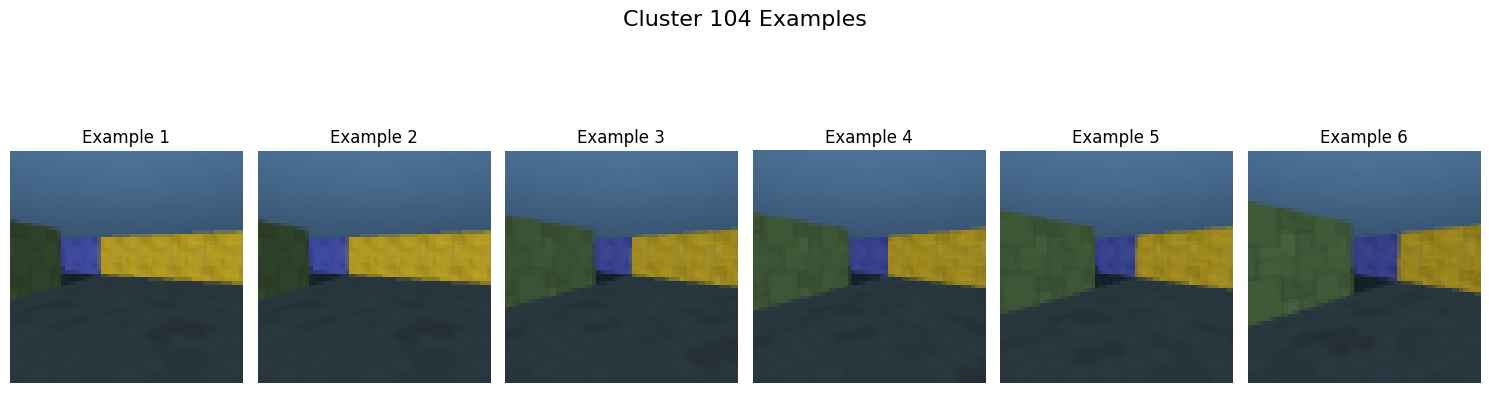

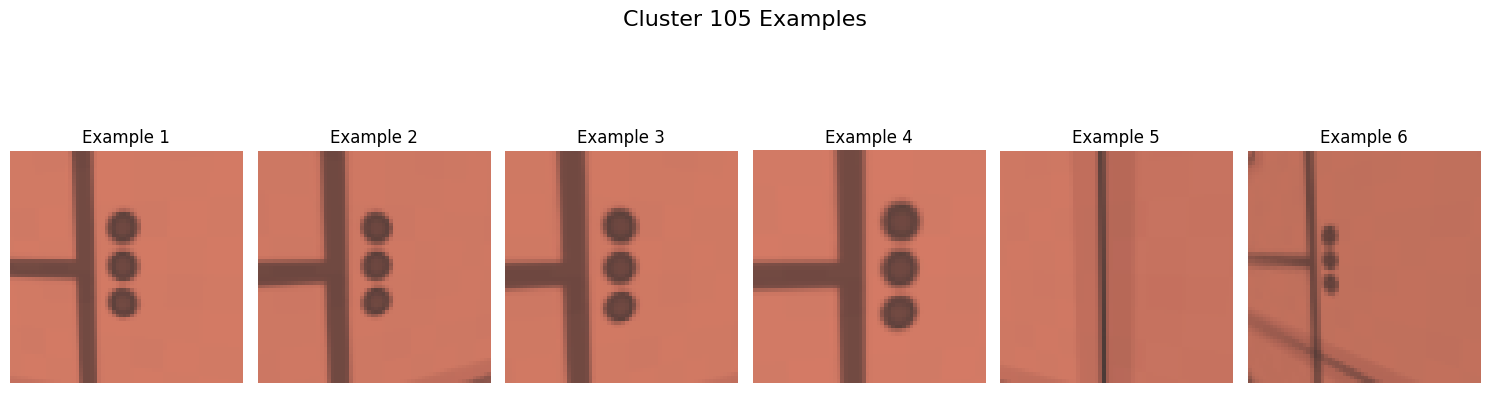

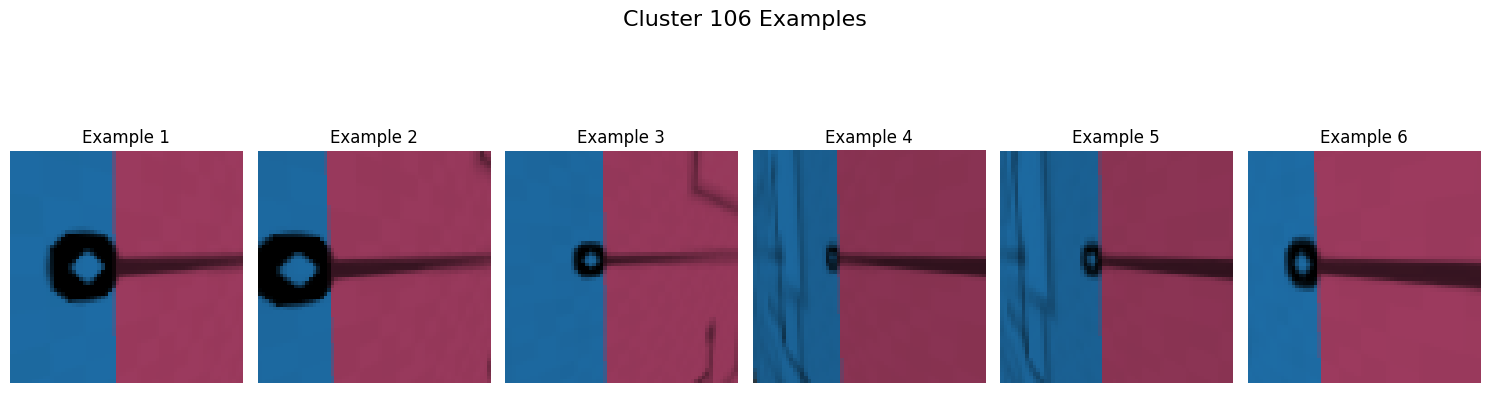

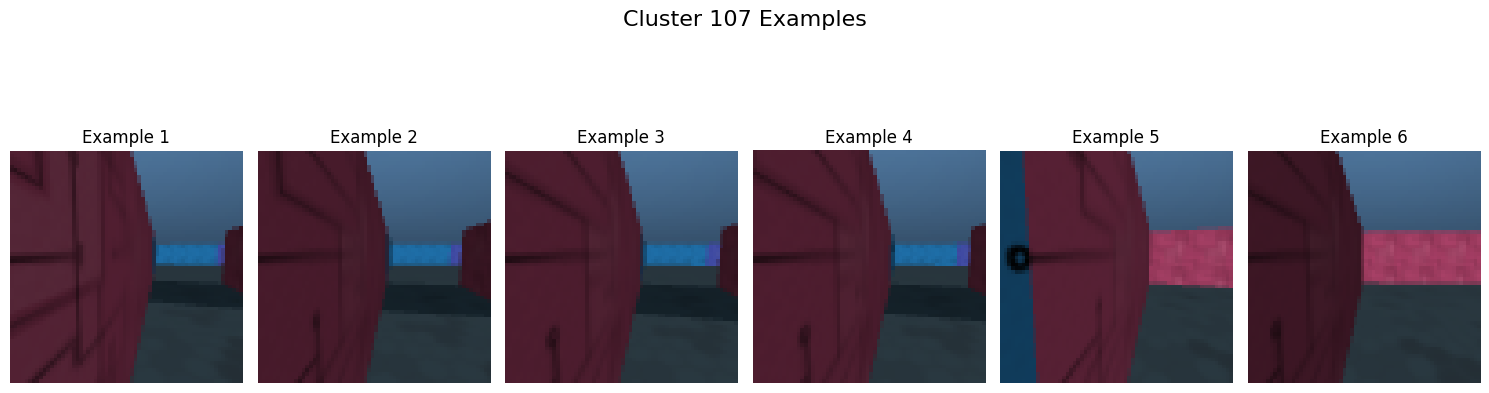

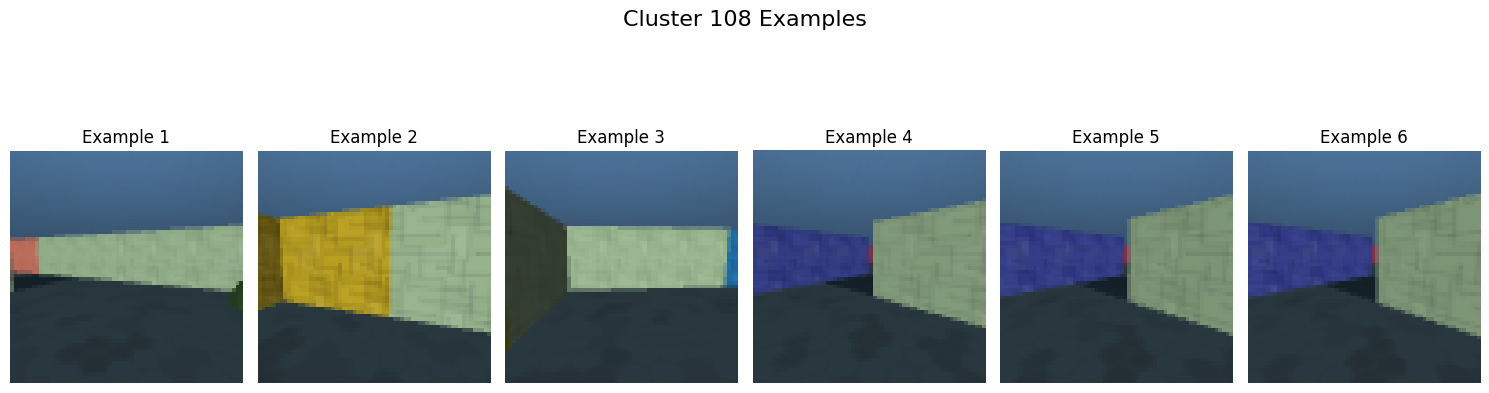

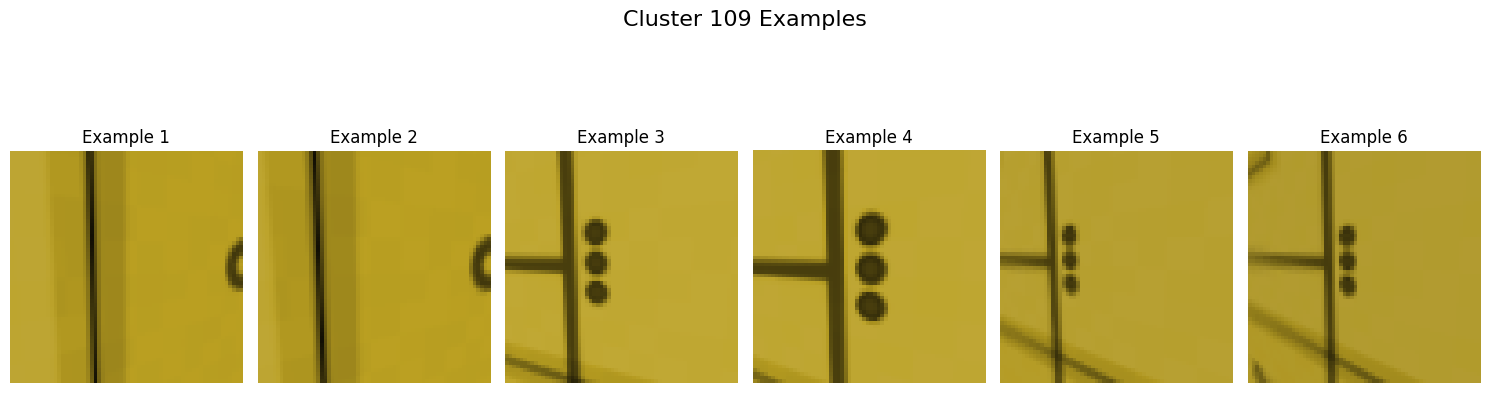

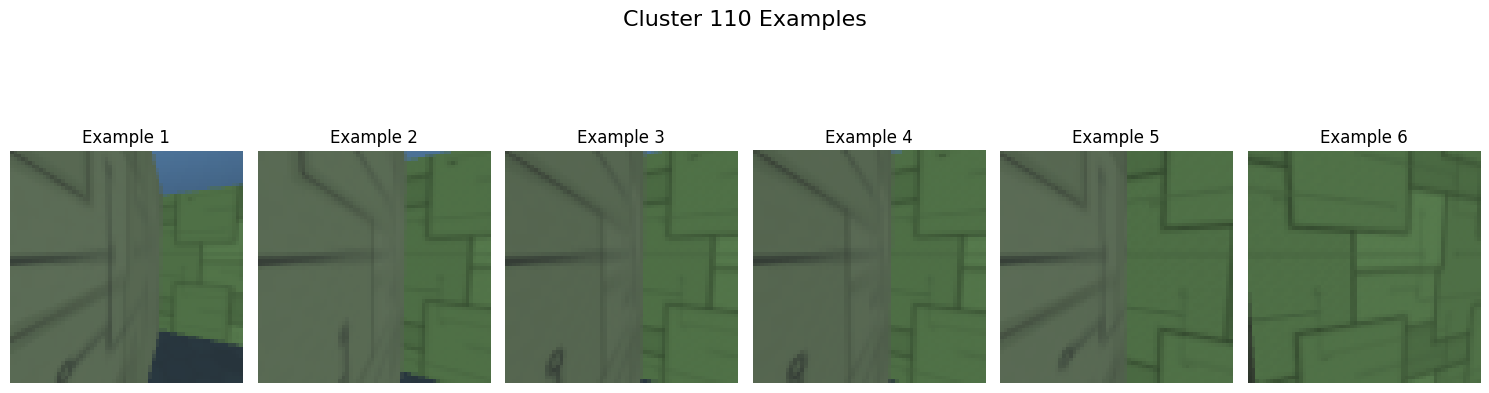

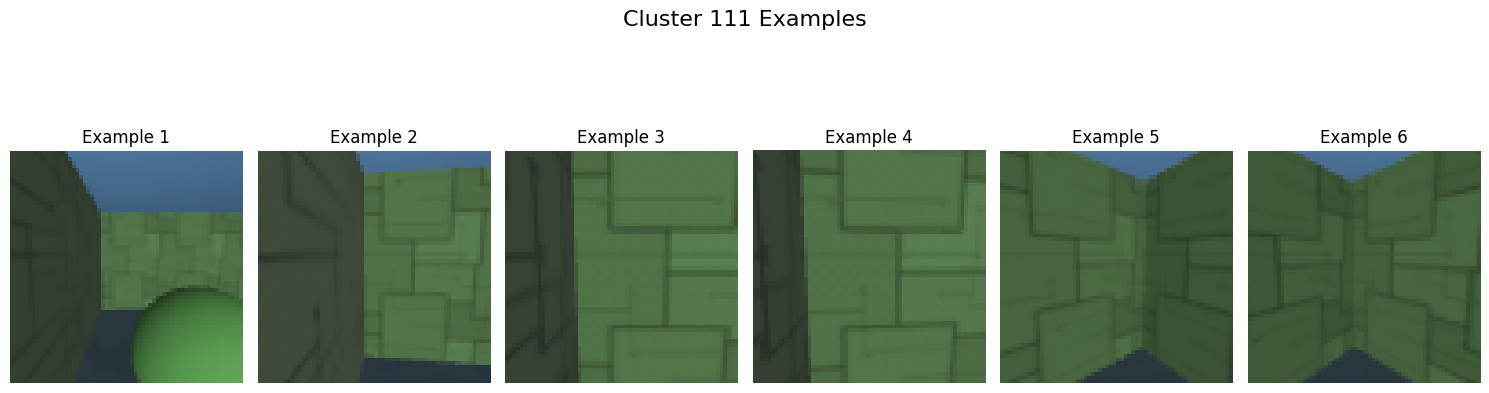

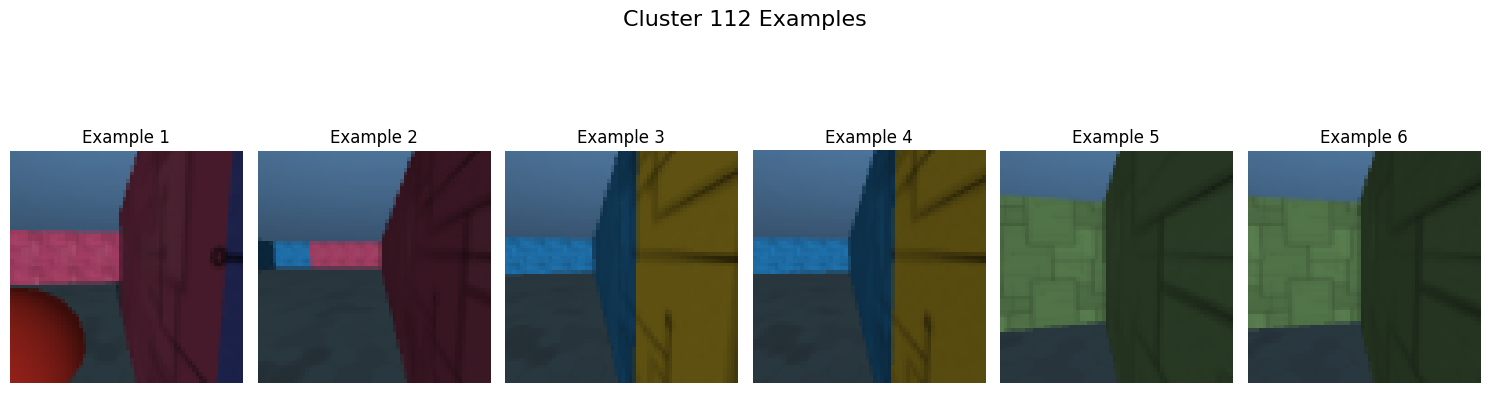

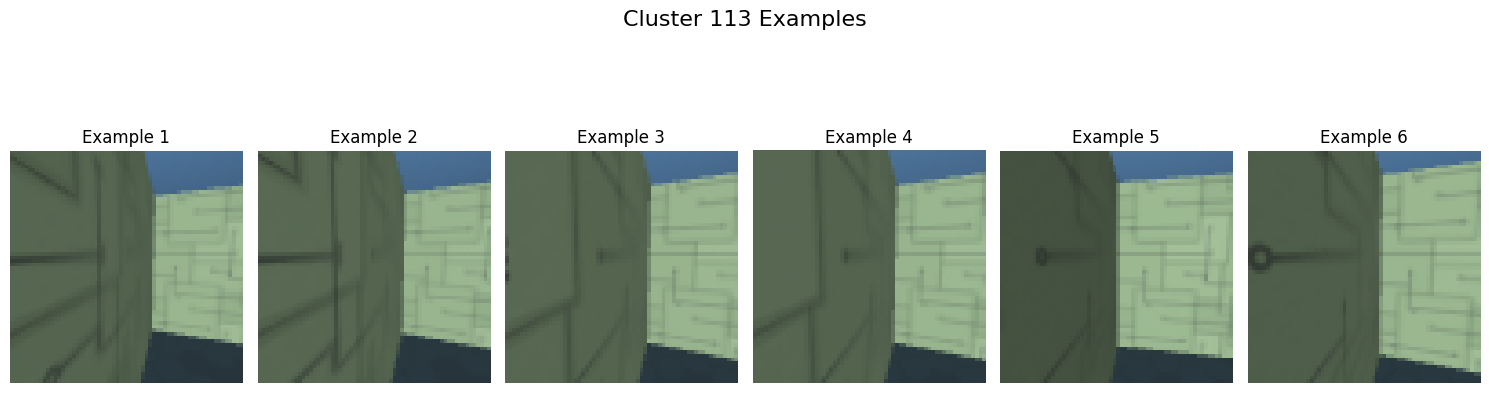

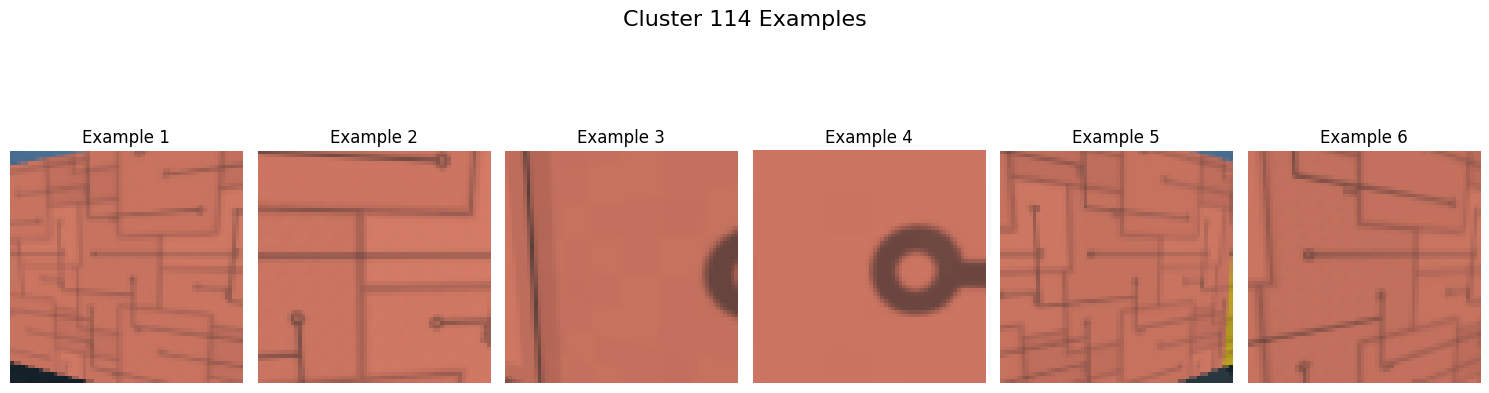

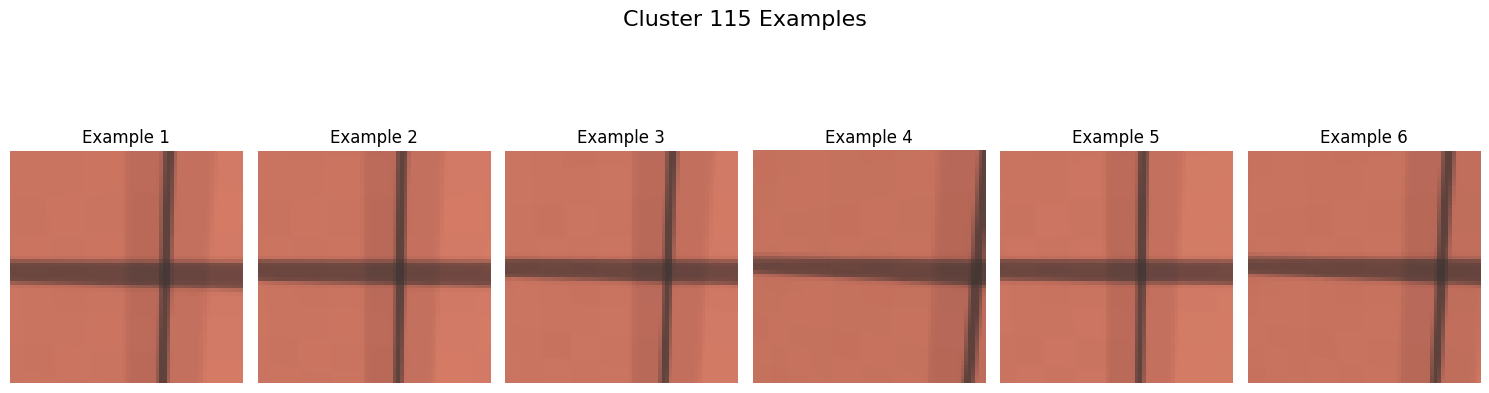

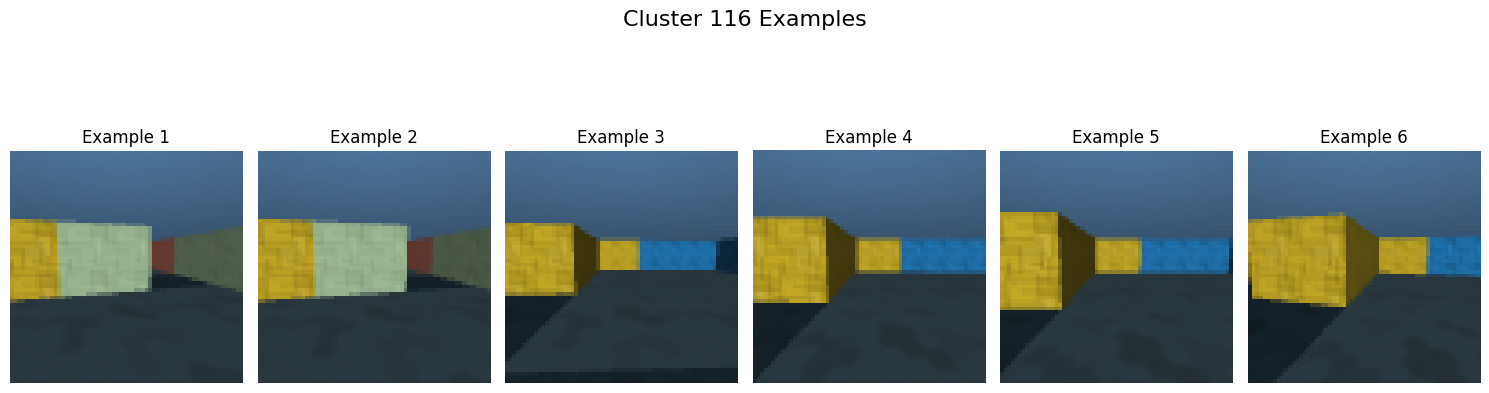

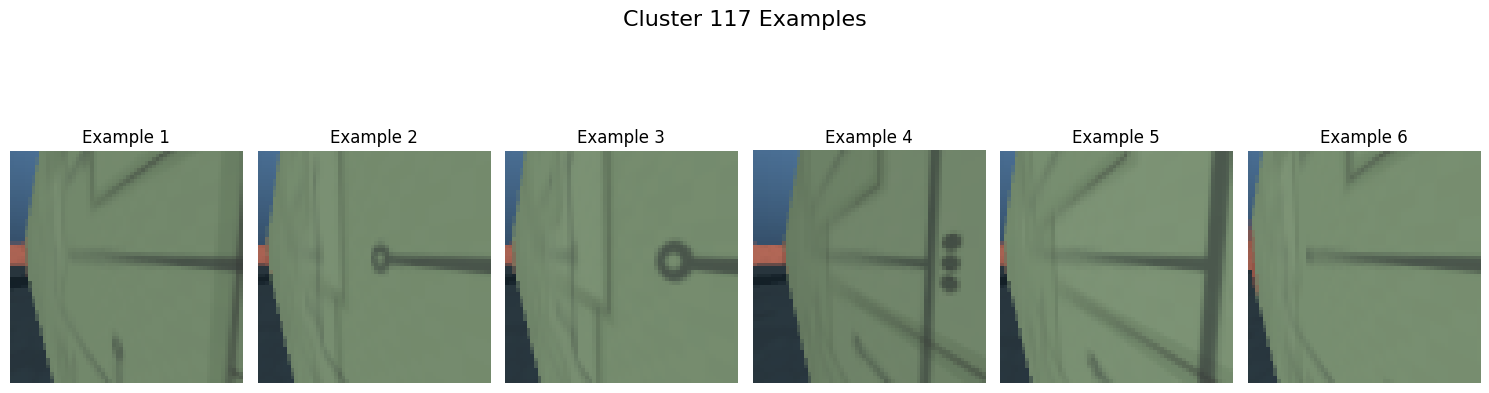

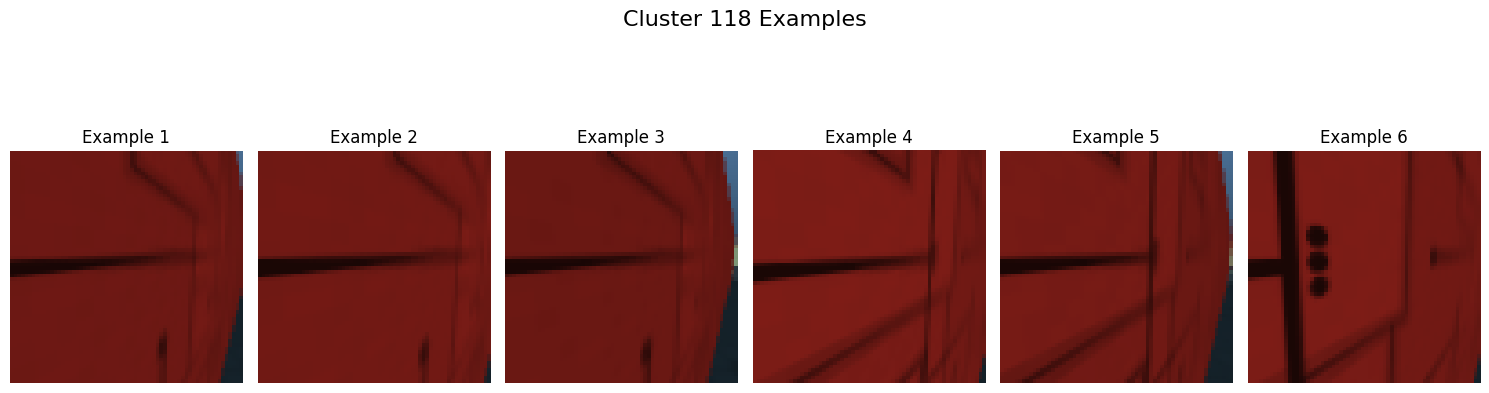

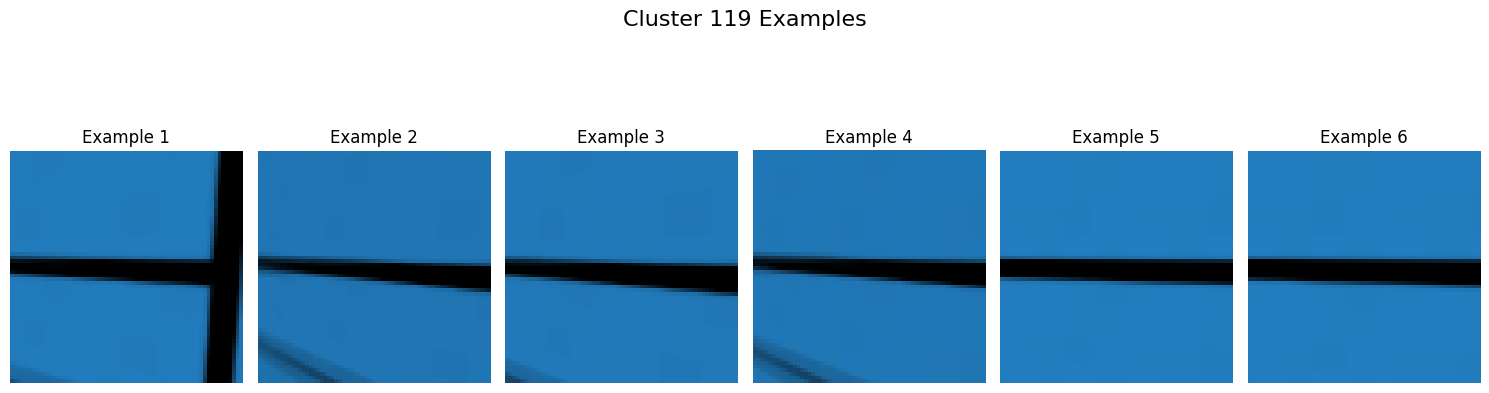

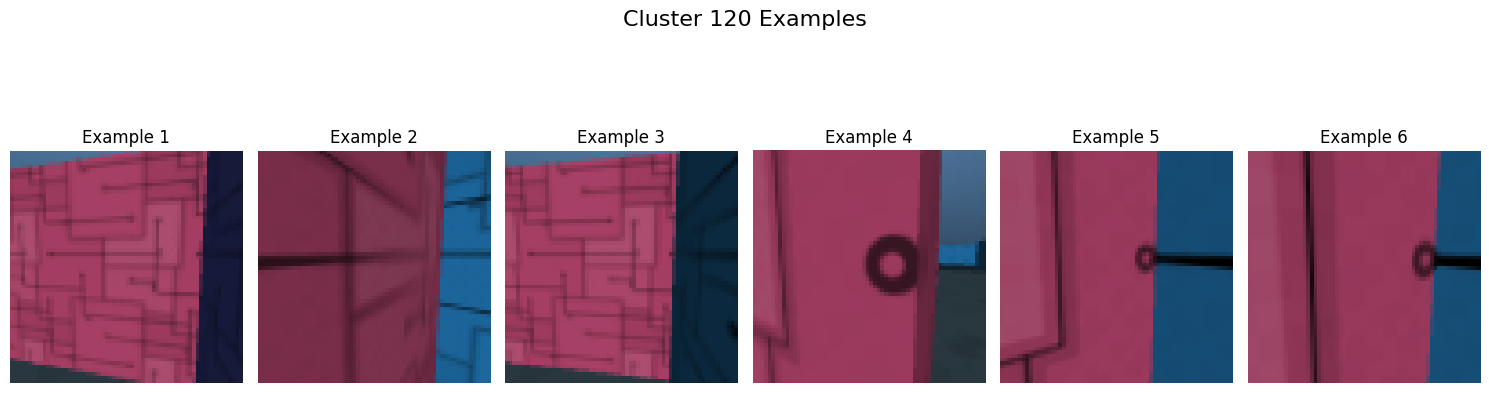

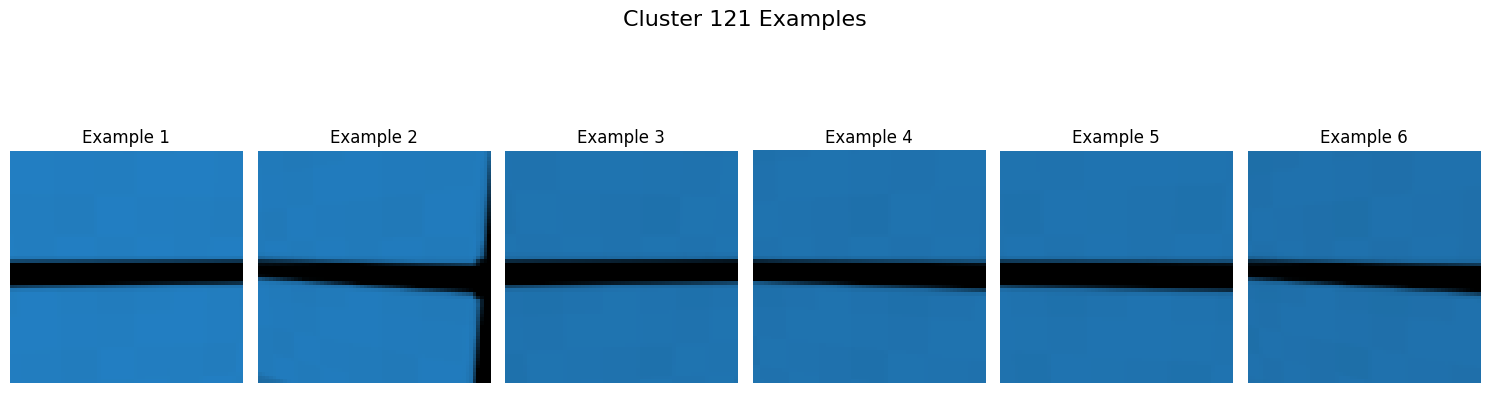

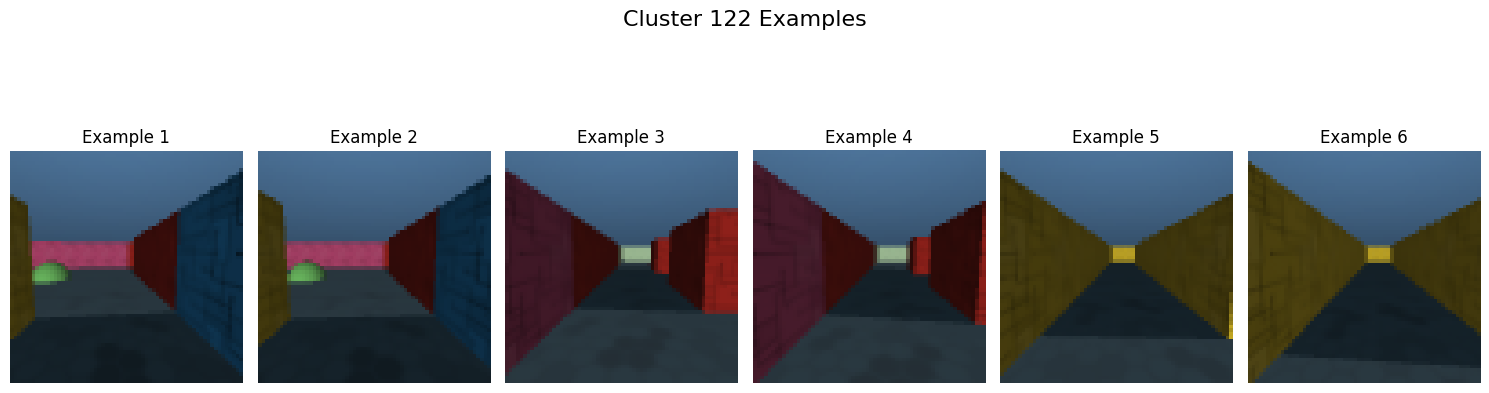

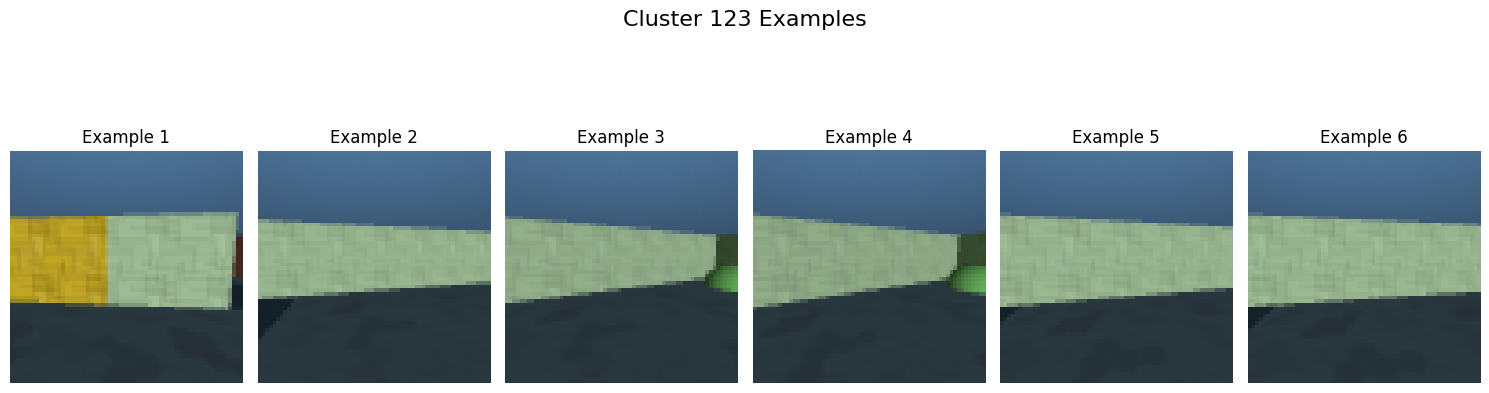

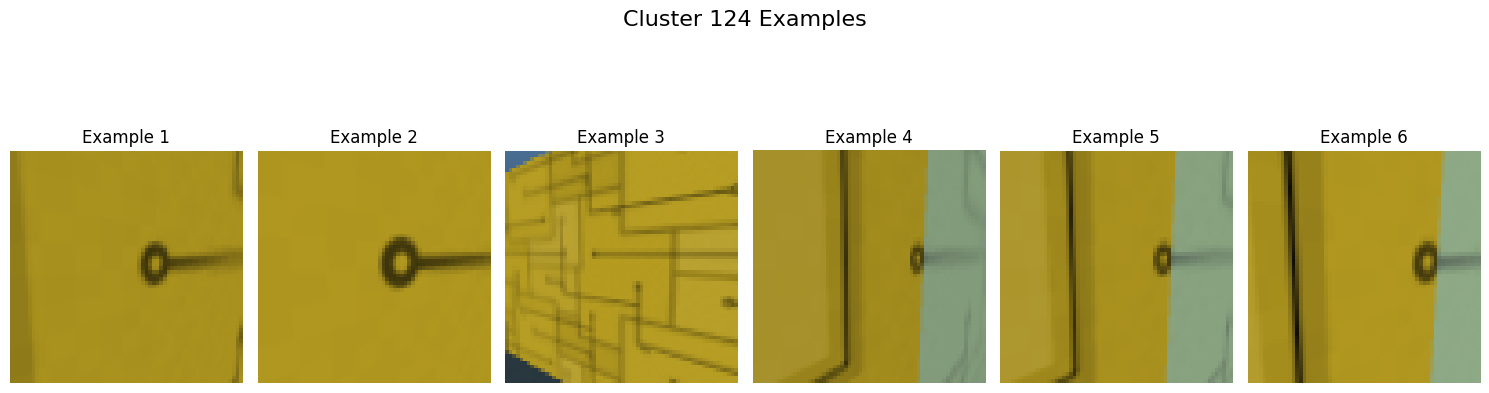

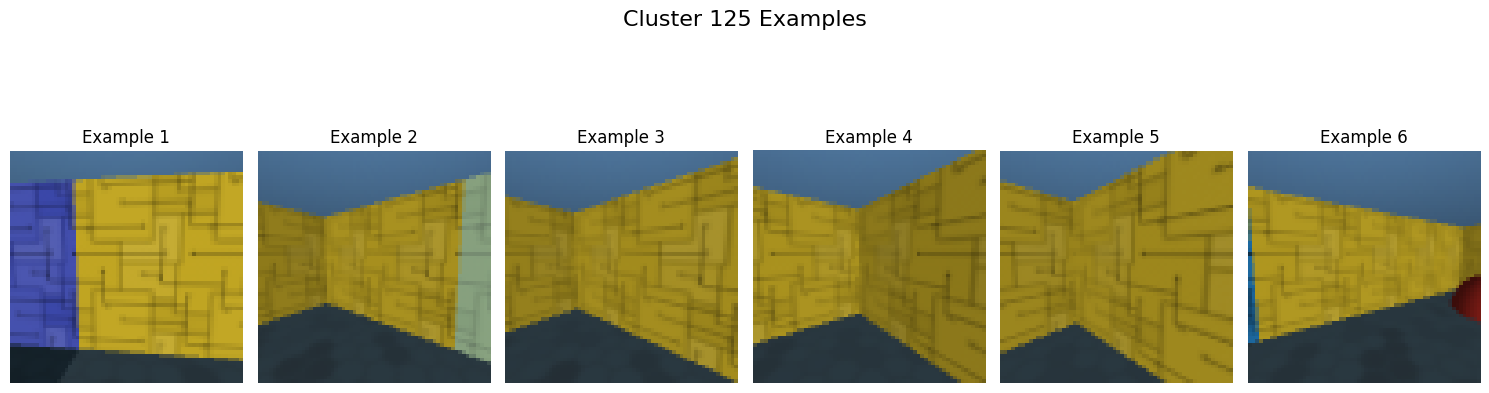

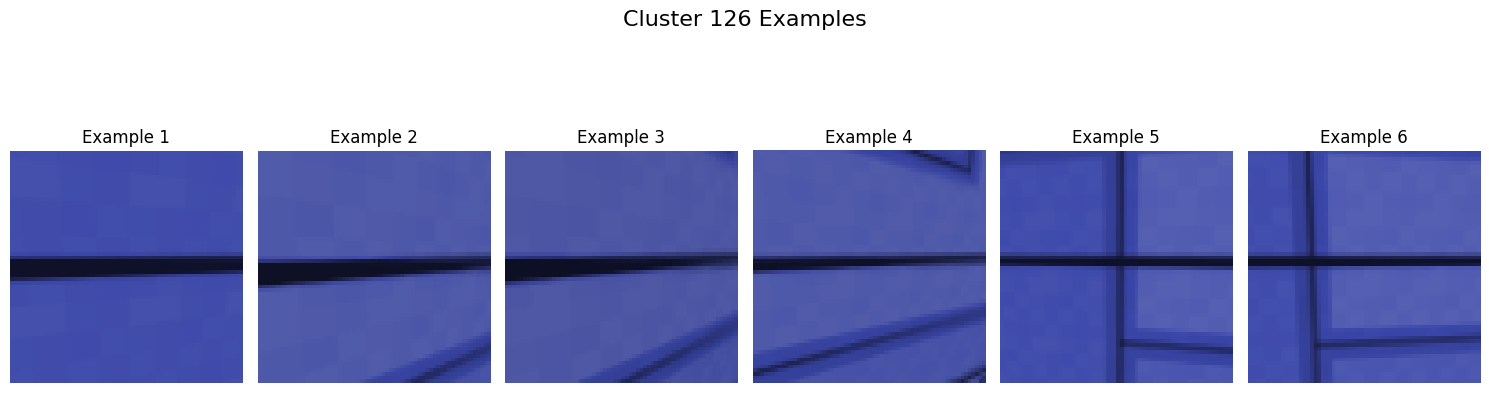

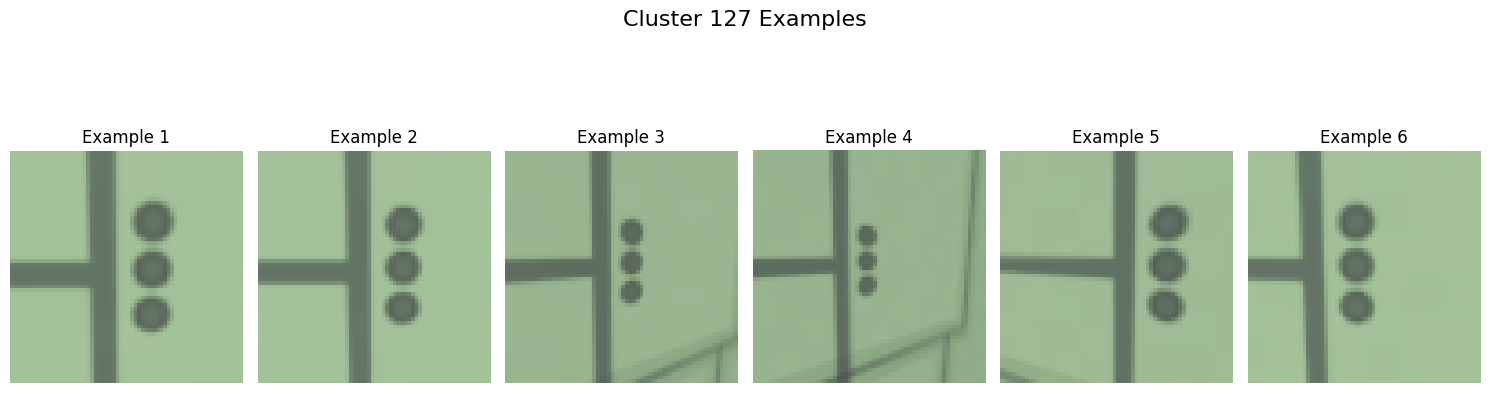

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pickle

# Load the saved data
data = np.load("../data/memory_maze_100k.npz")

# Extract the 'image' key from the data
# Assuming the shape of 'image' is (steps, height, width, channels)
images = data["image"]

# Reshape images for k-means clustering
# Flatten the height, width, and channels for clustering
flattened_images = images.reshape(images.shape[0], -1)

# Number of clusters for k-means
num_clusters = 128

# Load the model from the file
with open('kmeans_model.pkl', 'rb') as file:
    kmeans = pickle.load(file)


# Cluster labels for each observation
labels = kmeans.labels_

# Reshape each cluster center back into the original image shape
cluster_centers = kmeans.cluster_centers_
cluster_center_images = cluster_centers.reshape((num_clusters, *images.shape[1:]))

# Cast cluster centers to integers in range [0, 255]
cluster_center_images = np.clip(cluster_center_images, 0, 255).astype(np.uint8)

# Display cluster centers
rows = 16
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.ravel()

for i in range(num_clusters):
    axes[i].imshow(cluster_center_images[i])  # Cluster center image
    axes[i].set_title(f"Cluster {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Display examples for each cluster
for cluster_id in range(num_clusters):
    # Create a new figure for each cluster
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    
    # Find up to 6 examples from this cluster
    cluster_examples = np.where(labels == cluster_id)[0][:6]  # Indices of images in this cluster
    
    for i, example_idx in enumerate(cluster_examples):
        example_image = images[example_idx].astype(np.uint8)  # Cast example image to uint8
        axes[i].imshow(example_image)  # Example image
        axes[i].set_title(f"Example {i + 1}")
        axes[i].axis("off")
    
    # Hide unused axes if fewer than 6 examples are found
    for i in range(len(cluster_examples), 6):
        axes[i].axis("off")
    
    fig.suptitle(f"Cluster {cluster_id} Examples", fontsize=16)
    plt.tight_layout()
    plt.show()


# Get sequence from the single environment

## Run environment 100k steps (slower)

## Load 100k trajectory

In [3]:
import numpy as np
import pickle

# Load the saved environment data
data = np.load("../data/small_env_5_5_100k.npz")

# Extract the 'image' key from the data (assuming it exists)
images = data["image"]

# Reshape images for KMeans clustering
flattened_images = images.reshape(images.shape[0], -1)

# Load the saved KMeans model
with open('kmeans_model.pkl', 'rb') as file:
    kmeans = pickle.load(file)

# Apply the KMeans model to the observations
cluster_indices = kmeans.predict(flattened_images)

# Save the cluster index sequence to a file
np.save("../data/cluster_indices_100k.npy", cluster_indices)

print("Cluster index sequence saved to ../data/cluster_indices_100k.npy")

Cluster index sequence saved to ../data/cluster_indices_100k.npy


In [4]:
cluster_indices

array([79, 79, 79, ..., 79, 79, 79], dtype=int32)

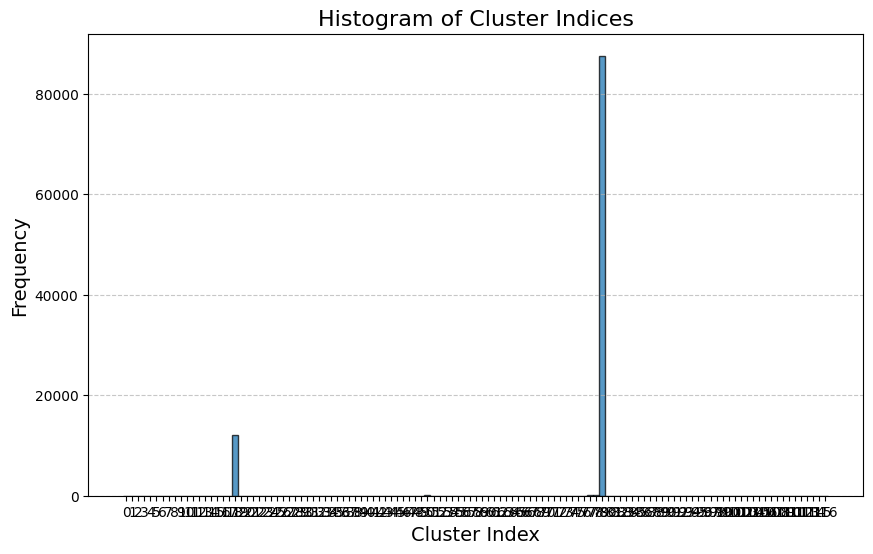

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the cluster indices
cluster_indices = np.load("../data/cluster_indices_100k.npy")

# Plot the histogram of cluster indices
plt.figure(figsize=(10, 6))
plt.hist(cluster_indices, bins=np.arange(cluster_indices.max() + 2) - 0.5, edgecolor='black', alpha=0.75)
plt.title("Histogram of Cluster Indices", fontsize=16)
plt.xlabel("Cluster Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(cluster_indices.max() + 1))  # Display all cluster indices
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

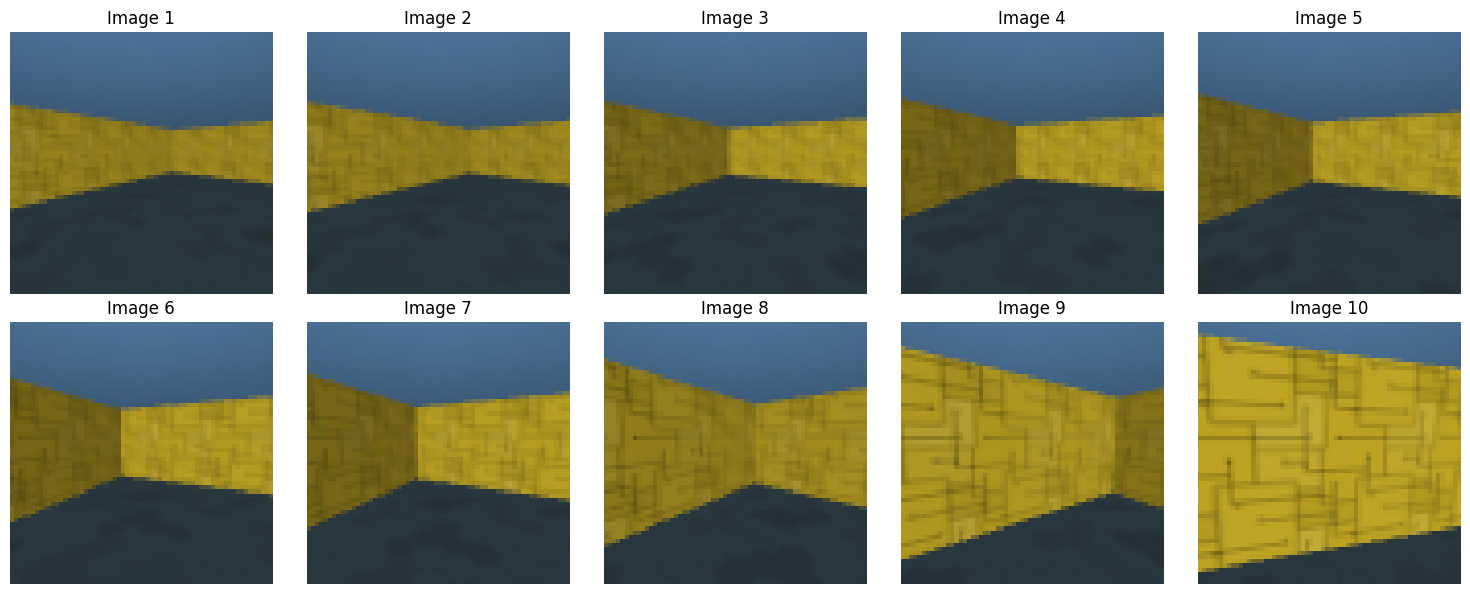

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved data
data = np.load("../data/single_env_100k.npz")

# Extract the 'image' key from the data
images = data["image"]

# Plot the first 10 images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
    plt.imshow(images[i], cmap='gray')  # Use 'gray' for grayscale images
    plt.title(f"Image {i+1}")
    plt.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

In [7]:
print([k for k in data.keys()])

['image', 'target_color', 'top_image', 'agent_pos', 'agent_dir', 'targets_vec', 'targets_pos', 'target_vec', 'target_pos', 'maze_layout', 'actions']


In [8]:
data['maze_layout'][0]

array([[0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0]], dtype=uint8)

In [9]:
data = np.load("../data/small_env_5_5_100k.npz")

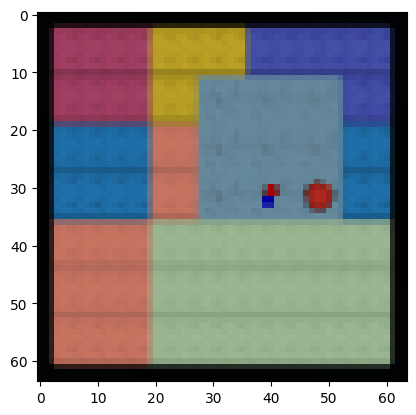

In [10]:
plt.imshow(data['top_image'][0])

In [11]:
data['agent_pos']

array([[3.5       , 2.5       ],
       [3.39566292, 2.53713255],
       [3.18531896, 2.58968144],
       ...,
       [2.0844277 , 4.91306134],
       [2.08429948, 4.91294734],
       [2.08440154, 4.9130298 ]])

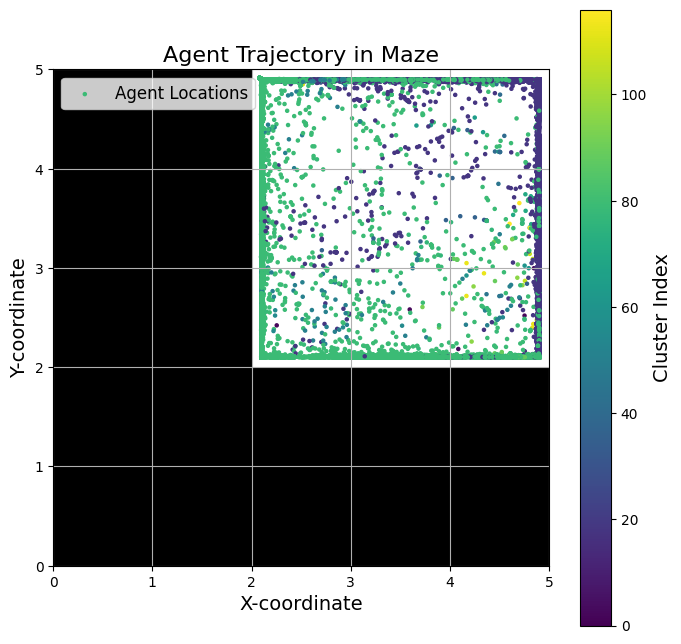

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Maze layout
maze = data['maze_layout'][0]


# Agent trajectory (sample data)
agent_locations = data['agent_pos']

# Plot the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap="gray", origin="lower", extent=(0, maze.shape[1], 0, maze.shape[0]))

# Plot the agent's trajectory
# plt.plot(agent_locations[:, 0], agent_locations[:, 1], color="white", linewidth=.5, label="Agent Trajectory")
# Overlay the agent's trajectory with cluster indices as colored circles
sc = plt.scatter(agent_locations[:, 0], agent_locations[:, 1], c=cluster_indices, cmap="viridis", s=5, label="Agent Locations")

# Add a colorbar to show cluster indices
cbar = plt.colorbar(sc)
cbar.set_label("Cluster Index", fontsize=14)

# Add labels and legend
plt.title("Agent Trajectory in Maze", fontsize=16)
plt.xlabel("X-coordinate", fontsize=14)
plt.ylabel("Y-coordinate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

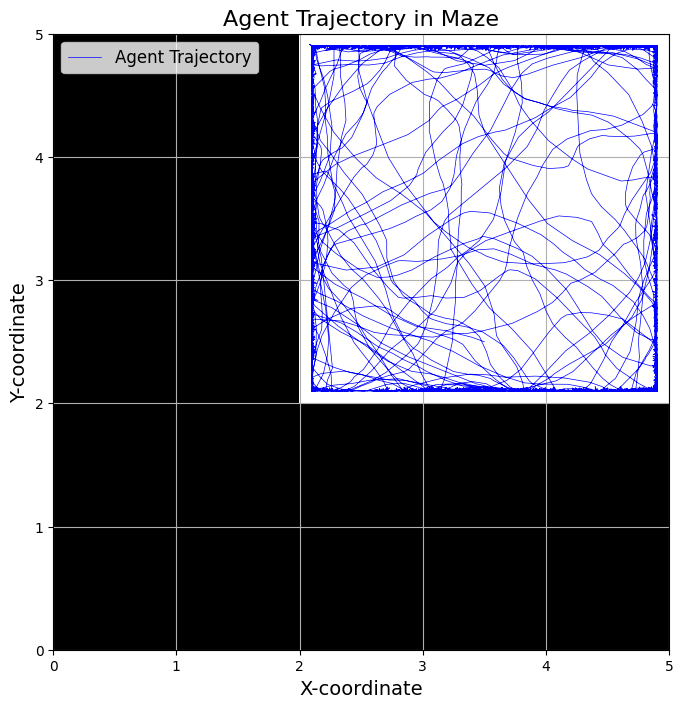

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Maze layout
maze = data['maze_layout'][0]


# Agent trajectory (sample data)
agent_locations = data['agent_pos']

# Plot the maze
plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap="gray", origin="lower", extent=(0, maze.shape[1], 0, maze.shape[0]))

# Plot the agent's trajectory
plt.plot(agent_locations[:, 0], agent_locations[:, 1], color="blue", linewidth=.5, label="Agent Trajectory")
# Overlay the agent's trajectory with cluster indices as colored circles
# sc = plt.scatter(agent_locations[:, 0], agent_locations[:, 1], c=cluster_indices, cmap="viridis", s=5, label="Agent Locations")

# Add a colorbar to show cluster indices
# cbar = plt.colorbar(sc)
# cbar.set_label("Cluster Index", fontsize=14)

# Add labels and legend
plt.title("Agent Trajectory in Maze", fontsize=16)
plt.xlabel("X-coordinate", fontsize=14)
plt.ylabel("Y-coordinate", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [14]:
%gui qt6

import napari

In [15]:
# viewer = napari.view_image(data['top_image'])

In [16]:
import sys
from pathlib import Path

# Add the parent directory to sys.path
parent_directory = Path.cwd().parent
sys.path.append(str(parent_directory))

# Import the module


In [17]:
import numpy as np
from chmm_actions import CHMM, forwardE, datagen_structured_obs_room
import matplotlib.pyplot as plt

import igraph
from matplotlib import cm, colors
import os

custom_colors = (
    np.array(
        [
            [214, 214, 214],
            [85, 35, 157],
            [253, 252, 144],
            [114, 245, 144],
            [151, 38, 20],
            [239, 142, 192],
            [214, 134, 48],
            [140, 194, 250],
            [72, 160, 162],
        ]
    )
    / 256
)
if not os.path.exists("figures"):
    os.makedirs("figures")


In [18]:
def plot_graph(
    chmm, x, a, output_file, cmap=cm.Spectral, multiple_episodes=False, vertex_size=10
):
    states = chmm.decode(x, a)[1]

    v = np.unique(states)
    if multiple_episodes:
        T = chmm.C[:, v][:, :, v][:-1, 1:, 1:]
        v = v[1:]
    else:
        T = chmm.C[:, v][:, :, v]
    A = T.sum(0)
    A /= A.sum(1, keepdims=True)

    g = igraph.Graph.Adjacency((A > 0).tolist())
    node_labels = np.arange(x.max() + 1).repeat(n_clones)[v]
    if multiple_episodes:
        node_labels -= 1
    colors = [cmap(nl)[:3] for nl in node_labels / node_labels.max()]
    out = igraph.plot(
        g,
        output_file,
        layout=g.layout("kamada_kawai"),
        vertex_color=colors,
        vertex_label=v,
        vertex_size=vertex_size,
        margin=50,
    )

    return out


def get_mess_fwd(chmm, x, pseudocount=0.0, pseudocount_E=0.0):
    n_clones = chmm.n_clones
    E = np.zeros((n_clones.sum(), len(n_clones)))
    last = 0
    for c in range(len(n_clones)):
        E[last : last + n_clones[c], c] = 1
        last += n_clones[c]
    E += pseudocount_E
    norm = E.sum(1, keepdims=True)
    norm[norm == 0] = 1
    E /= norm
    T = chmm.C + pseudocount
    norm = T.sum(2, keepdims=True)
    norm[norm == 0] = 1
    T /= norm
    T = T.mean(0, keepdims=True)
    log2_lik, mess_fwd = forwardE(
        T.transpose(0, 2, 1), E, chmm.Pi_x, chmm.n_clones, x, x * 0, store_messages=True
    )
    return mess_fwd


def place_field(mess_fwd, rc, clone):
    assert mess_fwd.shape[0] == rc.shape[0] and clone < mess_fwd.shape[1]
    field = np.zeros(rc.max(0) + 1)
    count = np.zeros(rc.max(0) + 1, int)
    for t in range(mess_fwd.shape[0]):
        r, c = rc[t]
        field[r, c] += mess_fwd[t, clone]
        count[r, c] += 1
    count[count == 0] = 1
    return field / count


In [19]:
data['actions'].shape

(100000,)

In [20]:
cluster_indices.max()

np.int32(116)

In [21]:
n_emissions = cluster_indices.max() + 1

# Calculate unique values and their counts
unique_values, counts = np.unique(cluster_indices, return_counts=True)

n_clones = np.ones(n_emissions, dtype=np.int64) * 70

x = cluster_indices.astype(np.int64)
a = data['actions'].astype(np.int64)


In [22]:
counts.max()

np.int64(87524)

In [23]:
chmm = CHMM(n_clones=n_clones, pseudocount=2e-3, x=x, a=a, seed=42)

Average number of clones: 70.0


In [24]:
cluster_indices.dtype

dtype('int32')

In [25]:
progression = chmm.learn_em_T(x, a, n_iter=10000, term_early=True)  # Training

  2%|▊                                                     | 162/10000 [06:01<6:05:55,  2.23s/it, train_bps=0.0872]


In [26]:
chmm.pseudocount=0.0
chmm.learn_viterbi_T(x, a, n_iter=1000)

  1%|▎                                                          | 6/1000 [00:10<30:07,  1.82s/it, train_bps=0.0731]


[np.float32(0.35291734),
 np.float32(0.07364412),
 np.float32(0.07329612),
 np.float32(0.0731593),
 np.float32(0.0730958),
 np.float32(0.07306021),
 np.float32(0.07306021)]

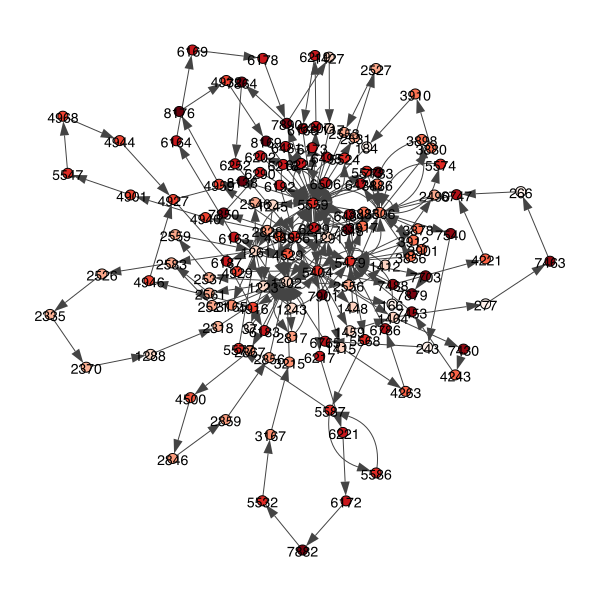

In [27]:
graph = plot_graph(
    chmm, x, a, output_file="figures/memory_maze_graph.pdf", cmap=cm.Reds
)
graph

In [28]:
n_clones = np.ones(n_emissions, dtype=np.int64) 

total = counts.sum() 
n_clones[unique_values] = (counts / total * 128 * 70).astype(np.int64) + 5

In [29]:
n_clones

array([   5,    1,    5,    5,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    5,    1,    5, 1080,    1,    5,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          5,    1,    5,    6,    1,    1,    1,    5,    1,    1,    1,
          1,    5,    1,    1,    1,    1,   22,    1,    1,    1,    1,
          5,    1,    1,    1,    1,    5,    1,    1,    1,    5,    1,
          1,    1,    1,    1,    5,    1,    1,    1,    1,    1,    1,
         10,   12, 7847,    1,    1,    1,    1,    1,    1,    1,    1,
          6,    5,    1,    1,    5,    1,    1,    1,    5,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    5,    5,    1,    1,
          5,    1,    5,    1,    1,    1,    5])

In [ ]:
n_emissions = cluster_indices.max() + 1


x = cluster_indices.astype(np.int64)
a = data['actions'].astype(np.int64)

chmm = CHMM(n_clones=n_clones, pseudocount=2e-3, x=x, a=a, seed=42)

progression = chmm.learn_em_T(x, a, n_iter=10000, term_early=True)  # Training


Average number of clones: 78.47008547008546


In [ ]:
chmm.pseudocount=0.0
chmm.learn_viterbi_T(x, a, n_iter=1000)

In [ ]:
graph = plot_graph(
    chmm, x, a, output_file="figures/memory_maze_graph.pdf", cmap=cm.Reds
)
graph

In [ ]:
a